# Data Load

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import os
from IPython.display import display
import scipy as sp

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

pd.options.display.max_columns = None   # To see the entire columns of dataframes
pd.options.display.max_rows = 100    

In [0]:
colabdir = '/content/drive/My Drive/Colab Notebooks/data/'

In [0]:
train_combat = pd.read_csv(colabdir+"train_combat.csv")
train_payment = pd.read_csv(colabdir+"train_payment.csv")
train_pledge = pd.read_csv(colabdir+"train_pledge.csv")
train_trade = pd.read_csv(colabdir+"train_trade.csv")
train_activity = pd.read_csv(colabdir+"train_activity.csv")
train_label = pd.read_csv(colabdir+"train_label.csv")

In [0]:
# Copy files in case of retrieving the original ones
combat = train_combat.copy()
pledge = train_pledge.copy()
payment = train_payment.copy()
trade = train_trade.copy()
activity = train_activity.copy()

# Data Check

## amount_spent 분포가 상당히 0에 뭉쳐있다 : outlier가 많음!

In [0]:
label = train_label["acc_id"]

In [0]:
train_label.head()

acc_id  survival_time  amount_spent
0   27835             64      0.002559
1   12351             64      0.120154
2  125437             55      0.182593
3  104483             64      0.016241
4    4704             20      0.226396

In [0]:
train_label.describe()

acc_id  survival_time  amount_spent
count   40000.000000   40000.000000  40000.000000
mean    65281.105550      45.706700      0.124931
std     37525.623536      23.265907      0.722272
min         2.000000       1.000000      0.000000
25%     32792.750000      24.000000      0.000000
50%     65359.000000      64.000000      0.020343
75%     97685.750000      64.000000      0.106119
max    130473.000000      64.000000     39.412632

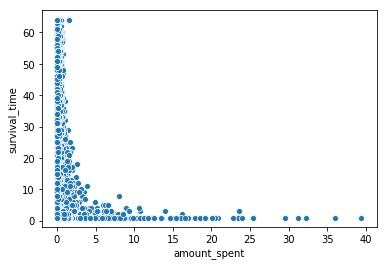

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.scatterplot(data=train_label,x='amount_spent',y='survival_time')

In [0]:
train_label['amount_spent'].max()

39.41263209871594

In [0]:
train_label['amount_spent'].mean()

0.12493145693483568

In [0]:
train_label.describe()

acc_id  survival_time  amount_spent
count   40000.000000   40000.000000  40000.000000
mean    65281.105550      45.706700      0.124931
std     37525.623536      23.265907      0.722272
min         2.000000       1.000000      0.000000
25%     32792.750000      24.000000      0.000000
50%     65359.000000      64.000000      0.020343
75%     97685.750000      64.000000      0.106119
max    130473.000000      64.000000     39.412632

In [0]:
# 백분위수
for i in range(10):
  print(np.percentile(train_label['amount_spent'],i*10))

0.0
0.0
0.0
0.0
0.0
0.020342850400602637
0.03899265067109052
0.07698456434666766
0.14374520581458086
0.2711866013645497


In [0]:
train_label['amount_spent'].median()

0.020342850400602637

In [0]:
train_label_no0 = train_label[train_label['amount_spent'] != 0]

In [0]:
train_label_no0.shape # 0인 유저수가 16000명!

(23562, 3)

In [0]:
# 이 0.1이 그냥 나온 숫자가 아니고 3/4분위수를 선택한 것임!

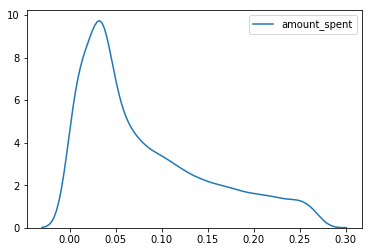

In [0]:
sns.kdeplot(train_label_no0[train_label_no0['amount_spent']<0.27]['amount_spent'])

In [0]:
train_label_no0[train_label_no0['amount_spent']<0.27]['amount_spent'].shape

(19543,)

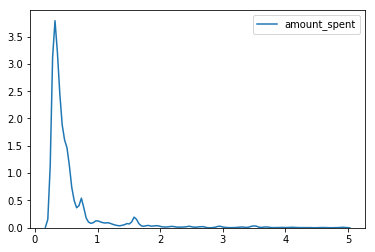

In [0]:
sns.kdeplot(train_label_no0[((train_label_no0['amount_spent']>0.27)&(train_label_no0['amount_spent']<5))]['amount_spent'])

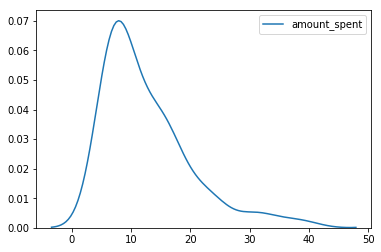

In [0]:
sns.kdeplot(train_label_no0[train_label_no0['amount_spent']>5]['amount_spent'])

In [0]:
train_label_no0[train_label_no0['amount_spent']>5]['amount_spent'].shape

(87,)

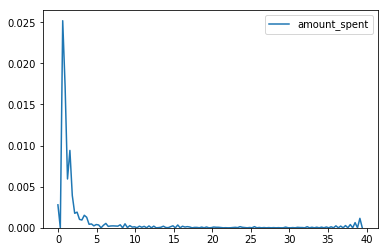

In [0]:
ns.kdeplot(data=train_label['amount_spent'])

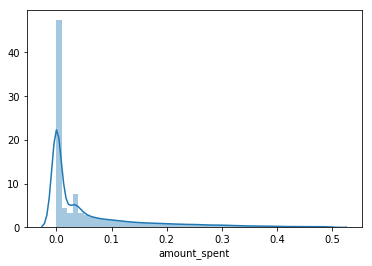

In [0]:
sns.distplot(train_label[train_label['amount_spent']<0.5]['amount_spent'])

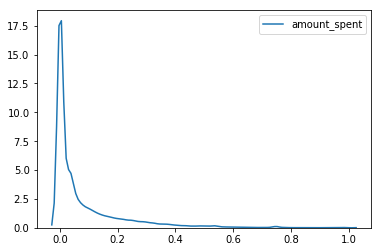

In [0]:
sns.kdeplot(train_label[train_label['amount_spent']<1]['amount_spent'])

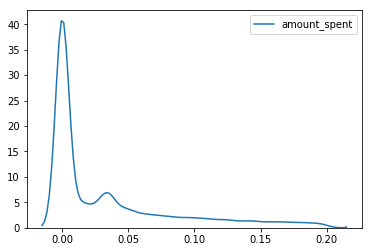

In [0]:
sns.kdeplot(train_label[train_label['amount_spent']<0.2]['amount_spent'])

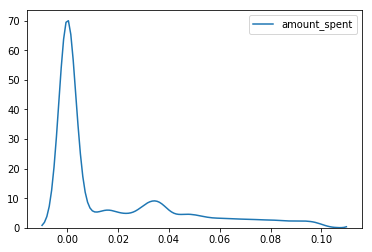

In [0]:
sns.kdeplot(train_label[train_label['amount_spent']<0.1]['amount_spent'])

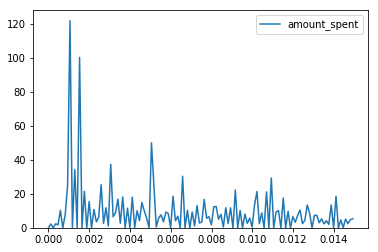

In [0]:
sns.kdeplot(train_label[train_label['amount_spent']<0.015]['amount_spent'])

In [0]:
sns.kdeplot(train_label[train_label['amount_spent']<0.015]['amount_spent'])

In [0]:
sns.kdeplot(train_label[train_label['amount_spent']<20])

In [0]:
sns.kdeplot(train_label[train_label['amount_spent']>20])

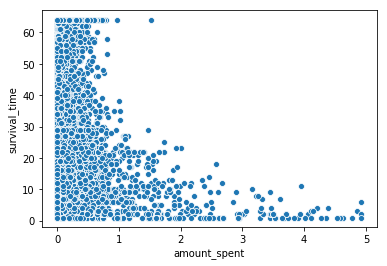

In [0]:
sns.scatterplot(data=train_label[train_label['amount_spent']<5],x='amount_spent',y='survival_time')

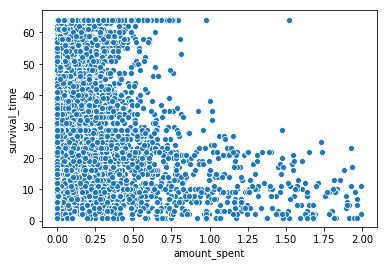

In [0]:
sns.scatterplot(data=train_label[train_label['amount_spent']<2],x='amount_spent',y='survival_time')

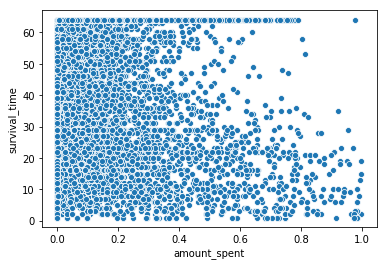

In [0]:
sns.scatterplot(data=train_label[train_label['amount_spent']<1],x='amount_spent',y='survival_time')

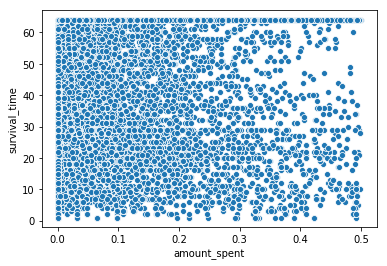

In [0]:
sns.scatterplot(data=train_label[train_label['amount_spent']<0.5],x='amount_spent',y='survival_time')

In [0]:
train_label[train_label['amount_spent']<5].count()

acc_id           39913
survival_time    39913
amount_spent     39913
dtype: int64

## 40000명 중 오직 26명 : 0.065% 사람이 매출의 11% 이상을 차지하고 있음!

In [0]:
train_label[train_label['amount_spent']<15]['amount_spent'].sum()

4431.46608998373

In [0]:
train_label[train_label['amount_spent']<15]['amount_spent'].count()

39974

In [0]:
train_label[train_label['amount_spent']>15]['amount_spent'].sum()

565.7921874097146

In [0]:
train_label[train_label['amount_spent']>15]['amount_spent'].count()

26

In [0]:
train_label[train_label['amount_spent']>15]['amount_spent'].sum() / train_label['amount_spent'].sum()

0.1132205213345167

## 그래프로 시각화

In [0]:
li = []
lid = []
liu = []
lic = []
lir = []
for i in range(1,100):
    i = i / 5
    li.append(train_label[train_label['amount_spent']>i]['amount_spent'].sum() / train_label['amount_spent'].sum())
    lid.append(train_label[train_label['amount_spent']<i]['amount_spent'].sum())
    liu.append(train_label[train_label['amount_spent']>i]['amount_spent'].sum())
    lic.append(train_label[train_label['amount_spent']>i]['amount_spent'].count())
    lir.append(train_label[train_label['amount_spent']>i]['amount_spent'].count() / train_label['amount_spent'].count())

In [0]:
train_as = pd.DataFrame(columns=['threshold','ratio','down','upper','cratio'])
train_as['threshold'] = np.arange(1,100) / 5
train_as['ratio'] = li
train_as['down'] = lid
train_as['upper'] = liu
train_as['count'] = lic
train_as['cratio'] = lir
train_as.head()

threshold     ratio         down        upper    cratio  count
0        0.2  0.765349  1172.611245  3824.647032  0.147525   5901
1        0.4  0.549184  2252.846197  2744.412081  0.051275   2051
2        0.6  0.439021  2803.356212  2193.902066  0.022825    913
3        0.8  0.390670  3044.978844  1952.279434  0.014200    568
4        1.0  0.374914  3123.716109  1873.542169  0.012025    481

## 앙 기모띠

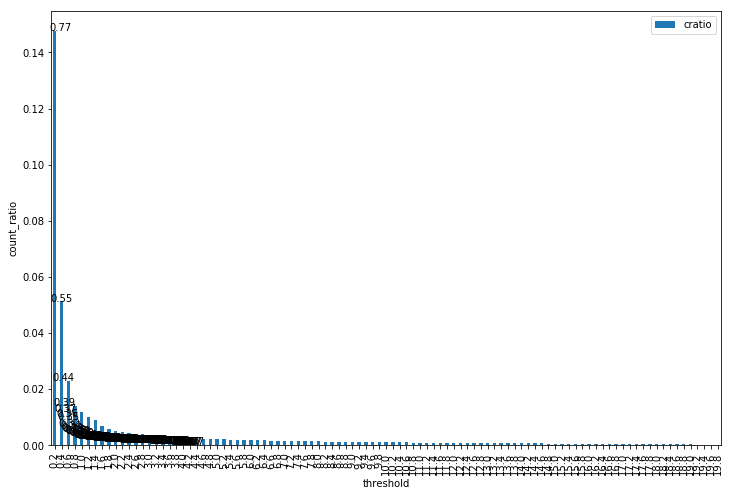

In [0]:
f, ax = plt.subplots(1,1,figsize=(12,8))

# ax.barplot(train_as[['threshold','ratio']].set_index('threshold'))
train_as[['threshold','cratio']].set_index('threshold').plot(kind='bar', ax=ax)
ax.set_xlabel("threshold")
ax.set_ylabel("count_ratio")
for i in range(len(train_as)):
    plt.text(x = train_as['threshold'][i]-1 , y = train_as['cratio'][i], s = "{:.2f}".format(train_as['ratio'][i]), size = 10)

# 아니, 버릴건 버려야 한다.

# Preprocessing : combat table

In [0]:
combat.head()

day  acc_id  char_id server  class  level  pledge_cnt  random_attacker_cnt  \
0    1   13809    54861     ap      2     13         0.0                  0.0   
1    1   13809   256332     ap      2     13         0.0                  0.0   
2    1   13809   307293     ap      3     14         0.0                  0.0   
3    1   13809   374964     ap      7     16         0.0                  0.0   
4    1   13809   117917     ap      2     11         0.0                  0.0   

   random_defender_cnt  temp_cnt  same_pledge_cnt   etc_cnt  num_opponent  
0                  0.0       0.0              0.0  0.000000      0.000000  
1                  0.0       0.0              0.0  0.000000      0.000000  
2                  0.0       0.0              0.0  0.000000      0.000000  
3                  0.0       0.0              0.0  0.112612      0.098129  
4                  0.0       0.0              0.0  0.000000      0.000000

In [0]:
combat['acc_id'].nunique()

40000

In [0]:
combat['char_id'].nunique()

149247

In [0]:
combat.describe()

day        acc_id       char_id         class         level  \
count  1.574671e+06  1.574671e+06  1.574671e+06  1.574671e+06  1.574671e+06   
mean   1.476561e+01  6.544376e+04  1.985164e+05  3.098323e+00  1.221995e+01   
std    8.129315e+00  3.749076e+04  1.146590e+05  2.152838e+00  5.295066e+00   
min    1.000000e+00  2.000000e+00  2.000000e+00  0.000000e+00  0.000000e+00   
25%    8.000000e+00  3.307600e+04  9.900800e+04  1.000000e+00  1.100000e+01   
50%    1.500000e+01  6.557700e+04  1.982620e+05  3.000000e+00  1.400000e+01   
75%    2.200000e+01  9.766600e+04  2.978010e+05  4.000000e+00  1.600000e+01   
max    2.800000e+01  1.304730e+05  3.974430e+05  7.000000e+00  1.700000e+01   

         pledge_cnt  random_attacker_cnt  random_defender_cnt      temp_cnt  \
count  1.574671e+06         1.574671e+06         1.574671e+06  1.574671e+06   
mean   1.475613e-01         3.975899e-02         1.135964e-01  6.785012e-02   
std    1.066027e+00         8.165007e-01         8.578172e-01  9.801067e-01   
min    0.000000e+00         0.000000e+00         0.000000e+00  0.000000e+00   
25%    0.000000e+00         0.000000e+00         0.000000e+00  0.000000e+00   
50%    0.000000e+00         0.000000e+00         0.000000e+00  0.000000e+00   
75%    0.000000e+00         0.000000e+00         0.000000e+00  0.000000e+00   
max    5.622540e+01         2.021548e+02         1.123911e+02  2.604922e+02   

       same_pledge_cnt       etc_cnt  num_opponent  
count     1.574671e+06  1.574671e+06  1.574671e+06  
mean      6.167362e-02  1.995034e-01  2.639202e-01  
std       1.021016e+00  1.139230e+00  1.107619e+00  
min       0.000000e+00  0.000000e+00  0.000000e+00  
25%       0.000000e+00  0.000000e+00  0.000000e+00  
50%       0.000000e+00  0.000000e+00  0.000000e+00  
75%       0.000000e+00  0.000000e+00  9.812875e-02  
max       2.355672e+02  1.997728e+02  5.455959e+01

In [0]:
combat.count()

day                    1574671
acc_id                 1574671
char_id                1574671
server                 1574671
class                  1574671
level                  1574671
pledge_cnt             1574671
random_attacker_cnt    1574671
random_defender_cnt    1574671
temp_cnt               1574671
same_pledge_cnt        1574671
etc_cnt                1574671
num_opponent           1574671
dtype: int64

In [0]:
combat[combat["acc_id"].isin(label)].count()

day                    1574671
acc_id                 1574671
char_id                1574671
server                 1574671
class                  1574671
level                  1574671
pledge_cnt             1574671
random_attacker_cnt    1574671
random_defender_cnt    1574671
temp_cnt               1574671
same_pledge_cnt        1574671
etc_cnt                1574671
num_opponent           1574671
dtype: int64

In [0]:
# Total amount spent per account the whole period
train_label["total_spent"] = train_label["survival_time"] * train_label["amount_spent"]

In [0]:
combat[combat["acc_id"].isin(label)] # label에 있는 숫자만 골라냄

day  acc_id  char_id server  class  level  pledge_cnt  \
0          1   13809    54861     ap      2     13    0.000000   
1          1   13809   256332     ap      2     13    0.000000   
2          1   13809   307293     ap      3     14    0.000000   
3          1   13809   374964     ap      7     16    0.000000   
4          1   13809   117917     ap      2     11    0.000000   
5          1   62835   129987     am      2     17    0.000000   
6          1   62835    74659     am      4      2    0.000000   
7          1   62835   179366     am      1     14    0.000000   
8          1   62835   157318     am      2      3    0.000000   
9          1   62835   394244     am      5     10    0.000000   
10         1   54241   316971     ag      2     15    0.000000   
11         1   88683   299973     ar      0     16    0.000000   
12         1   80158   211359     ap      2     17    0.577658   
13         1   30386   309343     as      7     16    0.000000   
14         1   30386    29625     as      3     15    0.000000   
15         1   16629   311417     ae      0     11    0.000000   
16         1   16629    26567     ae      2     11    0.000000   
17         1   16629    53462     ae      3     16    0.000000   
18         1   16629   149458     ae      1      6    0.000000   
19         1   10931   236388     an      1     17    0.000000   
20         1  115006   171038     az      5     11    0.000000   
21         1  115006   217404     ay      5     14    0.000000   
22         1  115006    21515     bd      1     12    0.000000   
23         1     149   280049     al      7     17    0.000000   
24         1     149   248148     al      3     13    0.000000   
25         1   37405   109101     ab      2     16    0.000000   
26         1   64435   181773     al      6     14    0.000000   
27         1  128300   187302     av      1     17    0.000000   
28         1   74305   343563     an      1     17    2.310633   
29         1   74305   130375     an      2     14    0.000000   
30         1   74305   343563     bn      1     17    0.000000   
31         1   36350    10163     ax      2     13    0.000000   
32         1   77519   176073     ae      1     14    0.000000   
33         1   77519   212993     ae      5     14    0.000000   
34         1   77519   323065     ae      7     16    0.000000   
35         1   77519   363511     ae      5     11    0.000000   
36         1   66631   397337     ai      1     17    0.000000   
37         1  104613   183473     am      1     11    0.000000   
38         1  127811    14049     bd      4     11    0.000000   
39         1  127811   353116     az      1      9    0.000000   
40         1  127811   142589     ay      2     10    0.000000   
41         1  127811   370509     ay      4     11    0.000000   
42         1  127811   196677     bb      1      6    0.000000   
43         1  127811    49693     az      3     10    0.000000   
44         1   27245   165282     az      1     17    0.000000   
45         1   80943   324569     ay      2     13    0.000000   
46         1   80943   360570     ay      4     17    0.064184   
47         1   21760   176604     aq      5     17    3.273396   
48         1   21760   252457     aq      5      5    0.000000   
49         1   91750   144587     ad      2     17    0.000000   
...      ...     ...      ...    ...    ...    ...         ...   
1574621   10   34847   110643     bb      3     15    0.000000   
1574622   10   34847   200991     bc      4     16    0.000000   
1574623   10   34847    16802     az      4     13    0.000000   
1574624   10   70480   162229     az      3     13    0.000000   
1574625   10   70480   209128     bc      3     15    0.000000   
1574626   10   70480   275709     bb      4     15    0.000000   
1574627   10  128036   321945     af      2     16    0.000000   
1574628   10   57613   157133     bb      3     16    0.000000   
1574629   10   87077   381584     ao      1      

In [0]:
# No need to keep the rows whose "acc_id" does not appear in Label data
combat = combat[combat["acc_id"].isin(label)]
pledge = pledge[pledge["acc_id"].isin(label)]
payment = payment[payment["acc_id"].isin(label)]
trade = trade[trade["source_acc_id"].isin(label)]
trade = trade[trade["target_acc_id"].isin(label)]
activity = activity[activity["acc_id"].isin(label)]
# 요렇게 하면 달라지는 게 무엇인가?

## Common Features

In [0]:
# The number of characters per account
all_char = pd.concat([train_combat[["char_id", "acc_id"]], train_pledge[["char_id", "acc_id"]], train_activity[["char_id", "acc_id"]]])
# char_count = all_char.groupby("char_id")["acc_id"].count()
char_count = all_char.groupby("acc_id")["char_id"].nunique()
char_count.head()

acc_id
2     1
5     3
8     7
17    4
20    2
Name: char_id, dtype: int64

In [0]:
all_char.sort_values(by='acc_id')['acc_id'].nunique()

40000

In [0]:
all_char.sort_values(by='acc_id')['char_id'].nunique()

150960

In [0]:
all_char.groupby('acc_id')['char_id'].nunique().head()

acc_id
2     1
5     3
8     7
17    4
20    2
Name: char_id, dtype: int64

In [0]:
all_char[all_char['acc_id']==8]['char_id'].nunique()

7

In [0]:
char_count = pd.DataFrame({"char_count" : char_count})  # in case of merging

In [0]:
all_char.head()
# 전체 char_id에 따른 acc_id 묶어놓은 것!

char_id  acc_id
0    54861   13809
1   256332   13809
2   307293   13809
3   374964   13809
4   117917   13809

In [0]:
char_count = char_count.reset_index()
char_count.head()
# 이것의 의미?
# 이거 acc_id가 나와야 하는 것 아님?

acc_id  char_count
0       2           1
1       5           3
2       8           7
3      17           4
4      20           2

## 서버 관련 컬럼은 다 날림

In [0]:
# Find all the unique servers
total_server = pd.concat([train_combat["server"], train_pledge["server"], train_trade["server"], train_activity["server"]])
total_server.head()

0    ap
1    ap
2    ap
3    ap
4    ap
Name: server, dtype: object

In [0]:
server_list = total_server.unique()
server_list

array(['ap', 'am', 'ag', 'ar', 'as', 'ae', 'an', 'az', 'ay', 'bd', 'al',
       'ab', 'av', 'bn', 'ax', 'ai', 'bb', 'aq', 'ad', 'ac', 'bk', 'ak',
       'bl', 'aw', 'aj', 'bm', 'bc', 'at', 'aa', 'bo', 'ao', 'ah', 'au',
       'af', 'bj', 'br', 'bp', 'bg', 'bs', 'bi'], dtype=object)

In [0]:
# Encode servers into integer values
svle = LabelEncoder()
svle.fit(server_list)
for df in [combat, pledge, trade, activity]:
    df["server"] = svle.transform(df["server"])
# server column을 categorial하게 만들어줌!

In [0]:
svle.classes_

array(['aa', 'ab', 'ac', 'ad', 'ae', 'af', 'ag', 'ah', 'ai', 'aj', 'ak',
       'al', 'am', 'an', 'ao', 'ap', 'aq', 'ar', 'as', 'at', 'au', 'av',
       'aw', 'ax', 'ay', 'az', 'bb', 'bc', 'bd', 'bg', 'bi', 'bj', 'bk',
       'bl', 'bm', 'bn', 'bo', 'bp', 'br', 'bs'], dtype=object)

In [0]:
itemtype_list = trade['item_type'].unique()
itemtype_list

[enchant_scroll, accessory, adena, etc, weapon, armor, spell]
Categories (7, object): [enchant_scroll, accessory, adena, etc, weapon, armor, spell]

In [0]:
itemtype_list = trade['item_type'].unique()
itemtype_list

# Encode servers into integer values : item_type (거래한 아이템 종류)
le = LabelEncoder()
le.fit(itemtype_list)
trade['item_type'] =  le.transform(trade['item_type'])
# server column을 categorial하게 만들어줌!

In [0]:
le.classes_

array(['accessory', 'adena', 'armor', 'enchant_scroll', 'etc', 'spell',
       'weapon'], dtype=object)

In [0]:
le.classes_

array(['accessory', 'adena', 'armor', 'enchant_scroll', 'etc', 'spell',
       'weapon'], dtype=object)

In [0]:
trade.head()

day      time  type  server  source_acc_id  source_char_id  target_acc_id  \
0    7  21:13:05     1       6          11439          385109          48152   
2    1  14:24:53     1      11          18212          164230          38145   
5    2  16:56:12     0       9          90975          346488          22407   
6    2  21:54:22     1      21          10578          286509          52677   
8    6  02:29:14     1      21         107975            5446          13885   

   target_char_id  item_type   item_amount  item_price  
0           34247          3  4.793968e-08         NaN  
2           34209          0  7.190952e-08         NaN  
5          110658          3  7.190952e-08    0.005693  
6          365997          4  4.793968e-05         NaN  
8          181430          4  7.670349e-06         NaN

In [0]:
trade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 834478 entries, 0 to 1849315
Data columns (total 11 columns):
day               834478 non-null int64
time              834478 non-null object
type              834478 non-null int64
server            834478 non-null int64
source_acc_id     834478 non-null int64
source_char_id    834478 non-null int64
target_acc_id     834478 non-null int64
target_char_id    834478 non-null int64
item_type         834478 non-null int64
item_amount       834478 non-null float64
item_price        409781 non-null float64
dtypes: float64(2), int64(8), object(1)
memory usage: 76.4+ MB


## Trade

In [0]:
trade.rename(columns={"source_acc_id" : "acc_id"}, inplace=True)

In [0]:
trade.head()

day      time  type server  acc_id  source_char_id  target_acc_id  \
0    7  21:13:05     1     ag   11439          385109          48152   
1    2  15:33:00     1     al   22220          259705          43228   
2    1  14:24:53     1     al   18212          164230          38145   
3    7  23:13:43     1     au  121622           49839          71226   
4    2  12:43:33     0     bd   14421          344503          65220   

   target_char_id       item_type   item_amount  item_price  
0           34247  enchant_scroll  4.793968e-08         NaN  
1          379826  enchant_scroll  4.314571e-06         NaN  
2           34209       accessory  7.190952e-08         NaN  
3          281334           adena  9.587936e-03         NaN  
4          210558             etc  1.198492e-07    0.000639

In [0]:
# 같은 계정이면 같은 네트워크 그룹을 가질 확률이 높음 : 아이디 하나로 묶어도 상관없을듯
trade.drop(["source_char_id", "target_char_id"], axis=1, inplace=True)

In [0]:
trade.head()

day      time  type server  acc_id  target_acc_id       item_type  \
0    7  21:13:05     1     ag   11439          48152  enchant_scroll   
1    2  15:33:00     1     al   22220          43228  enchant_scroll   
2    1  14:24:53     1     al   18212          38145       accessory   
3    7  23:13:43     1     au  121622          71226           adena   
4    2  12:43:33     0     bd   14421          65220             etc   

    item_amount  item_price  
0  4.793968e-08         NaN  
1  4.314571e-06         NaN  
2  7.190952e-08         NaN  
3  9.587936e-03         NaN  
4  1.198492e-07    0.000639

## 상당히 Null값이 많다 : item_price : 추후에 K-means나 K-nn 알고리즘으로 보간

In [0]:
trade['item_price'].isnull().sum()

1040143

In [0]:
trade['item_price'].notnull().sum()

809182

In [0]:
# trade["item_price"].fillna(trade["item_price"].median(), inplace=True)
# # 이렇게 해도 되는가?
# # 일단 missing으로 해야하는 게 아닌가?

In [0]:
# Categorize transaction time
# categroial로
bins = [0, 60000, 120000, 180000, 239999]
bin_label = [0, 1, 2, 3]
# bins = [0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000,130000,140000,150000\
#         ,160000,170000,180000,190000,200000,210000,220000,230000,239999]
# bin_label = range(0,24,1)
trade["time_bin"] = pd.cut(pd.to_numeric(trade["time"].str.replace(":", "")), bins=bins, labels=bin_label)
# Those who play during the time other than evening must be differentiated
# trade["time_bin"] = trade["time_bin"].map({0:1, 1:1, 2:1, 3:0}) 
# trade.drop("time", axis=1, inplace=True)

In [0]:
trade.head()

day      time  type server  acc_id  target_acc_id       item_type  \
0    7  21:13:05     1     ag   11439          48152  enchant_scroll   
1    2  15:33:00     1     al   22220          43228  enchant_scroll   
2    1  14:24:53     1     al   18212          38145       accessory   
3    7  23:13:43     1     au  121622          71226           adena   
4    2  12:43:33     0     bd   14421          65220             etc   

    item_amount  item_price time_bin  
0  4.793968e-08         NaN        3  
1  4.314571e-06         NaN        2  
2  7.190952e-08         NaN        2  
3  9.587936e-03         NaN        3  
4  1.198492e-07    0.000639        2

In [0]:
trade['time_bin'].unique()

[3, 2, 0, 1, NaN]
Categories (4, int64): [0 < 1 < 2 < 3]

In [0]:
trade[trade['time_bin'].isnull()].head()

day      time  type server  acc_id  target_acc_id item_type  \
40435     5  00:00:00     0     az   93564          61748       etc   
195338    4  00:00:00     1     az   82988          64700     armor   
312052    1  00:00:00     0     as  104177          50138       etc   
353809    4  00:00:00     1     az   82988          64700     adena   
389947    7  00:00:00     0     ao   93739          89218       etc   

         item_amount  item_price time_bin  
40435   1.198492e-07    0.001705      NaN  
195338  2.396984e-07         NaN      NaN  
312052  8.868841e-07    2.994625      NaN  
353809  2.874865e+00         NaN      NaN  
389947  1.064261e-05    0.067643      NaN

In [0]:
trade['time_bin'] = trade['time_bin'].fillna(0) # 시각 00:00:00 => 0 label로 보간
trade[trade['time_bin'].isnull()].head()

Empty DataFrame
Columns: [day, time, type, server, acc_id, target_acc_id, item_type, item_amount, item_price, time_bin]
Index: []

In [0]:
trade.drop("time", axis=1, inplace=True)

In [0]:
trade['time_bin'] = trade['time_bin'].astype('category')
trade['type'] = trade['type'].astype('category')
trade['item_type'] = trade['item_type'].astype('category')

In [0]:
trade.info() # 카테고리로 변경하면 time_bin을 pivot table에서 사용못함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1849325 entries, 0 to 1849324
Data columns (total 9 columns):
day              int64
type             category
server           object
acc_id           int64
target_acc_id    int64
item_type        category
item_amount      float64
item_price       float64
time_bin         category
dtypes: category(3), float64(2), int64(3), object(1)
memory usage: 89.9+ MB


In [0]:
trade.head()

day type server  acc_id  target_acc_id       item_type   item_amount  \
0    7    1     ag   11439          48152  enchant_scroll  4.793968e-08   
1    2    1     al   22220          43228  enchant_scroll  4.314571e-06   
2    1    1     al   18212          38145       accessory  7.190952e-08   
3    7    1     au  121622          71226           adena  9.587936e-03   
4    2    0     bd   14421          65220             etc  1.198492e-07   

   item_price time_bin  
0         NaN        3  
1         NaN        2  
2         NaN        2  
3         NaN        3  
4    0.000639        2

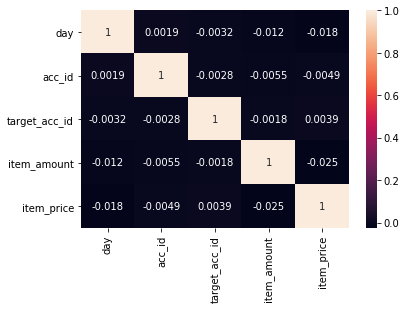

In [0]:
import seaborn as sns
matcorr = trade.corr()
sns.heatmap(matcorr, annot=True)

# item_price와 그나마 가장 관련이 큰 것이 item_type : item_type에 맞춰서 보간

In [0]:
trade['item_price'].isnull().sum()

1040143

In [0]:
trade['item_price'].notnull().sum()

809182

### item type에 따른 item_price의 평균값
### adena 주고받은 것은 무조건 nan (교환창 거래)

In [0]:
itemtype_list = trade['item_type'].unique()
itemtype_list

# Encode servers into integer values : item_type (거래한 아이템 종류)
le = LabelEncoder()
le.fit(itemtype_list)
trade['item_type'] =  le.transform(trade['item_type'])
# server column을 categorial하게 만들어줌!

In [0]:
trade.groupby('item_type')['item_price'].apply(lambda x: x.isnull().sum())

item_type
0    122410
1    328458
2    158641
3     45086
4    274898
5     39365
6     71285
Name: item_price, dtype: int64

In [0]:
trade.groupby('item_type')['item_price'].apply(lambda x: x.notnull().sum())

item_type
0     15475
1         0
2     60333
3    193897
4    507640
5     21484
6     10353
Name: item_price, dtype: int64

In [0]:
trade[(trade['item_price'].isnull() & trade['item_type']==1)]

day type server  acc_id  target_acc_id  item_type   item_amount  \
0          7    1     ag   11439          48152          3  4.793968e-08   
1          2    1     al   22220          43228          3  4.314571e-06   
3          7    1     au  121622          71226          1  9.587936e-03   
11         4    1     bd   60544         112518          1  2.396984e-02   
15         5    1     aj  127692         112109          1  1.845678e-01   
20         5    1     as   52187         129915          1  4.060491e-01   
25         7    1     ax   54845          69413          1  1.198492e-02   
34         5    1     az   42613          92226          3  6.999193e-06   
43         2    1     an   98632         124737          1  1.198492e-02   
44         2    1     aj   25686          16745          1  2.037436e-02   
46         3    1     bb  119496         102268          5  2.396984e-08   
47         6    1     al  111023         128502          1  1.677889e-01   
48         2    1     bd   96753          16116          1  2.624697e-02   
52         7    1     bd  120127          38387          1  9.827634e-03   
54         1    1     an   93801          62716          1  5.992460e+00   
61         7    1     ax   65657          58366          1  3.595476e-03   
72         4    1     az  103765          81699          5  1.438190e-07   
78         5    1     ab   24131          71080          1  7.430650e-02   
82         5    1     bd  100226          33808          3  2.396984e-08   
84         5    1     ah   17351          15267          1  1.582009e+00   
86         4    1     av   23280          67225          1  5.992460e-01   
88         1    1     ay   36198          73473          1  1.438190e+01   
90         5    1     az   42066          69740          1  2.396984e-01   
93         3    1     bd   92805          63740          1  2.876381e-03   
94         4    1     az   56037         123110          1  1.438190e-02   
100        5    1     bd  107074            279          1  2.358632e-02   
101        1    1     af   59748          67302          5  2.718180e-05   
102        7    1     bd   40945           3928          5  2.396984e-08   
105        6    1     ap   55673          42875          1  2.396984e+00   
106        6    1     ak   81410          95910          1  1.438190e-02   
113        1    1     ar   21935         116383          5  2.396984e-08   
120        4    1     aa   52924          50166          1  1.198492e+00   
122        2    1     bc   74578          95638          1  3.624393e-01   
126        7    1     bd   13180          97543          1  7.190952e-02   
129        5    1     ad   12979          41234          1  3.787235e+00   
136        1    1     ab   25659          96292          1  2.396984e-02   
142        4    1     ak   13965          48232          1  6.711555e-02   
144        5    1     bd  106324          15723          1  2.396984e-03   
147        5    1     au   92247          44689          1  5.273365e-01   
149        2    1     bd     597         103896          3  4.793968e-08   
156        2    1     am   60854          60956          1  3.595476e-01   
158        6    1     bd   23812          50192          1  3.307838e-03   
160        7    1     ax   10568         121197          1  3.355777e-01   
179        1    1     al  110709          18107          1  2.396984e-02   
182        1    1     av  104584          94099          5  9.587936e-08   
185        4    1     ao   93277         115372          1  4.793968e-01   
186        7    1     bd   81660          13235          3  2.157286e-07   
196        2    1     av  120428          61772          1  1.471304e-01   
197        3    1     ao   53840          40664          1  4.074873e-01   
198        6    1     au  124561          24831          1  4.793968e+00   
...      ...  ...    ...     ...            ...        ...           ...   
1849093   25    1     as   33305         118827          

In [0]:
trade[(trade['item_type']==1)]

day type server  acc_id  target_acc_id  item_type  item_amount  \
3          7    1     au  121622          71226          1     0.009588   
11         4    1     bd   60544         112518          1     0.023970   
15         5    1     aj  127692         112109          1     0.184568   
20         5    1     as   52187         129915          1     0.406049   
25         7    1     ax   54845          69413          1     0.011985   
43         2    1     an   98632         124737          1     0.011985   
44         2    1     aj   25686          16745          1     0.020374   
47         6    1     al  111023         128502          1     0.167789   
48         2    1     bd   96753          16116          1     0.026247   
52         7    1     bd  120127          38387          1     0.009828   
54         1    1     an   93801          62716          1     5.992460   
61         7    1     ax   65657          58366          1     0.003595   
78         5    1     ab   24131          71080          1     0.074307   
84         5    1     ah   17351          15267          1     1.582009   
86         4    1     av   23280          67225          1     0.599246   
88         1    1     ay   36198          73473          1    14.381904   
90         5    1     az   42066          69740          1     0.239698   
93         3    1     bd   92805          63740          1     0.002876   
94         4    1     az   56037         123110          1     0.014382   
100        5    1     bd  107074            279          1     0.023586   
105        6    1     ap   55673          42875          1     2.396984   
106        6    1     ak   81410          95910          1     0.014382   
120        4    1     aa   52924          50166          1     1.198492   
122        2    1     bc   74578          95638          1     0.362439   
126        7    1     bd   13180          97543          1     0.071910   
129        5    1     ad   12979          41234          1     3.787235   
136        1    1     ab   25659          96292          1     0.023970   
142        4    1     ak   13965          48232          1     0.067116   
144        5    1     bd  106324          15723          1     0.002397   
147        5    1     au   92247          44689          1     0.527336   
156        2    1     am   60854          60956          1     0.359548   
158        6    1     bd   23812          50192          1     0.003308   
160        7    1     ax   10568         121197          1     0.335578   
179        1    1     al  110709          18107          1     0.023970   
185        4    1     ao   93277         115372          1     0.479397   
196        2    1     av  120428          61772          1     0.147130   
197        3    1     ao   53840          40664          1     0.407487   
198        6    1     au  124561          24831          1     4.793968   
200        1    1     aq  118261          17360          1     0.002397   
201        4    1     aa   28820          91062          1     0.191759   
208        1    1     ab   90577          30573          1     0.119849   
209        3    1     bb   17646          20487          1     0.095879   
217        5    1     ay   80943          90648          1     0.023970   
220        7    1     bd  129496          19961          1     0.003835   
221        5    1     bd   48925         118977          1     0.004794   
225        5    1     ae   16986          43478          1     0.095879   
233        7    1     bd   22880           8894          1     0.017402   
237        4    1     bd  113416          50192          1     0.001222   
245        7    1     ax   41884          84894          1     0.179774   
252        5    1     au   31633         108352          1     0.002397   
...      ...  ...    ...     ...            ...        ...          ...   
1849030   25    1     bd   93459         102132          1     0.047940   
1849050   24    1     ac  123552  

## item_type가 1인것과 전체의 sum() 그래프가 비슷하다?? : adena는 item_amount가 가격이네!

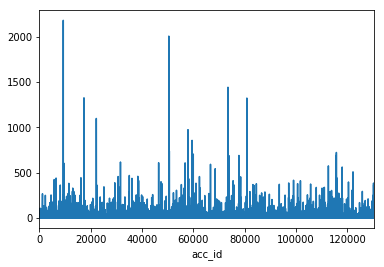

In [0]:
trade[(trade['item_type']==1)].groupby('acc_id')['item_amount'].sum().plot()

In [0]:
trade.groupby('acc_id')['item_amount'].sum().plot()

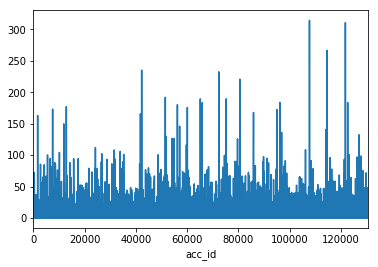

In [0]:
trade.groupby('acc_id')['item_price'].sum().plot()

# item_amount 의 std, mean을 해보자

In [0]:
trade['item_amount'].min()

2.3969839259754707e-08

In [0]:
# 와! 돈이 그대로 나오잖아!
trade_item_amount_rev = trade['item_amount']/2.3969839259754707e-08
trade_item_amount_rev

0                  2.0
1                180.0
2                  3.0
3             400000.0
4                  5.0
5                  3.0
6               2000.0
7                  5.0
8                320.0
9                  2.0
10               400.0
11           1000000.0
12                 1.0
13                 1.0
14                 8.0
15           7700000.0
16                 3.0
17                 1.0
18                15.0
19                 3.0
20          16940000.0
21                96.0
22                 6.0
23                 1.0
24                 1.0
25            500000.0
26                 1.0
27                 1.0
28                 1.0
29                 1.0
30                 1.0
31                 7.0
32                 1.0
33                 1.0
34               292.0
35                 1.0
36                 2.0
37                 1.0
38                 2.0
39                 1.0
40                 1.0
41                22.0
42                 1.0
43         

In [0]:
trade_item_amount_rev.isnull().sum()

0

In [0]:
trade_item_amount_rev.max()

3457858551.0

In [0]:
trade['item_price'].min()

9.521860963149264e-08

In [0]:
trade_item_price_rev = trade['item_price']/9.521860963149264e-08
trade_item_price_rev

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4              6715.0
5             59787.0
6                 NaN
7            711170.0
8                 NaN
9           1926000.0
10         10111600.0
11                NaN
12                NaN
13                NaN
14           328000.0
15                NaN
16           839850.0
17            23860.0
18           449120.0
19            95931.0
20                NaN
21                NaN
22                NaN
23                NaN
24           487310.0
25                NaN
26           512390.0
27           591317.0
28           172008.0
29                NaN
30                NaN
31                NaN
32                NaN
33                NaN
34                NaN
35            49000.0
36            86138.0
37                NaN
38          1042478.0
39                NaN
40                NaN
41            18674.0
42            75650.0
43                NaN
44                NaN
45        

In [0]:
trade_item_price_rev.max()

690900000.0000001

In [0]:
trade_item_price_rev.min()

1.0

In [0]:
trade_item_price_rev.isnull().sum()

1040143

### 일단 요 역정규화 된 값들을 다시 넣어주자!

In [0]:
trade['item_amount'] = trade_item_amount_rev
trade['item_price'] = trade_item_price_rev
trade.head()

day type server  acc_id  target_acc_id  item_type  item_amount  item_price  \
0    7    1     ag   11439          48152          3          2.0         NaN   
1    2    1     al   22220          43228          3        180.0         NaN   
2    1    1     al   18212          38145          0          3.0         NaN   
3    7    1     au  121622          71226          1     400000.0         NaN   
4    2    0     bd   14421          65220          4          5.0      6715.0   

  time_bin  
0        3  
1        2  
2        2  
3        3  
4        2

In [0]:
# def func(row):
#     if row['item_type'] == 1:
#         return row['item_amount']
#     else:
#         return row['item_price']

In [0]:
# # 이거 쓰는것보다 numpy 배열 쓰는게 훠얼씬 빠를듯!
# trade['item_price'] = trade.apply(func,axis=1)

In [0]:
trade['item_price'] = np.where(trade['item_type']==1, trade['item_amount'], trade['item_price'])

In [0]:
trade[trade['item_type']==1]

day type server  acc_id  target_acc_id  item_type  item_amount  \
3          7    1     au  121622          71226          1     400000.0   
11         4    1     bd   60544         112518          1    1000000.0   
15         5    1     aj  127692         112109          1    7700000.0   
20         5    1     as   52187         129915          1   16940000.0   
25         7    1     ax   54845          69413          1     500000.0   
43         2    1     an   98632         124737          1     500000.0   
44         2    1     aj   25686          16745          1     850000.0   
47         6    1     al  111023         128502          1    7000000.0   
48         2    1     bd   96753          16116          1    1095000.0   
52         7    1     bd  120127          38387          1     410000.0   
54         1    1     an   93801          62716          1  250000000.0   
61         7    1     ax   65657          58366          1     150000.0   
78         5    1     ab   24131          71080          1    3100000.0   
84         5    1     ah   17351          15267          1   66000000.0   
86         4    1     av   23280          67225          1   25000000.0   
88         1    1     ay   36198          73473          1  600000000.0   
90         5    1     az   42066          69740          1   10000000.0   
93         3    1     bd   92805          63740          1     120000.0   
94         4    1     az   56037         123110          1     600000.0   
100        5    1     bd  107074            279          1     984000.0   
105        6    1     ap   55673          42875          1  100000000.0   
106        6    1     ak   81410          95910          1     600000.0   
120        4    1     aa   52924          50166          1   50000000.0   
122        2    1     bc   74578          95638          1   15120639.0   
126        7    1     bd   13180          97543          1    3000000.0   
129        5    1     ad   12979          41234          1  158000000.0   
136        1    1     ab   25659          96292          1    1000000.0   
142        4    1     ak   13965          48232          1    2800000.0   
144        5    1     bd  106324          15723          1     100000.0   
147        5    1     au   92247          44689          1   22000000.0   
156        2    1     am   60854          60956          1   15000000.0   
158        6    1     bd   23812          50192          1     138000.0   
160        7    1     ax   10568         121197          1   14000000.0   
179        1    1     al  110709          18107          1    1000000.0   
185        4    1     ao   93277         115372          1   20000000.0   
196        2    1     av  120428          61772          1    6138146.0   
197        3    1     ao   53840          40664          1   17000000.0   
198        6    1     au  124561          24831          1  200000000.0   
200        1    1     aq  118261          17360          1     100000.0   
201        4    1     aa   28820          91062          1    8000000.0   
208        1    1     ab   90577          30573          1    5000000.0   
209        3    1     bb   17646          20487          1    4000000.0   
217        5    1     ay   80943          90648          1    1000000.0   
220        7    1     bd  129496          19961          1     160000.0   
221        5    1     bd   48925         118977          1     200000.0   
225        5    1     ae   16986          43478          1    4000000.0   
233        7    1     bd   22880           8894          1     726000.0   
237        4    1     bd  113416          50192          1      51000.0   
245        7    1     ax   41884          84894          1    7500000.0   
252        5    1     au   31633         108352          1     100000.0   
...      ...  ...    ...     ...            ...        ...          ...   
1849030   25    1     bd   93459         102132          1    2000000.0   
1849050   24    1     ac  123552  

In [0]:
trade['item_amount'] = np.where(trade['item_type']==1, 1, trade['item_amount'])

In [0]:
trade[trade['item_type']==1].head()

day type server  acc_id  target_acc_id  item_type  item_amount  \
3     7    1     au  121622          71226          1          1.0   
11    4    1     bd   60544         112518          1          1.0   
15    5    1     aj  127692         112109          1          1.0   
20    5    1     as   52187         129915          1          1.0   
25    7    1     ax   54845          69413          1          1.0   

    item_price time_bin  
3     400000.0        3  
11   1000000.0        1  
15   7700000.0        3  
20  16940000.0        1  
25    500000.0        1

In [0]:
trade['item_price'].isnull().sum()

711685

In [0]:
trade.groupby('item_type')['item_price'].mean()

item_type
0    1.400651e+07
1    2.970616e+07
2    6.328829e+06
3    7.372739e+05
4    1.540763e+06
5    1.698692e+06
6    1.185429e+07
Name: item_price, dtype: float64

In [0]:
trade[trade['item_price']==0]

Empty DataFrame
Columns: [day, type, server, acc_id, target_acc_id, item_type, item_amount, item_price, time_bin]
Index: []

In [0]:
trade[trade['item_type']==2].head() # 아직 total_item_price 안만듬

day type server  acc_id  target_acc_id  item_type  item_amount  \
31    1    1     ah   98736          52740          2          7.0   
37    7    1     bb   71795          82923          2          1.0   
63    6    1     ar   50937          12940          2          1.0   
67    6    1     ar   35017          47494          2         10.0   
68    7    1     ah    5096          50413          2          5.0   

    item_price time_bin  
31         NaN        0  
37         NaN        3  
63         NaN        3  
67         NaN        2  
68         NaN        3

In [0]:
trade[((trade['type']==1)&(trade['item_type']!=1))].shape

(711685, 9)

In [0]:
trade.shape

(1849325, 9)

In [0]:
trade[((trade['type']==1)&(trade['item_type']!=1))==False].shape

(1137640, 9)

## Nan 값 가진놈들은 쓰지 말자

In [0]:
trade[((trade['type']==1)&(trade['item_type']!=1))==False].shape

(1137640, 9)

In [0]:
trade = trade[((trade['type']==1)&(trade['item_type']!=1))==False]
trade.isnull().sum()

day              0
type             0
server           0
acc_id           0
target_acc_id    0
item_type        0
item_amount      0
item_price       0
time_bin         0
dtype: int64

In [0]:
trade.shape

(1137640, 9)

## 아무래도 item_price는 전체 가격이 맞는거 같다

## 다음에 보간할때 item_one_price의 평균으로 보간하면 될듯

In [0]:
trade['item_one_price'] = trade['item_price'] / trade['item_amount'] 

In [0]:
trade[25:40]

day type server  acc_id  target_acc_id  item_type  item_amount  \
44    2    1     aj   25686          16745          1          1.0   
45    2    0     ag   92554          67089          4          1.0   
47    6    1     al  111023         128502          1          1.0   
48    2    1     bd   96753          16116          1          1.0   
51    5    0     al   75527         101071          0          1.0   
52    7    1     bd  120127          38387          1          1.0   
54    1    1     an   93801          62716          1          1.0   
56    6    0     ax  104196          78679          4          6.0   
58    4    0     bd   83267           4407          5          3.0   
59    5    0     bd   34837          87797          3          1.0   
60    1    0     ab   37008          85241          4         12.0   
61    7    1     ax   65657          58366          1          1.0   
64    5    0     bd  114512         110732          4          8.0   
65    5    0     aa  119695         105772          4          1.0   
69    5    0     ay   35437          43501          4         91.0   

     item_price time_bin  item_one_price  
44     850000.0        3        850000.0  
45      49000.0        3         49000.0  
47    7000000.0        1       7000000.0  
48    1095000.0        0       1095000.0  
51   17316246.0        2      17316246.0  
52     410000.0        3        410000.0  
54  250000000.0        0     250000000.0  
56       9000.0        1          1500.0  
58      33333.0        2         11111.0  
59      34000.0        2         34000.0  
60     115440.0        0          9620.0  
61     150000.0        2        150000.0  
64     313576.0        0         39197.0  
65    1486156.0        0       1486156.0  
69    1728727.0        3         18997.0

In [0]:
trade[trade['type']==0].head()

day type server  acc_id  target_acc_id  item_type  item_amount  \
4     2    0     bd   14421          65220          4          5.0   
5     2    0     aj   90975          22407          3          3.0   
7     7    0     bc   96563          82644          4          5.0   
9     6    0     as   91572          41504          4          2.0   
10    4    0     ad   40821          92857          4        400.0   

    item_price time_bin  item_one_price  
4       6715.0        2          1343.0  
5      59787.0        2         19929.0  
7     711170.0        2        142234.0  
9    1926000.0        0        963000.0  
10  10111600.0        1         25279.0

## 이 위까지 하고 null 값 버리고 해도 됨!

## 이번엔 보간 안함

In [0]:
trade.head()

day type server  acc_id  target_acc_id  item_type  item_amount  item_price  \
3    7    1     au  121622          71226          1          1.0    400000.0   
4    2    0     bd   14421          65220          4          5.0      6715.0   
5    2    0     aj   90975          22407          3          3.0     59787.0   
7    7    0     bc   96563          82644          4          5.0    711170.0   
9    6    0     as   91572          41504          4          2.0   1926000.0   

  time_bin  item_one_price  
3        3        400000.0  
4        2          1343.0  
5        2         19929.0  
7        2        142234.0  
9        0        963000.0

In [0]:
trade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1137640 entries, 3 to 1849323
Data columns (total 10 columns):
day               1137640 non-null int64
type              1137640 non-null category
server            1137640 non-null object
acc_id            1137640 non-null int64
target_acc_id     1137640 non-null int64
item_type         1137640 non-null int64
item_amount       1137640 non-null float64
item_price        1137640 non-null float64
time_bin          1137640 non-null category
item_one_price    1137640 non-null float64
dtypes: category(2), float64(3), int64(4), object(1)
memory usage: 80.3+ MB


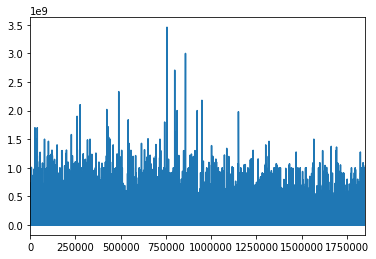

In [0]:
trade['item_price'].plot()

In [0]:
trade['item_price'].max()

3457858551.0

## 파는 캐릭터 : 마이너스(-) 처리 : sell_accesory_amount / sell_adena_amount/sell_armor_amount ... /sell_weapon_amount
## 사는 캐릭터 : 플러스(+) 처리 : get
## 거래숫자 : count / 거래한 가격 : amount

In [0]:
trade.drop(columns=['server','item_one_price'],inplace=True)
trade.head()

day type  acc_id  target_acc_id  item_type  item_amount  item_price  \
3    7    1  121622          71226          1          1.0    400000.0   
4    2    0   14421          65220          4          5.0      6715.0   
5    2    0   90975          22407          3          3.0     59787.0   
7    7    0   96563          82644          4          5.0    711170.0   
9    6    0   91572          41504          4          2.0   1926000.0   

  time_bin  
3        3  
4        2  
5        2  
7        2  
9        0

In [0]:
trade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1137640 entries, 3 to 1849323
Data columns (total 8 columns):
day              1137640 non-null int64
type             1137640 non-null category
acc_id           1137640 non-null int64
target_acc_id    1137640 non-null int64
item_type        1137640 non-null int64
item_amount      1137640 non-null float64
item_price       1137640 non-null float64
time_bin         1137640 non-null category
dtypes: category(2), float64(2), int64(4)
memory usage: 62.9 MB


In [0]:
trade[trade['item_type']==1].head(10)

day type  acc_id  target_acc_id  item_type  item_amount  item_price  \
3     7    1  121622          71226          1          1.0    400000.0   
11    4    1   60544         112518          1          1.0   1000000.0   
15    5    1  127692         112109          1          1.0   7700000.0   
20    5    1   52187         129915          1          1.0  16940000.0   
25    7    1   54845          69413          1          1.0    500000.0   
43    2    1   98632         124737          1          1.0    500000.0   
44    2    1   25686          16745          1          1.0    850000.0   
47    6    1  111023         128502          1          1.0   7000000.0   
48    2    1   96753          16116          1          1.0   1095000.0   
52    7    1  120127          38387          1          1.0    410000.0   

   time_bin  
3         3  
11        1  
15        3  
20        1  
25        1  
43        2  
44        3  
47        1  
48        0  
52        3

In [0]:
trade['item_type'] = trade['item_type'].astype('category')

In [0]:
# Make two trade DataFrames for each source and target
source_trade = trade.drop("target_acc_id", axis=1)
target_trade = trade.drop("acc_id", axis=1)
target_trade = target_trade.rename(columns={"target_acc_id" : "acc_id"})

In [0]:
print(source_trade.shape, target_trade.shape)

(1137640, 7) (1137640, 7)


In [0]:
trade['acc_id'].nunique()

47759

## 돈 섞어주기

In [0]:
source_trade[source_trade['item_type']==1].head()

day type  acc_id item_type  item_amount  item_price time_bin
3     7    1  121622         1          1.0    400000.0        3
11    4    1   60544         1          1.0   1000000.0        1
15    5    1  127692         1          1.0   7700000.0        3
20    5    1   52187         1          1.0  16940000.0        1
25    7    1   54845         1          1.0    500000.0        1

In [0]:
target_trade[target_trade['item_type']==1].head()

day type  acc_id item_type  item_amount  item_price time_bin
3     7    1   71226         1          1.0    400000.0        3
11    4    1  112518         1          1.0   1000000.0        1
15    5    1  112109         1          1.0   7700000.0        3
20    5    1  129915         1          1.0  16940000.0        1
25    7    1   69413         1          1.0    500000.0        1

In [0]:
source_money = source_trade[source_trade['item_type']==1]
target_money = target_trade[target_trade['item_type']==1]

In [0]:
source_money.head()

day type  acc_id item_type  item_amount  item_price time_bin
3     7    1  121622         1          1.0    400000.0        3
11    4    1   60544         1          1.0   1000000.0        1
15    5    1  127692         1          1.0   7700000.0        3
20    5    1   52187         1          1.0  16940000.0        1
25    7    1   54845         1          1.0    500000.0        1

In [0]:
target_money.head()

day type  acc_id item_type  item_amount  item_price time_bin
3     7    1   71226         1          1.0    400000.0        3
11    4    1  112518         1          1.0   1000000.0        1
15    5    1  112109         1          1.0   7700000.0        3
20    5    1  129915         1          1.0  16940000.0        1
25    7    1   69413         1          1.0    500000.0        1

In [0]:
target_trade[target_trade['item_type']!=1].head()

day type  acc_id item_type  item_amount  item_price time_bin
4     2    0   65220         4          5.0      6715.0        2
5     2    0   22407         3          3.0     59787.0        2
7     7    0   82644         4          5.0    711170.0        2
9     6    0   41504         4          2.0   1926000.0        0
10    4    0   92857         4        400.0  10111600.0        1

In [0]:
source_trade[source_trade['item_type']!=1].head()

day type  acc_id item_type  item_amount  item_price time_bin
4     2    0   14421         4          5.0      6715.0        2
5     2    0   90975         3          3.0     59787.0        2
7     7    0   96563         4          5.0    711170.0        2
9     6    0   91572         4          2.0   1926000.0        0
10    4    0   40821         4        400.0  10111600.0        1

In [0]:
tmpt = target_trade[target_trade['item_type']!=1]

In [0]:
tmps = source_trade[source_trade['item_type']!=1]

In [0]:
target_trade = pd.concat([tmpt,source_money], axis=0)
source_trade = pd.concat([tmps,target_money], axis=0)
print(target_trade.shape, source_trade.shape)

(1137640, 7) (1137640, 7)


In [0]:
source_trade[source_trade['item_type']==1].head()

day type  acc_id item_type  item_amount  item_price time_bin
3     7    1   71226         1          1.0    400000.0        3
11    4    1  112518         1          1.0   1000000.0        1
15    5    1  112109         1          1.0   7700000.0        3
20    5    1  129915         1          1.0  16940000.0        1
25    7    1   69413         1          1.0    500000.0        1

In [0]:
target_trade[target_trade['item_type']==1].head()

day type  acc_id item_type  item_amount  item_price time_bin
3     7    1  121622         1          1.0    400000.0        3
11    4    1   60544         1          1.0   1000000.0        1
15    5    1  127692         1          1.0   7700000.0        3
20    5    1   52187         1          1.0  16940000.0        1
25    7    1   54845         1          1.0    500000.0        1

In [0]:
source_trade[source_trade['item_type']==1].head(10)

day type  acc_id item_type  item_amount  item_price time_bin
3     7    1   71226         1          1.0    400000.0        3
11    4    1  112518         1          1.0   1000000.0        1
15    5    1  112109         1          1.0   7700000.0        3
20    5    1  129915         1          1.0  16940000.0        1
25    7    1   69413         1          1.0    500000.0        1
43    2    1  124737         1          1.0    500000.0        2
44    2    1   16745         1          1.0    850000.0        3
47    6    1  128502         1          1.0   7000000.0        1
48    2    1   16116         1          1.0   1095000.0        0
52    7    1   38387         1          1.0    410000.0        3

In [0]:
target_trade[target_trade['item_type']==1].head(10)

day type  acc_id item_type  item_amount  item_price time_bin
3     7    1  121622         1          1.0    400000.0        3
11    4    1   60544         1          1.0   1000000.0        1
15    5    1  127692         1          1.0   7700000.0        3
20    5    1   52187         1          1.0  16940000.0        1
25    7    1   54845         1          1.0    500000.0        1
43    2    1   98632         1          1.0    500000.0        2
44    2    1   25686         1          1.0    850000.0        3
47    6    1  111023         1          1.0   7000000.0        1
48    2    1   96753         1          1.0   1095000.0        0
52    7    1  120127         1          1.0    410000.0        3

In [0]:
source_trade.isnull().sum()

day            0
type           0
acc_id         0
item_type      0
item_amount    0
item_price     0
time_bin       0
dtype: int64

In [0]:
source_trade.head()
# source id의 거래내역

day type  acc_id item_type  item_amount  item_price time_bin
4     2    0   14421         4          5.0      6715.0        2
5     2    0   90975         3          3.0     59787.0        2
7     7    0   96563         4          5.0    711170.0        2
9     6    0   91572         4          2.0   1926000.0        0
10    4    0   40821         4        400.0  10111600.0        1

In [0]:
itemtype_list = ['accessory', 'adena', 'armor', 'enchant_scroll', 'etc', 'spell','weapon']
for type in itemtype_list:
    source_trade['sell_amount_'+type] = 0
    source_trade['sell_count_'+type] = 0

In [0]:
source_trade.head()

day type  acc_id item_type  item_amount  item_price time_bin  \
4     2    0   14421         4          5.0      6715.0        2   
5     2    0   90975         3          3.0     59787.0        2   
7     7    0   96563         4          5.0    711170.0        2   
9     6    0   91572         4          2.0   1926000.0        0   
10    4    0   40821         4        400.0  10111600.0        1   

    sell_amount_accessory  sell_count_accessory  sell_amount_adena  \
4                       0                     0                  0   
5                       0                     0                  0   
7                       0                     0                  0   
9                       0                     0                  0   
10                      0                     0                  0   

    sell_count_adena  sell_amount_armor  sell_count_armor  \
4                  0                  0                 0   
5                  0                  0                 0   
7                  0                  0                 0   
9                  0                  0                 0   
10                 0                  0                 0   

    sell_amount_enchant_scroll  sell_count_enchant_scroll  sell_amount_etc  \
4                            0                          0                0   
5                            0                          0                0   
7                            0                          0                0   
9                            0                          0                0   
10                           0                          0                0   

    sell_count_etc  sell_amount_spell  sell_count_spell  sell_amount_weapon  \
4                0                  0                 0                   0   
5                0                  0                 0                   0   
7                0                  0                 0                   0   
9                0                  0                 0                   0   
10               0                  0                 0                   0   

    sell_count_weapon  
4                   0  
5                   0  
7                   0  
9                   0  
10                  0

In [0]:
source_trade.columns

Index(['day', 'type', 'acc_id', 'item_type', 'item_amount', 'item_price',
       'time_bin', 'sell_amount_accessory', 'sell_count_accessory',
       'sell_amount_adena', 'sell_count_adena', 'sell_amount_armor',
       'sell_count_armor', 'sell_amount_enchant_scroll',
       'sell_count_enchant_scroll', 'sell_amount_etc', 'sell_count_etc',
       'sell_amount_spell', 'sell_count_spell', 'sell_amount_weapon',
       'sell_count_weapon'],
      dtype='object')

In [0]:
source_trade['item_type'].unique()

[4, 3, 0, 5, 2, 6, 1]
Categories (7, int64): [4, 3, 0, 5, 2, 6, 1]

In [0]:
source_list = ['sell_count_accessory', 'sell_count_adena', 'sell_count_armor', 'sell_count_enchant_scroll',\
       'sell_count_etc', 'sell_count_spell', 'sell_count_weapon']
source_dict = {x:i for x,i in zip(source_list,range(0,7))}
for source in source_list:
    source_trade[source] = np.where(source_trade['item_type']==source_dict[source], source_trade[source]+source_trade['item_amount'],source_trade[source])

In [0]:
source_list = ['sell_amount_accessory', 'sell_amount_adena', 'sell_amount_armor', 'sell_amount_enchant_scroll',\
       'sell_amount_etc', 'sell_amount_spell', 'sell_amount_weapon']
source_dict = {x:i for x,i in zip(source_list,range(0,7))}
for source in source_list:
    source_trade[source] = np.where(source_trade['item_type']==source_dict[source], source_trade[source]+(source_trade['item_price']),source_trade[source])

In [0]:
# 어떤 물품을 몇개 거래했는지까지 추가 완료
source_trade = source_trade.rename(columns={"type":"sell_type","item_price":"sell_item_price","item_amount":"sell_item_amount"\
                                           ,"item_type":"sell_item_type", "item_price":"sell_item_price","time_bin":"sell_time_bin"})
source_trade.head()

day sell_type  acc_id sell_item_type  sell_item_amount  sell_item_price  \
4     2         0   14421              4               5.0           6715.0   
5     2         0   90975              3               3.0          59787.0   
7     7         0   96563              4               5.0         711170.0   
9     6         0   91572              4               2.0        1926000.0   
10    4         0   40821              4             400.0       10111600.0   

   sell_time_bin  sell_amount_accessory  sell_count_accessory  \
4              2                    0.0                   0.0   
5              2                    0.0                   0.0   
7              2                    0.0                   0.0   
9              0                    0.0                   0.0   
10             1                    0.0                   0.0   

    sell_amount_adena  sell_count_adena  sell_amount_armor  sell_count_armor  \
4                 0.0               0.0                0.0               0.0   
5                 0.0               0.0                0.0               0.0   
7                 0.0               0.0                0.0               0.0   
9                 0.0               0.0                0.0               0.0   
10                0.0               0.0                0.0               0.0   

    sell_amount_enchant_scroll  sell_count_enchant_scroll  sell_amount_etc  \
4                          0.0                        0.0           6715.0   
5                      59787.0                        3.0              0.0   
7                          0.0                        0.0         711170.0   
9                          0.0                        0.0        1926000.0   
10                         0.0                        0.0       10111600.0   

    sell_count_etc  sell_amount_spell  sell_count_spell  sell_amount_weapon  \
4              5.0                0.0               0.0                 0.0   
5              0.0                0.0               0.0                 0.0   
7              5.0                0.0               0.0                 0.0   
9              2.0                0.0               0.0                 0.0   
10           400.0                0.0               0.0                 0.0   

    sell_count_weapon  
4                 0.0  
5                 0.0  
7                 0.0  
9                 0.0  
10                0.0

In [0]:
target_trade.head()
# target id의 거래내역

day type  acc_id item_type  item_amount  item_price time_bin
4     2    0   65220         4          5.0      6715.0        2
5     2    0   22407         3          3.0     59787.0        2
7     7    0   82644         4          5.0    711170.0        2
9     6    0   41504         4          2.0   1926000.0        0
10    4    0   92857         4        400.0  10111600.0        1

In [0]:
itemtype_list = ['accessory', 'adena', 'armor', 'enchant_scroll', 'etc', 'spell','weapon']
for type in itemtype_list:
    target_trade['get_amount_'+type] = 0
    target_trade['get_count_'+type] = 0

In [0]:
target_trade.columns

Index(['day', 'type', 'acc_id', 'item_type', 'item_amount', 'item_price',
       'time_bin', 'get_amount_accessory', 'get_count_accessory',
       'get_amount_adena', 'get_count_adena', 'get_amount_armor',
       'get_count_armor', 'get_amount_enchant_scroll',
       'get_count_enchant_scroll', 'get_amount_etc', 'get_count_etc',
       'get_amount_spell', 'get_count_spell', 'get_amount_weapon',
       'get_count_weapon'],
      dtype='object')

In [0]:
target_list = ['get_count_accessory', 'get_count_adena', 'get_count_armor', 'get_count_enchant_scroll',\
       'get_count_etc', 'get_count_spell', 'get_count_weapon']
target_dict = {x:i for x,i in zip(target_list,range(0,7))}
for target in target_list:
    target_trade[target] = np.where(target_trade['item_type']==target_dict[target], target_trade[target]+target_trade['item_amount'],target_trade[target])

In [0]:
target_list = ['get_amount_accessory', 'get_amount_adena', 'get_amount_armor', 'get_amount_enchant_scroll',\
       'get_amount_etc', 'get_amount_spell', 'get_amount_weapon']
target_dict = {x:i for x,i in zip(target_list,range(0,7))}
for target in target_list:
    target_trade[target] = np.where(target_trade['item_type']==target_dict[target], target_trade[target]+target_trade['item_price'],target_trade[target])

In [0]:
# 어떤 물품을 몇개 거래했는지까지 추가 완료
target_trade = target_trade.rename(columns={"type":"get_type","item_price":"get_item_price",'item_amount':'get_item_amount'\
                                           ,"item_type":"get_item_type",'item_price':"get_item_price","time_bin":"get_time_bin"})
target_trade.head()

day get_type  acc_id get_item_type  get_item_amount  get_item_price  \
4     2        0   65220             4              5.0          6715.0   
5     2        0   22407             3              3.0         59787.0   
7     7        0   82644             4              5.0        711170.0   
9     6        0   41504             4              2.0       1926000.0   
10    4        0   92857             4            400.0      10111600.0   

   get_time_bin  get_amount_accessory  get_count_accessory  get_amount_adena  \
4             2                   0.0                  0.0               0.0   
5             2                   0.0                  0.0               0.0   
7             2                   0.0                  0.0               0.0   
9             0                   0.0                  0.0               0.0   
10            1                   0.0                  0.0               0.0   

    get_count_adena  get_amount_armor  get_count_armor  \
4               0.0               0.0              0.0   
5               0.0               0.0              0.0   
7               0.0               0.0              0.0   
9               0.0               0.0              0.0   
10              0.0               0.0              0.0   

    get_amount_enchant_scroll  get_count_enchant_scroll  get_amount_etc  \
4                         0.0                       0.0          6715.0   
5                     59787.0                       3.0             0.0   
7                         0.0                       0.0        711170.0   
9                         0.0                       0.0       1926000.0   
10                        0.0                       0.0      10111600.0   

    get_count_etc  get_amount_spell  get_count_spell  get_amount_weapon  \
4             5.0               0.0              0.0                0.0   
5             0.0               0.0              0.0                0.0   
7             5.0               0.0              0.0                0.0   
9             2.0               0.0              0.0                0.0   
10          400.0               0.0              0.0                0.0   

    get_count_weapon  
4                0.0  
5                0.0  
7                0.0  
9                0.0  
10               0.0

In [0]:
# Total number of trade occurence per account the whole period

source_trade_count = source_trade["acc_id"].value_counts()
target_trade_count = target_trade["acc_id"].value_counts()

In [0]:
source_trade_count.head()

59264     4614
116315    4084
52260     4048
68330     3798
92665     3784
Name: acc_id, dtype: int64

In [0]:
target_trade_count.head()

91062     2836
33305     2464
89218     1908
86784     1814
120428    1796
Name: acc_id, dtype: int64

In [0]:
source_trade_count = pd.DataFrame({"acc_id" : source_trade_count.index,
                                   "count" : source_trade_count})    # Make a dataframe to merge based on "acc_id"
target_trade_count = pd.DataFrame({"acc_id" : target_trade_count.index,
                                   "count" : target_trade_count})

In [0]:
source_trade_count.head()

acc_id  count
59264    59264   4614
116315  116315   4084
52260    52260   4048
68330    68330   3798
92665    92665   3784

In [0]:
target_trade_count.head()

acc_id  count
91062    91062   2836
33305    33305   2464
89218    89218   1908
86784    86784   1814
120428  120428   1796

In [0]:
print(source_trade_count.shape, target_trade_count.shape)

(51277, 2) (68097, 2)


In [0]:
train_combat['acc_id'].value_counts().size

40000

In [0]:
train_combat['acc_id'].unique()

array([13809, 62835, 54241, ..., 70769, 49584, 66902])

In [0]:
acc_id = pd.DataFrame(train_combat['acc_id'].unique(),columns=['acc_id'])
source_trade_count = pd.merge(source_trade_count, acc_id, on="acc_id", how='inner')
target_trade_count = pd.merge(target_trade_count, acc_id, on="acc_id", how='inner')

In [0]:
print(source_trade_count.shape, target_trade_count.shape)

(26348, 2) (30276, 2)


In [0]:
source_trade_count.head()

acc_id  count
0   59264   4614
1  116315   4084
2   52260   4048
3   68330   3798
4   92665   3784

In [0]:
trade_count = pd.merge(source_trade_count, target_trade_count, on = "acc_id", how='outer')
trade_count = trade_count.fillna(0)
trade_count["count"] = trade_count["count_x"] + trade_count["count_y"]
trade_count.head()

acc_id  count_x  count_y   count
0   59264   4614.0    133.0  4747.0
1  116315   4084.0     66.0  4150.0
2   52260   4048.0     63.0  4111.0
3   68330   3798.0     64.0  3862.0
4   92665   3784.0     60.0  3844.0

In [0]:
trade_count.tail()

acc_id  count_x  count_y  count
32930   74903      0.0      1.0    1.0
32931   60962      0.0      1.0    1.0
32932   90641      0.0      1.0    1.0
32933   47657      0.0      1.0    1.0
32934   44584      0.0      1.0    1.0

In [0]:
trade_count.shape

(32935, 4)

In [0]:
# trade_count.drop(["count_x", "count_y"], axis=1, inplace=True)
trade_count = trade_count.rename(columns={'count':'total_trade_count', 'count_x':'count_sell', 'count_y':'count_get'})
trade_count.head()

acc_id  count_sell  count_get  total_trade_count
0   59264      4614.0      133.0             4747.0
1  116315      4084.0       66.0             4150.0
2   52260      4048.0       63.0             4111.0
3   68330      3798.0       64.0             3862.0
4   92665      3784.0       60.0             3844.0

In [0]:
trade_count = trade_count.astype('int')

In [0]:
trade_count.shape

(32935, 4)

In [0]:
# 현재 이건 오직 source acc_id data만 있는 것!
# source_trade = trade.drop(["target_acc_id", "item_type", "item_amount", "item_price"], axis=1)
# target_trade = trade.drop(["acc_id", "item_type", "item_amount", "item_price"], axis=1)
source_trade.head()

day sell_type  acc_id sell_item_type  sell_item_amount  sell_item_price  \
4     2         0   14421              4               5.0           6715.0   
5     2         0   90975              3               3.0          59787.0   
7     7         0   96563              4               5.0         711170.0   
9     6         0   91572              4               2.0        1926000.0   
10    4         0   40821              4             400.0       10111600.0   

   sell_time_bin  sell_amount_accessory  sell_count_accessory  \
4              2                    0.0                   0.0   
5              2                    0.0                   0.0   
7              2                    0.0                   0.0   
9              0                    0.0                   0.0   
10             1                    0.0                   0.0   

    sell_amount_adena  sell_count_adena  sell_amount_armor  sell_count_armor  \
4                 0.0               0.0                0.0               0.0   
5                 0.0               0.0                0.0               0.0   
7                 0.0               0.0                0.0               0.0   
9                 0.0               0.0                0.0               0.0   
10                0.0               0.0                0.0               0.0   

    sell_amount_enchant_scroll  sell_count_enchant_scroll  sell_amount_etc  \
4                          0.0                        0.0           6715.0   
5                      59787.0                        3.0              0.0   
7                          0.0                        0.0         711170.0   
9                          0.0                        0.0        1926000.0   
10                         0.0                        0.0       10111600.0   

    sell_count_etc  sell_amount_spell  sell_count_spell  sell_amount_weapon  \
4              5.0                0.0               0.0                 0.0   
5              0.0                0.0               0.0                 0.0   
7              5.0                0.0               0.0                 0.0   
9              2.0                0.0               0.0                 0.0   
10           400.0                0.0               0.0                 0.0   

    sell_count_weapon  
4                 0.0  
5                 0.0  
7                 0.0  
9                 0.0  
10                0.0

In [0]:
source_trade.shape

(1137640, 21)

In [0]:
target_trade.head()

day get_type  acc_id get_item_type  get_item_amount  get_item_price  \
4     2        0   65220             4              5.0          6715.0   
5     2        0   22407             3              3.0         59787.0   
7     7        0   82644             4              5.0        711170.0   
9     6        0   41504             4              2.0       1926000.0   
10    4        0   92857             4            400.0      10111600.0   

   get_time_bin  get_amount_accessory  get_count_accessory  get_amount_adena  \
4             2                   0.0                  0.0               0.0   
5             2                   0.0                  0.0               0.0   
7             2                   0.0                  0.0               0.0   
9             0                   0.0                  0.0               0.0   
10            1                   0.0                  0.0               0.0   

    get_count_adena  get_amount_armor  get_count_armor  \
4               0.0               0.0              0.0   
5               0.0               0.0              0.0   
7               0.0               0.0              0.0   
9               0.0               0.0              0.0   
10              0.0               0.0              0.0   

    get_amount_enchant_scroll  get_count_enchant_scroll  get_amount_etc  \
4                         0.0                       0.0          6715.0   
5                     59787.0                       3.0             0.0   
7                         0.0                       0.0        711170.0   
9                         0.0                       0.0       1926000.0   
10                        0.0                       0.0      10111600.0   

    get_count_etc  get_amount_spell  get_count_spell  get_amount_weapon  \
4             5.0               0.0              0.0                0.0   
5             0.0               0.0              0.0                0.0   
7             5.0               0.0              0.0                0.0   
9             2.0               0.0              0.0                0.0   
10          400.0               0.0              0.0                0.0   

    get_count_weapon  
4                0.0  
5                0.0  
7                0.0  
9                0.0  
10               0.0

In [0]:
target_trade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1137640 entries, 4 to 1849321
Data columns (total 21 columns):
day                          1137640 non-null int64
get_type                     1137640 non-null category
acc_id                       1137640 non-null int64
get_item_type                1137640 non-null category
get_item_amount              1137640 non-null float64
get_item_price               1137640 non-null float64
get_time_bin                 1137640 non-null category
get_amount_accessory         1137640 non-null float64
get_count_accessory          1137640 non-null float64
get_amount_adena             1137640 non-null float64
get_count_adena              1137640 non-null float64
get_amount_armor             1137640 non-null float64
get_count_armor              1137640 non-null float64
get_amount_enchant_scroll    1137640 non-null float64
get_count_enchant_scroll     1137640 non-null float64
get_amount_etc               1137640 non-null float64
get_count_etc           

In [0]:
# target_trade['day'] = target_trade['day'].astype('category')
# target_trade['acc_id'] = target_trade['acc_id'].astype('category')

In [0]:
pd.get_dummies(target_trade).head()

day  acc_id  get_item_amount  get_item_price  get_amount_accessory  \
4     2   65220              5.0          6715.0                   0.0   
5     2   22407              3.0         59787.0                   0.0   
7     7   82644              5.0        711170.0                   0.0   
9     6   41504              2.0       1926000.0                   0.0   
10    4   92857            400.0      10111600.0                   0.0   

    get_count_accessory  get_amount_adena  get_count_adena  get_amount_armor  \
4                   0.0               0.0              0.0               0.0   
5                   0.0               0.0              0.0               0.0   
7                   0.0               0.0              0.0               0.0   
9                   0.0               0.0              0.0               0.0   
10                  0.0               0.0              0.0               0.0   

    get_count_armor  get_amount_enchant_scroll  get_count_enchant_scroll  \
4               0.0                        0.0                       0.0   
5               0.0                    59787.0                       3.0   
7               0.0                        0.0                       0.0   
9               0.0                        0.0                       0.0   
10              0.0                        0.0                       0.0   

    get_amount_etc  get_count_etc  get_amount_spell  get_count_spell  \
4           6715.0            5.0               0.0              0.0   
5              0.0            0.0               0.0              0.0   
7         711170.0            5.0               0.0              0.0   
9        1926000.0            2.0               0.0              0.0   
10      10111600.0          400.0               0.0              0.0   

    get_amount_weapon  get_count_weapon  get_type_0  get_type_1  \
4                 0.0               0.0           1           0   
5                 0.0               0.0           1           0   
7                 0.0               0.0           1           0   
9                 0.0               0.0           1           0   
10                0.0               0.0           1           0   

    get_item_type_0  get_item_type_1  get_item_type_2  get_item_type_3  \
4                 0                0                0                0   
5                 0                0                0                1   
7                 0                0                0                0   
9                 0                0                0                0   
10                0                0                0                0   

    get_item_type_4  get_item_type_5  get_item_type_6  get_time_bin_0  \
4                 1                0                0               0   
5                 0                0                0               0   
7                 1                0                0               0   
9                 1                0                0               1   
10                1                0                0               0   

    get_time_bin_1  get_time_bin_2  get_time_bin_3  
4                0               1               0  
5                0               1               0  
7                0               1               0  
9                0               0               0  
10               1               0               0

In [0]:
pd.get_dummies(source_trade).head()

day  acc_id  sell_item_amount  sell_item_price  sell_amount_accessory  \
4     2   14421               5.0           6715.0                    0.0   
5     2   90975               3.0          59787.0                    0.0   
7     7   96563               5.0         711170.0                    0.0   
9     6   91572               2.0        1926000.0                    0.0   
10    4   40821             400.0       10111600.0                    0.0   

    sell_count_accessory  sell_amount_adena  sell_count_adena  \
4                    0.0                0.0               0.0   
5                    0.0                0.0               0.0   
7                    0.0                0.0               0.0   
9                    0.0                0.0               0.0   
10                   0.0                0.0               0.0   

    sell_amount_armor  sell_count_armor  sell_amount_enchant_scroll  \
4                 0.0               0.0                         0.0   
5                 0.0               0.0                     59787.0   
7                 0.0               0.0                         0.0   
9                 0.0               0.0                         0.0   
10                0.0               0.0                         0.0   

    sell_count_enchant_scroll  sell_amount_etc  sell_count_etc  \
4                         0.0           6715.0             5.0   
5                         3.0              0.0             0.0   
7                         0.0         711170.0             5.0   
9                         0.0        1926000.0             2.0   
10                        0.0       10111600.0           400.0   

    sell_amount_spell  sell_count_spell  sell_amount_weapon  \
4                 0.0               0.0                 0.0   
5                 0.0               0.0                 0.0   
7                 0.0               0.0                 0.0   
9                 0.0               0.0                 0.0   
10                0.0               0.0                 0.0   

    sell_count_weapon  sell_type_0  sell_type_1  sell_item_type_0  \
4                 0.0            1            0                 0   
5                 0.0            1            0                 0   
7                 0.0            1            0                 0   
9                 0.0            1            0                 0   
10                0.0            1            0                 0   

    sell_item_type_1  sell_item_type_2  sell_item_type_3  sell_item_type_4  \
4                  0                 0                 0                 1   
5                  0                 0                 1                 0   
7                  0                 0                 0                 1   
9                  0                 0                 0                 1   
10                 0                 0                 0                 1   

    sell_item_type_5  sell_item_type_6  sell_time_bin_0  sell_time_bin_1  \
4                  0                 0                0                0   
5                  0                 0                0                0   
7                  0                 0                0                0   
9                  0                 0                1                0   
10                 0                 0                0                1   

    sell_time_bin_2  sell_time_bin_3  
4                 1                0  
5                 1                0  
7                 1                0  
9                 0                0  
10                0                0

In [0]:
target_trade_sparse = pd.get_dummies(target_trade)
source_trade_sparse = pd.get_dummies(source_trade)

In [0]:
# pd.merge(source_trade,acc_id,on='acc_id',how='inner').isnull().sum()

In [0]:
pd.pivot_table(data=source_trade_sparse, index=["acc_id", "day"],aggfunc=sum)

sell_amount_accessory  sell_amount_adena  sell_amount_armor  \
acc_id day                                                                
2      1                      0.0                0.0                0.0   
       2                      0.0                0.0                0.0   
       3                      0.0                0.0                0.0   
       5                      0.0                0.0           798000.0   
       6                      0.0                0.0                0.0   
       7                      0.0                0.0                0.0   
       10                     0.0                0.0                0.0   
       12                     0.0                0.0                0.0   
       14                     0.0                0.0                0.0   
       16                     0.0                0.0                0.0   
       18                     0.0                0.0           460200.0   
       19                     0.0                0.0           932890.0   
       20                     0.0                0.0           469000.0   
       23                     0.0                0.0                0.0   
       24                     0.0                0.0                0.0   
       25                     0.0                0.0           919974.0   
       26                     0.0                0.0           439832.0   
       27                     0.0                0.0                0.0   
       28                     0.0                0.0           330960.0   
6      17                     0.0             3000.0                0.0   
       21                     0.0                0.0                0.0   
       22                     0.0                0.0                0.0   
       24                     0.0                0.0                0.0   
       25                     0.0                0.0                0.0   
       26                     0.0                0.0                0.0   
       27                     0.0                0.0                0.0   
       28                     0.0                0.0                0.0   
8      2                      0.0           100000.0                0.0   
       3                      0.0        100000000.0                0.0   
       12                     0.0          1800000.0                0.0   
12     13                     0.0            15000.0                0.0   
17     1                      0.0          3000000.0                0.0   
       2                      0.0          9000000.0                0.0   
       6                      0.0          5000000.0                0.0   
       15                     0.0          2000000.0                0.0   
       18                     0.0        100000000.0                0.0   
       23                     0.0          5000000.0                0.0   
18     1                      0.0                0.0           313068.0   
       2                      0.0                0.0                0.0   
       6                      0.0                0.0            72502.0   
       7                      0.0                0.0                0.0   
       9                      0.0                0.0            52015.0   
       11                     0.0                0.0           238900.0   
       15                     0.0                0.0            14162.0   
       16                     0.0                0.0            88008.0   
       19                     0.0                0.0            21174.0   
       21                     0.0                0.0            37833.0   
       24                     0.0                0.0          1789209.0   
       26                     0.0                0.0           234081.0   
       27                     0.0                0.0           749450.0   
...                           ...                ...                ...   
130459 6                      0.0    

In [0]:
source_pivot = pd.pivot_table(data=source_trade_sparse, index=["acc_id", "day"],aggfunc=sum)

In [0]:
source_pivot.head(10)

sell_amount_accessory  sell_amount_adena  sell_amount_armor  \
acc_id day                                                                
2      1                      0.0                0.0                0.0   
       2                      0.0                0.0                0.0   
       3                      0.0                0.0                0.0   
       5                      0.0                0.0           798000.0   
       6                      0.0                0.0                0.0   
       7                      0.0                0.0                0.0   
       10                     0.0                0.0                0.0   
       12                     0.0                0.0                0.0   
       14                     0.0                0.0                0.0   
       16                     0.0                0.0                0.0   

            sell_amount_enchant_scroll  sell_amount_etc  sell_amount_spell  \
acc_id day                                                                   
2      1                           0.0       36300925.0                0.0   
       2                           0.0        2120660.0                0.0   
       3                           0.0       16089682.0                0.0   
       5                           0.0              0.0                0.0   
       6                           0.0         544050.0                0.0   
       7                           0.0       12565800.0                0.0   
       10                          0.0        4898202.0                0.0   
       12                          0.0        1998700.0                0.0   
       14                          0.0        1799500.0                0.0   
       16                          0.0          57482.0                0.0   

            sell_amount_weapon  sell_count_accessory  sell_count_adena  \
acc_id day                                                               
2      1                   0.0                   0.0               0.0   
       2                   0.0                   0.0               0.0   
       3                   0.0                   0.0               0.0   
       5                   0.0                   0.0               0.0   
       6                   0.0                   0.0               0.0   
       7                   0.0                   0.0               0.0   
       10                  0.0                   0.0               0.0   
       12                  0.0                   0.0               0.0   
       14                  0.0                   0.0               0.0   
       16                  0.0                   0.0               0.0   

            sell_count_armor  sell_count_enchant_scroll  sell_count_etc  \
acc_id day                                                                
2      1                 0.0                        0.0           114.0   
       2                 0.0                        0.0             4.0   
       3                 0.0                        0.0            31.0   
       5                 1.0                        0.0             0.0   
       6                 0.0                        0.0             1.0   
       7                 0.0                        0.0            50.0   
       10                0.0                        0.0           145.0   
       12                0.0                        0.0             1.0   
       14                0.0                        0.0             1.0   
       16                0.0                        0.0             1.0   

            sell_count_spell  sell_count_weapon  sell_item_amount  \
acc_id day                                                          
2      1                 0.0                0.0             114.0   
       2                 0.0                0.0               4.0   
       3                 0.0                0.0              31.0   
       5                 0.0           

In [0]:
pd.pivot_table(data=target_trade_sparse, index=["acc_id", "day"],aggfunc=sum).head(10)

get_amount_accessory  get_amount_adena  get_amount_armor  \
acc_id day                                                             
2      2                     0.0        13000000.0               0.0   
       9                     0.0               0.0               0.0   
3      27                    0.0               0.0               0.0   
4      19                    0.0               0.0               0.0   
5      20                    0.0               0.0               0.0   
       22                    0.0               0.0               0.0   
       23                    0.0               0.0               0.0   
       25                    0.0               0.0               0.0   
       26                    0.0               0.0               0.0   
8      7                     0.0         3900000.0               0.0   

            get_amount_enchant_scroll  get_amount_etc  get_amount_spell  \
acc_id day                                                                
2      2                          0.0             0.0               0.0   
       9                          0.0        142951.0               0.0   
3      27                         0.0       1011658.0               0.0   
4      19                         0.0         49000.0               0.0   
5      20                         0.0         43000.0               0.0   
       22                         0.0        264000.0               0.0   
       23                         0.0         88000.0               0.0   
       25                         0.0        158312.0               0.0   
       26                         0.0       3990939.0               0.0   
8      7                          0.0             0.0               0.0   

            get_amount_weapon  get_count_accessory  get_count_adena  \
acc_id day                                                            
2      2                  0.0                  0.0              1.0   
       9                  0.0                  0.0              0.0   
3      27                 0.0                  0.0              0.0   
4      19                 0.0                  0.0              0.0   
5      20                 0.0                  0.0              0.0   
       22                 0.0                  0.0              0.0   
       23                 0.0                  0.0              0.0   
       25                 0.0                  0.0              0.0   
       26                 0.0                  0.0              0.0   
8      7                  0.0                  0.0              4.0   

            get_count_armor  get_count_enchant_scroll  get_count_etc  \
acc_id day                                                             
2      2                0.0                       0.0            0.0   
       9                0.0                       0.0            2.0   
3      27               0.0                       0.0            1.0   
4      19               0.0                       0.0            1.0   
5      20               0.0                       0.0          500.0   
       22               0.0                       0.0         3000.0   
       23               0.0                       0.0         1000.0   
       25               0.0                       0.0         1799.0   
       26               0.0                       0.0         2106.0   
8      7                0.0                       0.0            0.0   

            get_count_spell  get_count_weapon  get_item_amount  \
acc_id day                                                       
2      2                0.0               0.0              1.0   
       9                0.0               0.0              2.0   
3      27               0.0               0.0              1.0   
4      19               0.0               0.0              1.0   
5      20               0.0               0.0            500.0   
       22               0.0               0.0           3000.0   


In [0]:
target_pivot = pd.pivot_table(data=target_trade_sparse, index=["acc_id", "day"],aggfunc=sum)

In [0]:
target_pivot.head()

get_amount_accessory  get_amount_adena  get_amount_armor  \
acc_id day                                                             
2      2                     0.0        13000000.0               0.0   
       9                     0.0               0.0               0.0   
3      27                    0.0               0.0               0.0   
4      19                    0.0               0.0               0.0   
5      20                    0.0               0.0               0.0   

            get_amount_enchant_scroll  get_amount_etc  get_amount_spell  \
acc_id day                                                                
2      2                          0.0             0.0               0.0   
       9                          0.0        142951.0               0.0   
3      27                         0.0       1011658.0               0.0   
4      19                         0.0         49000.0               0.0   
5      20                         0.0         43000.0               0.0   

            get_amount_weapon  get_count_accessory  get_count_adena  \
acc_id day                                                            
2      2                  0.0                  0.0              1.0   
       9                  0.0                  0.0              0.0   
3      27                 0.0                  0.0              0.0   
4      19                 0.0                  0.0              0.0   
5      20                 0.0                  0.0              0.0   

            get_count_armor  get_count_enchant_scroll  get_count_etc  \
acc_id day                                                             
2      2                0.0                       0.0            0.0   
       9                0.0                       0.0            2.0   
3      27               0.0                       0.0            1.0   
4      19               0.0                       0.0            1.0   
5      20               0.0                       0.0          500.0   

            get_count_spell  get_count_weapon  get_item_amount  \
acc_id day                                                       
2      2                0.0               0.0              1.0   
       9                0.0               0.0              2.0   
3      27               0.0               0.0              1.0   
4      19               0.0               0.0              1.0   
5      20               0.0               0.0            500.0   

            get_item_price  get_item_type_0  get_item_type_1  get_item_type_2  \
acc_id day                                                                      
2      2        13000000.0                0                1                0   
       9          142951.0                0                0                0   
3      27        1011658.0                0                0                0   
4      19          49000.0                0                0                0   
5      20          43000.0                0                0                0   

            get_item_type_3  get_item_type_4  get_item_type_5  \
acc_id day                                                      
2      2                  0                0                0   
       9                  0                1                0   
3      27                 0                1                0   
4      19                 0                1                0   
5      20                 0                1                0   

            get_item_type_6  get_time_bin_0  get_time_bin_1  get_time_bin_2  \
acc_id day                                                                    
2      2                  0               0               0               1   
       9                  0               0               0               1   
3      27                 0               1               0               0   
4      19                 0               0               0               0   
5      20        

In [0]:
merged_trade = pd.merge(source_pivot, target_pivot, on=['acc_id','day'], how='outer') # fillna는 잠시만 있다가

In [0]:
merged_trade.head()

sell_amount_accessory  sell_amount_adena  sell_amount_armor  \
acc_id day                                                                
2      1                      0.0                0.0                0.0   
       2                      0.0                0.0                0.0   
       3                      0.0                0.0                0.0   
       5                      0.0                0.0           798000.0   
       6                      0.0                0.0                0.0   

            sell_amount_enchant_scroll  sell_amount_etc  sell_amount_spell  \
acc_id day                                                                   
2      1                           0.0       36300925.0                0.0   
       2                           0.0        2120660.0                0.0   
       3                           0.0       16089682.0                0.0   
       5                           0.0              0.0                0.0   
       6                           0.0         544050.0                0.0   

            sell_amount_weapon  sell_count_accessory  sell_count_adena  \
acc_id day                                                               
2      1                   0.0                   0.0               0.0   
       2                   0.0                   0.0               0.0   
       3                   0.0                   0.0               0.0   
       5                   0.0                   0.0               0.0   
       6                   0.0                   0.0               0.0   

            sell_count_armor  sell_count_enchant_scroll  sell_count_etc  \
acc_id day                                                                
2      1                 0.0                        0.0           114.0   
       2                 0.0                        0.0             4.0   
       3                 0.0                        0.0            31.0   
       5                 1.0                        0.0             0.0   
       6                 0.0                        0.0             1.0   

            sell_count_spell  sell_count_weapon  sell_item_amount  \
acc_id day                                                          
2      1                 0.0                0.0             114.0   
       2                 0.0                0.0               4.0   
       3                 0.0                0.0              31.0   
       5                 0.0                0.0               1.0   
       6                 0.0                0.0               1.0   

            sell_item_price  sell_item_type_0  sell_item_type_1  \
acc_id day                                                        
2      1         36300925.0               0.0               0.0   
       2          2120660.0               0.0               0.0   
       3         16089682.0               0.0               0.0   
       5           798000.0               0.0               0.0   
       6           544050.0               0.0               0.0   

            sell_item_type_2  sell_item_type_3  sell_item_type_4  \
acc_id day                                                         
2      1                 0.0               0.0               6.0   
       2                 0.0               0.0               1.0   
       3                 0.0               0.0               1.0   
       5                 1.0               0.0               0.0   
       6                 0.0               0.0               1.0   

            sell_item_type_5  sell_item_type_6  sell_time_bin_0  \
acc_id day                                                        
2      1                 0.0               0.0              5.0   
       2                 0.0               0.0              0.0   
       3                 0.0               0.0              0.0   
       5                 0.0               0.0              0.0   
       6                 0.0               0.0              0

In [0]:
merged_trade_both = merged_trade[((merged_trade['sell_amount_accessory'].notnull())&(merged_trade['get_amount_accessory'].notnull()))]
merged_trade_both
# 걍 이제 단위 item_price는 drop하는게 맞을듯?

sell_amount_accessory  sell_amount_adena  sell_amount_armor  \
acc_id day                                                                
17     19            0.000000e+00        100000000.0       0.000000e+00   
       24            0.000000e+00         60000000.0       0.000000e+00   
20     1             0.000000e+00                0.0       0.000000e+00   
       16            0.000000e+00         14300000.0       0.000000e+00   
31     5             0.000000e+00          8000000.0       0.000000e+00   
38     9             0.000000e+00                0.0       0.000000e+00   
       15            0.000000e+00           950000.0       0.000000e+00   
       16            0.000000e+00           100000.0       0.000000e+00   
       22            0.000000e+00         20000000.0       0.000000e+00   
53     1             0.000000e+00                0.0       0.000000e+00   
       2             0.000000e+00         21000000.0       0.000000e+00   
       3             0.000000e+00          2900000.0       0.000000e+00   
       9             0.000000e+00          2000000.0       0.000000e+00   
       11            0.000000e+00                0.0       0.000000e+00   
       24            0.000000e+00          2920000.0       0.000000e+00   
       26            0.000000e+00           600000.0       0.000000e+00   
59     4             0.000000e+00                0.0       0.000000e+00   
       20            0.000000e+00                0.0       0.000000e+00   
62     19            0.000000e+00         12500000.0       0.000000e+00   
       21            0.000000e+00         14500000.0       0.000000e+00   
63     22            0.000000e+00         20000000.0       0.000000e+00   
65     1             0.000000e+00         94277335.0       1.898458e+07   
       2             1.439120e+07         62683600.0       6.961011e+07   
       3             0.000000e+00         65524858.0       2.644841e+07   
       4             1.439120e+07         99527945.0       7.593830e+07   
       5             0.000000e+00         27933143.0       1.898458e+07   
       6             1.439120e+07        127063469.0       9.492288e+07   
       7             1.439120e+07        107861600.0       6.328192e+07   
       8             0.000000e+00         74063273.0       2.531277e+07   
       9             1.439120e+07        104497600.0       6.961011e+07   
       10            0.000000e+00         95086589.0       1.898458e+07   
       11            1.439120e+07        162811237.0       7.593830e+07   
       12            1.439120e+07        138432504.0       8.226650e+07   
       13            0.000000e+00         76885873.0       1.898458e+07   
       14            1.439120e+07        157563556.0       7.593830e+07   
       16            1.439120e+07        105278500.0       6.961011e+07   
       17            0.000000e+00        127323256.0       3.164096e+07   
       18            1.439120e+07        163081397.0       7.593830e+07   
       20            0.000000e+00         76427093.0       6.328192e+06   
       21            1.439120e+07        138905025.0       1.012511e+08   
       22            0.000000e+00        123287283.0       3.796915e+07   
       24            1.439120e+07        230700782.0       1.075793e+08   
       25            1.439120e+07        103751500.0       6.961011e+07   
       26            0.000000e+00        129680719.0       2.531277e+07   
       27            1.439120e+07        182216491.0       7.623930e+07   
       28            1.439120e+07        148195256.0       1.012511e+08   
66     6             0.000000e+00                0.0       6.328192e+06   
       20            0.000000e+00        232000000.0       0.000000e+00   
       22            0.000000e+00                0.0       7.000000e+06   
       26            0.000000e+00            50000.0       0.000000e+00   
...                           ...                ...                ...   
130380 27            0.000000e+00    

In [0]:
merged_trade = merged_trade.fillna(0)
merged_trade.isnull().sum()

sell_amount_accessory         0
sell_amount_adena             0
sell_amount_armor             0
sell_amount_enchant_scroll    0
sell_amount_etc               0
sell_amount_spell             0
sell_amount_weapon            0
sell_count_accessory          0
sell_count_adena              0
sell_count_armor              0
sell_count_enchant_scroll     0
sell_count_etc                0
sell_count_spell              0
sell_count_weapon             0
sell_item_amount              0
sell_item_price               0
sell_item_type_0              0
sell_item_type_1              0
sell_item_type_2              0
sell_item_type_3              0
sell_item_type_4              0
sell_item_type_5              0
sell_item_type_6              0
sell_time_bin_0               0
sell_time_bin_1               0
sell_time_bin_2               0
sell_time_bin_3               0
sell_type_0                   0
sell_type_1                   0
get_amount_accessory          0
get_amount_adena              0
get_amou

In [0]:
merged_trade.columns

Index(['sell_amount_accessory', 'sell_amount_adena', 'sell_amount_armor',
       'sell_amount_enchant_scroll', 'sell_amount_etc', 'sell_amount_spell',
       'sell_amount_weapon', 'sell_count_accessory', 'sell_count_adena',
       'sell_count_armor', 'sell_count_enchant_scroll', 'sell_count_etc',
       'sell_count_spell', 'sell_count_weapon', 'sell_item_amount',
       'sell_item_price', 'sell_item_type_0', 'sell_item_type_1',
       'sell_item_type_2', 'sell_item_type_3', 'sell_item_type_4',
       'sell_item_type_5', 'sell_item_type_6', 'sell_time_bin_0',
       'sell_time_bin_1', 'sell_time_bin_2', 'sell_time_bin_3', 'sell_type_0',
       'sell_type_1', 'get_amount_accessory', 'get_amount_adena',
       'get_amount_armor', 'get_amount_enchant_scroll', 'get_amount_etc',
       'get_amount_spell', 'get_amount_weapon', 'get_count_accessory',
       'get_count_adena', 'get_count_armor', 'get_count_enchant_scroll',
       'get_count_etc', 'get_count_spell', 'get_count_weapon',
       'g

In [0]:
merged_trade.head()

sell_amount_accessory  sell_amount_adena  sell_amount_armor  \
acc_id day                                                                
2      1                      0.0                0.0                0.0   
       2                      0.0                0.0                0.0   
       3                      0.0                0.0                0.0   
       5                      0.0                0.0           798000.0   
       6                      0.0                0.0                0.0   

            sell_amount_enchant_scroll  sell_amount_etc  sell_amount_spell  \
acc_id day                                                                   
2      1                           0.0       36300925.0                0.0   
       2                           0.0        2120660.0                0.0   
       3                           0.0       16089682.0                0.0   
       5                           0.0              0.0                0.0   
       6                           0.0         544050.0                0.0   

            sell_amount_weapon  sell_count_accessory  sell_count_adena  \
acc_id day                                                               
2      1                   0.0                   0.0               0.0   
       2                   0.0                   0.0               0.0   
       3                   0.0                   0.0               0.0   
       5                   0.0                   0.0               0.0   
       6                   0.0                   0.0               0.0   

            sell_count_armor  sell_count_enchant_scroll  sell_count_etc  \
acc_id day                                                                
2      1                 0.0                        0.0           114.0   
       2                 0.0                        0.0             4.0   
       3                 0.0                        0.0            31.0   
       5                 1.0                        0.0             0.0   
       6                 0.0                        0.0             1.0   

            sell_count_spell  sell_count_weapon  sell_item_amount  \
acc_id day                                                          
2      1                 0.0                0.0             114.0   
       2                 0.0                0.0               4.0   
       3                 0.0                0.0              31.0   
       5                 0.0                0.0               1.0   
       6                 0.0                0.0               1.0   

            sell_item_price  sell_item_type_0  sell_item_type_1  \
acc_id day                                                        
2      1         36300925.0               0.0               0.0   
       2          2120660.0               0.0               0.0   
       3         16089682.0               0.0               0.0   
       5           798000.0               0.0               0.0   
       6           544050.0               0.0               0.0   

            sell_item_type_2  sell_item_type_3  sell_item_type_4  \
acc_id day                                                         
2      1                 0.0               0.0               6.0   
       2                 0.0               0.0               1.0   
       3                 0.0               0.0               1.0   
       5                 1.0               0.0               0.0   
       6                 0.0               0.0               1.0   

            sell_item_type_5  sell_item_type_6  sell_time_bin_0  \
acc_id day                                                        
2      1                 0.0               0.0              5.0   
       2                 0.0               0.0              0.0   
       3                 0.0               0.0              0.0   
       5                 0.0               0.0              0.0   
       6                 0.0               0.0              0

In [0]:
merged_trade.shape

(548180, 58)

In [0]:
itemtype_list

['accessory', 'adena', 'armor', 'enchant_scroll', 'etc', 'spell', 'weapon']

In [0]:
# for item in itemtype_list:
#   merged_trade['sell_amount_day'] += merged_trade['sell_amount_'+item]
#   merged_trade.drop(columns='sell_amount_'+item, replace=True)

In [0]:
for i in range(4):
  merged_trade['trade_time_bin_'+str(i)] = merged_trade['sell_time_bin_'+str(i)] +merged_trade['get_time_bin_'+str(i)]

In [0]:
merged_trade['trade_type_0'] = merged_trade['sell_type_0'] +merged_trade['get_type_0']
merged_trade['trade_type_1'] = merged_trade['sell_type_1'] +merged_trade['get_type_1']

In [0]:
merged_trade[merged_trade==0].count()

sell_amount_accessory         537393
sell_amount_adena             366198
sell_amount_armor             516271
sell_amount_enchant_scroll    523846
sell_amount_etc               456535
sell_amount_spell             540443
sell_amount_weapon            540638
sell_count_accessory          537393
sell_count_adena              366198
sell_count_armor              516271
sell_count_enchant_scroll     523846
sell_count_etc                456535
sell_count_spell              540443
sell_count_weapon             540638
sell_item_amount              262375
sell_item_price               262375
sell_item_type_0              537393
sell_item_type_1              366198
sell_item_type_2              516271
sell_item_type_3              523846
sell_item_type_4              456535
sell_item_type_5              540443
sell_item_type_6              540638
sell_time_bin_0               458227
sell_time_bin_1               480599
sell_time_bin_2               436716
sell_time_bin_3               369732
s

In [0]:
merged_trade.head()

sell_amount_accessory  sell_amount_adena  sell_amount_armor  \
acc_id day                                                                
2      1                      0.0                0.0                0.0   
       2                      0.0                0.0                0.0   
       3                      0.0                0.0                0.0   
       5                      0.0                0.0           798000.0   
       6                      0.0                0.0                0.0   

            sell_amount_enchant_scroll  sell_amount_etc  sell_amount_spell  \
acc_id day                                                                   
2      1                           0.0       36300925.0                0.0   
       2                           0.0        2120660.0                0.0   
       3                           0.0       16089682.0                0.0   
       5                           0.0              0.0                0.0   
       6                           0.0         544050.0                0.0   

            sell_amount_weapon  sell_count_accessory  sell_count_adena  \
acc_id day                                                               
2      1                   0.0                   0.0               0.0   
       2                   0.0                   0.0               0.0   
       3                   0.0                   0.0               0.0   
       5                   0.0                   0.0               0.0   
       6                   0.0                   0.0               0.0   

            sell_count_armor  sell_count_enchant_scroll  sell_count_etc  \
acc_id day                                                                
2      1                 0.0                        0.0           114.0   
       2                 0.0                        0.0             4.0   
       3                 0.0                        0.0            31.0   
       5                 1.0                        0.0             0.0   
       6                 0.0                        0.0             1.0   

            sell_count_spell  sell_count_weapon  sell_item_amount  \
acc_id day                                                          
2      1                 0.0                0.0             114.0   
       2                 0.0                0.0               4.0   
       3                 0.0                0.0              31.0   
       5                 0.0                0.0               1.0   
       6                 0.0                0.0               1.0   

            sell_item_price  sell_item_type_0  sell_item_type_1  \
acc_id day                                                        
2      1         36300925.0               0.0               0.0   
       2          2120660.0               0.0               0.0   
       3         16089682.0               0.0               0.0   
       5           798000.0               0.0               0.0   
       6           544050.0               0.0               0.0   

            sell_item_type_2  sell_item_type_3  sell_item_type_4  \
acc_id day                                                         
2      1                 0.0               0.0               6.0   
       2                 0.0               0.0               1.0   
       3                 0.0               0.0               1.0   
       5                 1.0               0.0               0.0   
       6                 0.0               0.0               1.0   

            sell_item_type_5  sell_item_type_6  sell_time_bin_0  \
acc_id day                                                        
2      1                 0.0               0.0              5.0   
       2                 0.0               0.0              0.0   
       3                 0.0               0.0              0.0   
       5                 0.0               0.0              0.0   
       6                 0.0               0.0              0

In [0]:
droplist = ['sell_amount_accessory', 'sell_amount_adena', 'sell_amount_armor',
       'sell_amount_enchant_scroll', 'sell_amount_etc', 'sell_amount_spell',
       'sell_amount_weapon', 'sell_count_accessory', 'sell_count_adena',
       'sell_count_armor', 'sell_count_enchant_scroll', 'sell_count_etc',
       'sell_count_spell', 'sell_count_weapon', 'sell_item_type_0', 'sell_item_type_1',
       'sell_item_type_2', 'sell_item_type_3', 'sell_item_type_4',
       'sell_item_type_5', 'sell_item_type_6', 'sell_time_bin_0',
       'sell_time_bin_1', 'sell_time_bin_2', 'sell_time_bin_3', 'sell_type_0',
       'sell_type_1', 'get_amount_accessory', 'get_amount_adena',
       'get_amount_armor', 'get_amount_enchant_scroll', 'get_amount_etc',
       'get_amount_spell', 'get_amount_weapon', 'get_count_accessory',
       'get_count_adena', 'get_count_armor', 'get_count_enchant_scroll',
       'get_count_etc', 'get_count_spell', 'get_count_weapon',
       'get_item_type_0',
       'get_item_type_1', 'get_item_type_2', 'get_item_type_3',
       'get_item_type_4', 'get_item_type_5', 'get_item_type_6',
       'get_time_bin_0', 'get_time_bin_1', 'get_time_bin_2', 'get_time_bin_3',
       'get_type_0', 'get_type_1']

In [0]:
merged_trade.drop(columns=droplist)

sell_item_amount  sell_item_price  get_item_amount  \
acc_id day                                                       
2      1               114.0       36300925.0              0.0   
       2                 4.0        2120660.0              1.0   
       3                31.0       16089682.0              0.0   
       5                 1.0         798000.0              0.0   
       6                 1.0         544050.0              0.0   

            get_item_price  trade_time_bin_0  trade_time_bin_1  \
acc_id day                                                       
2      1               0.0               5.0               0.0   
       2        13000000.0               0.0               1.0   
       3               0.0               0.0               0.0   
       5               0.0               0.0               0.0   
       6               0.0               0.0               0.0   

            trade_time_bin_2  trade_time_bin_3  trade_type_0  trade_type_1  
acc_id day                                                                  
2      1                 1.0               0.0           6.0           0.0  
       2                 1.0               0.0           1.0           1.0  
       3                 1.0               0.0           1.0           0.0  
       5                 0.0               1.0           1.0           0.0  
       6                 0.0               1.0           1.0           0.0

In [0]:
merged_trade.drop(columns=droplist, inplace=True)

## 합쳐진 집계 컬럼 만들기

In [0]:
print(merged_trade.columns)

Index(['sell_item_amount', 'sell_item_price', 'get_item_amount',
       'get_item_price', 'trade_time_bin_0', 'trade_time_bin_1',
       'trade_time_bin_2', 'trade_time_bin_3', 'trade_type_0', 'trade_type_1'],
      dtype='object')


In [0]:
list(merged_trade.columns)

['sell_item_amount',
 'sell_item_price',
 'get_item_amount',
 'get_item_price',
 'trade_time_bin_0',
 'trade_time_bin_1',
 'trade_time_bin_2',
 'trade_time_bin_3',
 'trade_type_0',
 'trade_type_1']

## 당일 플레이 여부

In [0]:
merged_trade['trade_logged_in'] = 1

## trade_count / char_count merge

In [0]:
merged_trade.head()

sell_item_amount  sell_item_price  get_item_amount  \
acc_id day                                                       
2      1               114.0       36300925.0              0.0   
       2                 4.0        2120660.0              1.0   
       3                31.0       16089682.0              0.0   
       5                 1.0         798000.0              0.0   
       6                 1.0         544050.0              0.0   

            get_item_price  trade_time_bin_0  trade_time_bin_1  \
acc_id day                                                       
2      1               0.0               5.0               0.0   
       2        13000000.0               0.0               1.0   
       3               0.0               0.0               0.0   
       5               0.0               0.0               0.0   
       6               0.0               0.0               0.0   

            trade_time_bin_2  trade_time_bin_3  trade_type_0  trade_type_1  \
acc_id day                                                                   
2      1                 1.0               0.0           6.0           0.0   
       2                 1.0               0.0           1.0           1.0   
       3                 1.0               0.0           1.0           0.0   
       5                 0.0               1.0           1.0           0.0   
       6                 0.0               1.0           1.0           0.0   

            trade_logged_in  
acc_id day                   
2      1                  1  
       2                  1  
       3                  1  
       5                  1  
       6                  1

In [0]:
merged_trade = merged_trade.reset_index()
merged_trade.head()

acc_id  day  sell_item_amount  sell_item_price  get_item_amount  \
0       2    1             114.0       36300925.0              0.0   
1       2    2               4.0        2120660.0              1.0   
2       2    3              31.0       16089682.0              0.0   
3       2    5               1.0         798000.0              0.0   
4       2    6               1.0         544050.0              0.0   

   get_item_price  trade_time_bin_0  trade_time_bin_1  trade_time_bin_2  \
0             0.0               5.0               0.0               1.0   
1      13000000.0               0.0               1.0               1.0   
2             0.0               0.0               0.0               1.0   
3             0.0               0.0               0.0               0.0   
4             0.0               0.0               0.0               0.0   

   trade_time_bin_3  trade_type_0  trade_type_1  trade_logged_in  
0               0.0           6.0           0.0                1  
1               0.0           1.0           1.0                1  
2               0.0           1.0           0.0                1  
3               1.0           1.0           0.0                1  
4               1.0           1.0           0.0                1

In [0]:
trade_count.head()

acc_id  count_sell  count_get  total_trade_count
0   59264        4614        133               4747
1  116315        4084         66               4150
2   52260        4048         63               4111
3   68330        3798         64               3862
4   92665        3784         60               3844

In [0]:
merged_trade = pd.merge(merged_trade, trade_count, on='acc_id', how='left').dropna()

In [0]:
merged_trade = merged_trade.set_index(['acc_id','day'])

In [0]:
merged_trade.head()

sell_item_amount  sell_item_price  get_item_amount  \
acc_id day                                                       
2      1               114.0       36300925.0              0.0   
       2                 4.0        2120660.0              1.0   
       3                31.0       16089682.0              0.0   
       5                 1.0         798000.0              0.0   
       6                 1.0         544050.0              0.0   

            get_item_price  trade_time_bin_0  trade_time_bin_1  \
acc_id day                                                       
2      1               0.0               5.0               0.0   
       2        13000000.0               0.0               1.0   
       3               0.0               0.0               0.0   
       5               0.0               0.0               0.0   
       6               0.0               0.0               0.0   

            trade_time_bin_2  trade_time_bin_3  trade_type_0  trade_type_1  \
acc_id day                                                                   
2      1                 1.0               0.0           6.0           0.0   
       2                 1.0               0.0           1.0           1.0   
       3                 1.0               0.0           1.0           0.0   
       5                 0.0               1.0           1.0           0.0   
       6                 0.0               1.0           1.0           0.0   

            trade_logged_in  count_sell  count_get  total_trade_count  
acc_id day                                                             
2      1                  1        34.0        2.0               36.0  
       2                  1        34.0        2.0               36.0  
       3                  1        34.0        2.0               36.0  
       5                  1        34.0        2.0               36.0  
       6                  1        34.0        2.0               36.0

In [0]:
merged_trade.index

MultiIndex(levels=[[2, 5, 8, 17, 20, 21, 31, 38, 43, 50, 53, 59, 62, 63, 65, 66, 67, 69, 75, 79, 81, 86, 91, 97, 98, 113, 125, 129, 133, 137, 138, 140, 145, 149, 154, 155, 158, 160, 161, 163, 172, 173, 176, 180, 186, 194, 203, 204, 205, 207, 209, 216, 217, 223, 226, 232, 250, 251, 253, 255, 257, 260, 262, 266, 268, 273, 280, 281, 283, 287, 295, 299, 305, 308, 309, 310, 311, 326, 334, 335, 337, 340, 341, 344, 347, 350, 352, 358, 362, 365, 368, 371, 372, 373, 390, 391, 393, 396, 400, 403, 404, 405, 411, 420, 425, 429, 446, 449, 456, 462, 473, 474, 475, 476, 487, 488, 492, 494, 506, 510, 523, 525, 526, 527, 528, 532, 538, 541, 542, 550, 555, 556, 560, 561, 562, 563, 571, 574, 582, 597, 598, 604, 606, 611, 612, 619, 623, 625, 632, 633, 636, 637, 648, 652, 656, 661, 663, 665, 667, 668, 674, 677, 678, 687, 689, 691, 695, 696, 697, 698, 699, 701, 705, 710, 711, 712, 714, 722, 729, 730, 731, 735, 736, 737, 744, 745, 758, 762, 765, 766, 768, 775, 777, 785, 787, 792, 794, 795, 797, 800, 804, 805

In [0]:
merged_trade.index.levels[0].values.shape # 총 32015개 trade 데이터 생성

(32935,)

In [0]:
trade = merged_trade

In [0]:
trade.head()

sell_item_amount  sell_item_price  get_item_amount  \
acc_id day                                                       
2      1               114.0       36300925.0              0.0   
       2                 4.0        2120660.0              1.0   
       3                31.0       16089682.0              0.0   
       5                 1.0         798000.0              0.0   
       6                 1.0         544050.0              0.0   

            get_item_price  trade_time_bin_0  trade_time_bin_1  \
acc_id day                                                       
2      1               0.0               5.0               0.0   
       2        13000000.0               0.0               1.0   
       3               0.0               0.0               0.0   
       5               0.0               0.0               0.0   
       6               0.0               0.0               0.0   

            trade_time_bin_2  trade_time_bin_3  trade_type_0  trade_type_1  \
acc_id day                                                                   
2      1                 1.0               0.0           6.0           0.0   
       2                 1.0               0.0           1.0           1.0   
       3                 1.0               0.0           1.0           0.0   
       5                 0.0               1.0           1.0           0.0   
       6                 0.0               1.0           1.0           0.0   

            trade_logged_in  count_sell  count_get  total_trade_count  
acc_id day                                                             
2      1                  1        34.0        2.0               36.0  
       2                  1        34.0        2.0               36.0  
       3                  1        34.0        2.0               36.0  
       5                  1        34.0        2.0               36.0  
       6                  1        34.0        2.0               36.0

In [0]:
trade.shape

(330506, 14)

## Pledge(혈맹)

In [0]:
pledge = train_pledge.copy()

In [0]:
pledge.columns

Index(['day', 'acc_id', 'char_id', 'server', 'pledge_id', 'play_char_cnt',
       'combat_char_cnt', 'pledge_combat_cnt', 'random_attacker_cnt',
       'random_defender_cnt', 'same_pledge_cnt', 'temp_cnt', 'etc_cnt',
       'combat_play_time', 'non_combat_play_time'],
      dtype='object')

In [0]:
pledge.columns.shape

(15,)

In [0]:
pledge['server'].unique()

array(['aa', 'ab', 'ac', 'ad', 'ae', 'af', 'ag', 'ah', 'ai', 'aj', 'ak',
       'al', 'am', 'an', 'ao', 'ap', 'aq', 'ar', 'as', 'at', 'au', 'av',
       'aw', 'ax', 'ay', 'az', 'bb', 'bc', 'bd', 'bj', 'bk', 'bl', 'bm',
       'bn', 'bo', 'br', 'bp'], dtype=object)

In [0]:
# svle.classes_

In [0]:
# pledge['server'] = svle.transform(pledge['server'])

In [0]:
pledge.drop(columns='server',inplace=True)

In [0]:
# pledge['server'] = pledge['server'].astype('category')
# pledge = pd.get_dummies(pledge)

In [0]:
pledge.head()

day  acc_id  char_id  pledge_id  play_char_cnt  combat_char_cnt  \
0    1  106660   345122        381       0.036089         0.036089   
1    1   46383   161773      10892       0.036089         0.000000   
2    1   18495   321373      13705       0.036089         0.000000   
3    1  118293   366707       2982       0.036089         0.000000   
4    1   50421   158063      27104       0.216536         0.072179   

   pledge_combat_cnt  random_attacker_cnt  random_defender_cnt  \
0                0.0                  0.0                  0.0   
1                0.0                  0.0                  0.0   
2                0.0                  0.0                  0.0   
3                0.0                  0.0                  0.0   
4                0.0                  0.0                  0.0   

   same_pledge_cnt  temp_cnt   etc_cnt  combat_play_time  non_combat_play_time  
0              0.0  0.000000  0.007078          0.027568              0.000000  
1              0.0  0.000000  0.000000          0.000000              0.006139  
2              0.0  0.000000  0.000000          0.000000              0.000347  
3              0.0  0.000000  0.000000          0.000000              0.001042  
4              0.0  0.098883  0.056626          0.083978              0.000000

In [0]:
pledge

day  acc_id  char_id  pledge_id  play_char_cnt  combat_char_cnt  \
0          1  106660   345122        381       0.036089         0.036089   
1          1   46383   161773      10892       0.036089         0.000000   
2          1   18495   321373      13705       0.036089         0.000000   
3          1  118293   366707       2982       0.036089         0.000000   
4          1   50421   158063      27104       0.216536         0.072179   
5          1  102278   168345      27104       0.216536         0.072179   
6          1   91029   111534      27104       0.216536         0.072179   
7          1   58956   301401      20088       0.036089         0.000000   
8          1   95265   192036       5776       0.072179         0.000000   
9          1   26882    25000       5343       0.180447         0.000000   
10         1   81126   263275       5343       0.180447         0.000000   
11         1   99586     3062       5343       0.180447         0.000000   
12         1   21323   154379      12584       0.036089         0.000000   
13         1   79906    95423       9025       0.144357         0.036089   
14         1  108928   394047       9025       0.144357         0.036089   
15         1   42097   165086      37533       0.036089         0.000000   
16         1   98656   219186       2810       0.360893         0.108268   
17         1   98656   142346       2810       0.360893         0.108268   
18         1   67551    58602       2810       0.360893         0.108268   
19         1  112432   168380       2810       0.360893         0.108268   
20         1  112432     6623       2810       0.360893         0.108268   
21         1   49844   266358       2810       0.360893         0.108268   
22         1   67343   172619       2810       0.360893         0.108268   
23         1   27425    16017       8234       0.036089         0.000000   
24         1   46913    83059      20704       0.108268         0.000000   
25         1  101922   157295      20704       0.108268         0.000000   
26         1   58956   286663      25981       0.036089         0.036089   
27         1   73281   121865       3746       3.608932         0.902233   
28         1  107054     8461       3746       3.608932         0.902233   
29         1   68468   169887       3746       3.608932         0.902233   
30         1   91114   327208       3746       3.608932         0.902233   
31         1  128960   374998       3746       3.608932         0.902233   
32         1   82317   341652       3746       3.608932         0.902233   
33         1   60258   299118       3746       3.608932         0.902233   
34         1   15556   231054       3746       3.608932         0.902233   
35         1  120266   111214       3746       3.608932         0.902233   
36         1   20524   336391       3746       3.608932         0.902233   
37         1   27969    49764       3746       3.608932         0.902233   
38         1  128960   323227       3746       3.608932         0.902233   
39         1   14278    45955       3746       3.608932         0.902233   
40         1   35863    99685       3746       3.608932         0.902233   
41         1   94656   184240       3746       3.608932         0.902233   
42         1  119195    23206       3746       3.608932         0.902233   
43         1  100692   175793       3746       3.608932         0.902233   
44         1   64666    89292       3746       3.608932         0.902233   
45         1   30913   142179       3746       3.608932         0.902233   
46         1   73510   286874       3746       3.608932         0.902233   
47         1   40517   163409       3746       3.608932         0.902233   
48         1  125633    82778       3746       3.608932         0.902233   
49         1   11169    10745       3746       3.608932         0.902233   
...      ...     ...      ...        ...            ...              ...   
1083334   28  123531   232873      39573       0.144357  

### 'play_char_cnt'
혈맹 내 유저의 접속률이 높을수록 생존에 영향이 있을거라 예상  
--> 접속률에 따른 점수 부여. 접속률 1위 혈맹에 1.0 , 나머지 혈맹이 1위 혈맹 대비 비례한 점수 부여.

In [0]:
# 각 혈맹의 평균 유저 접속률 지표
pledge_pivot = pd.pivot_table(data=pledge, index=['pledge_id'], values='play_char_cnt', aggfunc='mean')

# 정렬 후 1위 값으로 나눔 => 접속률 1위인 혈맹 1.0, 나머지 1.0보다 차례로 낮은 값.
avg_play_rate_per_pledge = pledge_pivot.play_char_cnt.sort_values(ascending=False)\
                                    / pledge_pivot.play_char_cnt.sort_values(ascending=False).iloc[0]

In [0]:
pledge_pivot

play_char_cnt
pledge_id               
2               0.036089
3               1.149851
4               0.036089
8               0.036089
9               0.036089
12              0.044510
14              0.036089
17              0.045403
18              0.036089
20              0.056712
21              0.060782
22              0.036089
24              0.036089
26              0.036089
27              0.036089
29              0.036089
31              0.036089
37              0.036089
39              2.031148
40              0.036089
41              0.054134
42              0.352263
43              3.071737
44              0.036089
46              0.036089
48              0.721786
50              0.036089
51              0.036089
56              0.036089
57              0.105492
59              0.036089
61              1.735354
62              0.038578
63              0.066687
66              0.036089
68              0.036089
71              0.056299
74              0.144357
77              0.036089
78              0.036089
80              0.036089
81              0.429442
83              0.036089
86              0.036089
87              0.087039
91              0.093565
97              0.036089
99              0.057743
101             0.036089
103             0.088583
...                  ...
39535           0.095145
39536           0.036089
39539           0.036089
39540           0.036089
39545           0.072179
39548           0.036089
39550           0.036089
39553           0.036089
39554           1.357795
39556           0.138240
39557           0.036089
39560           0.108268
39561           0.036089
39564           0.052129
39566           0.036089
39568           0.055423
39569           0.060149
39573           1.609747
39575           0.036089
39576           0.222852
39579           0.036089
39580           0.036089
39581           0.036089
39582           0.036089
39585           0.036089
39591           0.072179
39592           1.373543
39593           1.248439
39594           0.114283
39595           0.115486
39598           0.036089
39599           0.093832
39600           0.036089
39601           2.335691
39602           1.019083
39603           0.036089
39606           0.036089
39608           0.036089
39609           0.036089
39610           0.036089
39611           0.036089
39613           0.308400
39615           0.068971
39616           0.114637
39618           0.702222
39621           0.036089
39622           0.123735
39623           0.536184
39624           0.081201
39625           0.036089

[21860 rows x 1 columns]

In [0]:
to_be_merged = pd.DataFrame({'avg_play_rate_per_pledge' : avg_play_rate_per_pledge})
to_be_merged.head(10)

avg_play_rate_per_pledge
pledge_id                          
17429                      1.000000
7891                       0.958941
27662                      0.941473
3703                       0.939236
33924                      0.934305
23128                      0.873290
4499                       0.836410
9652                       0.825830
28873                      0.784145
3659                       0.773146

In [0]:
pledge[pledge.acc_id==34280]

day  acc_id  char_id  pledge_id  play_char_cnt  combat_char_cnt  \
5232       1   34280   241743      17429       7.073507         1.335305   
41369      2   34280   241743      17429       7.326132         1.551841   
78268      3   34280   241743      17429       7.578757         1.335305   
115332     4   34280   241743      17429       7.181775         1.551841   
152313     5   34280   241743      17429       8.084008         1.768377   
188467     6   34280   241743      17429       7.578757         1.371394   
224952     7   34280   241743      17429       7.434400         1.479662   
262462     8   34280   241743      17429       7.470489         1.407483   
300150     9   34280   241743      17429       7.217864         1.696198   
763384    21   34280   241743      33991       0.577429         0.216536   
802019    22   34280   241743      33991       0.974412         0.433072   
841067    23   34280   241743      33991       0.866144         0.324804   
880303    24   34280   241743      33991       0.721786         0.288715   
920365    25   34280   241743      33991       0.902233         0.396983   
961440    26   34280   241743      33991       1.010501         0.685697   
1003453   27   34280   241743      33991       1.046590         0.505250   
1045239   28   34280   241743      33991       0.866144         0.360893   

         pledge_combat_cnt  random_attacker_cnt  random_defender_cnt  \
5232              0.049174             0.516418             0.643782   
41369             0.020034             1.097389             1.001439   
78268             0.000000             0.000000             0.643782   
115332            0.010928             0.936008             0.572251   
152313            0.007285             0.968284             1.001439   
188467            0.018213             0.000000             1.502158   
224952            0.027319             1.226494             0.286125   
262462            0.000000             0.355038             0.429188   
300150            0.098348             0.000000             0.286125   
763384            0.000000             0.000000             0.143063   
802019            0.000000             0.419590             0.143063   
841067            0.000000             0.000000             0.071531   
880303            0.000000             0.000000             0.071531   
920365            0.030962             0.000000             0.286125   
961440            0.081957             0.000000             0.357657   
1003453           0.000000             0.000000             0.572251   
1045239           0.020034             0.000000             0.071531   

         same_pledge_cnt  temp_cnt   etc_cnt  combat_play_time  \
5232            3.580727  2.669842  0.552105          3.325857   
41369           2.387152  3.856439  0.424696          4.162620   
78268           3.978586  4.548620  0.283131          3.982966   
115332          5.570020  3.658673  0.523792          4.298490   
152313          3.580727  2.768725  0.516713          4.865019   
188467          3.182869  4.350854  0.821079          4.408761   
224952          2.387152  3.757556  0.707827          3.816749   
262462          0.795717  3.559790  0.884783          3.132535   
300150          0.000000  3.658673  1.047583          2.864965   
763384          0.000000  0.692181  0.162800          0.380621   
802019          0.000000  0.296649  0.460087          0.654445   
841067          0.795717  0.889947  0.113252          0.543132   
880303          0.795717  0.098883  0.353913          0.729041   
920365          0.000000  0.197766  0.523792          0.919467   
961440          7.161455  0.988830  0.658279          1.082557   
1003453         0.000000  0.593298  0.311444          0.697419   
1045239         0.000000  0.494415  0.247739          0.735180   

         non_combat_play_time  
5232                      0.0  
41369                     0.0  
78268                     0.0  
115332                    

In [0]:
pledge[pledge.pledge_id==17429]

day  acc_id  char_id  pledge_id  play_char_cnt  combat_char_cnt  \
5232       1   34280   241743      17429       7.073507         1.335305   
5233       1   58149   209756      17429       7.073507         1.335305   
5234       1  120498   236119      17429       7.073507         1.335305   
5235       1   58351    61415      17429       7.073507         1.335305   
5236       1   78825    26046      17429       7.073507         1.335305   
5237       1   12896   160650      17429       7.073507         1.335305   
5238       1   23955    99071      17429       7.073507         1.335305   
5239       1  119848   136484      17429       7.073507         1.335305   
5240       1   27558   392408      17429       7.073507         1.335305   
5241       1   27558    45153      17429       7.073507         1.335305   
5242       1    4737   261458      17429       7.073507         1.335305   
5243       1   79905   380737      17429       7.073507         1.335305   
5244       1    9604   162797      17429       7.073507         1.335305   
5245       1   94677   334672      17429       7.073507         1.335305   
5246       1   60718    16323      17429       7.073507         1.335305   
5247       1   83690   289518      17429       7.073507         1.335305   
5248       1   23194   128468      17429       7.073507         1.335305   
5249       1   23772    22058      17429       7.073507         1.335305   
5250       1   29503   187659      17429       7.073507         1.335305   
5251       1   58146   375205      17429       7.073507         1.335305   
5252       1   58146   127241      17429       7.073507         1.335305   
5253       1  103626   224916      17429       7.073507         1.335305   
5254       1   67362    49528      17429       7.073507         1.335305   
5255       1   23772   220052      17429       7.073507         1.335305   
5256       1    1318   312075      17429       7.073507         1.335305   
5257       1   68456   145961      17429       7.073507         1.335305   
5258       1  117515   214080      17429       7.073507         1.335305   
5259       1   78472   297780      17429       7.073507         1.335305   
5260       1   90053    91008      17429       7.073507         1.335305   
5261       1  127051   185723      17429       7.073507         1.335305   
5262       1   45243   149467      17429       7.073507         1.335305   
5263       1   94088   368897      17429       7.073507         1.335305   
5264       1   89533    14255      17429       7.073507         1.335305   
5265       1   43135   144455      17429       7.073507         1.335305   
5266       1   83156    12343      17429       7.073507         1.335305   
5267       1   35092   373333      17429       7.073507         1.335305   
5268       1   35092   108649      17429       7.073507         1.335305   
5269       1   55282   334296      17429       7.073507         1.335305   
5270       1   80303    47261      17429       7.073507         1.335305   
5271       1   25983    94623      17429       7.073507         1.335305   
5272       1   53789    94569      17429       7.073507         1.335305   
5273       1   25983   256817      17429       7.073507         1.335305   
5274       1   80303    82763      17429       7.073507         1.335305   
5275       1   12059   142773      17429       7.073507         1.335305   
5276       1   96350   376068      17429       7.073507         1.335305   
5277       1   72854     9625      17429       7.073507         1.335305   
5278       1   80303    69667      17429       7.073507         1.335305   
5279       1   80630   352750      17429       7.073507         1.335305   
5280       1   49421   100970      17429       7.073507         1.335305   
5281       1   20229   184328      17429       7.073507         1.335305   
...      ...     ...      ...        ...            ...              ...   
1044319   28   61999   281207      17429       6.532167  

In [0]:
pledge = pd.merge(pledge, to_be_merged, on='pledge_id')

In [0]:
# 접속률 1위 혈맹 확인
pledge[pledge.pledge_id==17429]

day  acc_id  char_id  pledge_id  play_char_cnt  combat_char_cnt  \
143906    1   34280   241743      17429       7.073507         1.335305   
143907    1   58149   209756      17429       7.073507         1.335305   
143908    1  120498   236119      17429       7.073507         1.335305   
143909    1   58351    61415      17429       7.073507         1.335305   
143910    1   78825    26046      17429       7.073507         1.335305   
143911    1   12896   160650      17429       7.073507         1.335305   
143912    1   23955    99071      17429       7.073507         1.335305   
143913    1  119848   136484      17429       7.073507         1.335305   
143914    1   27558   392408      17429       7.073507         1.335305   
143915    1   27558    45153      17429       7.073507         1.335305   
143916    1    4737   261458      17429       7.073507         1.335305   
143917    1   79905   380737      17429       7.073507         1.335305   
143918    1    9604   162797      17429       7.073507         1.335305   
143919    1   94677   334672      17429       7.073507         1.335305   
143920    1   60718    16323      17429       7.073507         1.335305   
143921    1   83690   289518      17429       7.073507         1.335305   
143922    1   23194   128468      17429       7.073507         1.335305   
143923    1   23772    22058      17429       7.073507         1.335305   
143924    1   29503   187659      17429       7.073507         1.335305   
143925    1   58146   375205      17429       7.073507         1.335305   
143926    1   58146   127241      17429       7.073507         1.335305   
143927    1  103626   224916      17429       7.073507         1.335305   
143928    1   67362    49528      17429       7.073507         1.335305   
143929    1   23772   220052      17429       7.073507         1.335305   
143930    1    1318   312075      17429       7.073507         1.335305   
143931    1   68456   145961      17429       7.073507         1.335305   
143932    1  117515   214080      17429       7.073507         1.335305   
143933    1   78472   297780      17429       7.073507         1.335305   
143934    1   90053    91008      17429       7.073507         1.335305   
143935    1  127051   185723      17429       7.073507         1.335305   
143936    1   45243   149467      17429       7.073507         1.335305   
143937    1   94088   368897      17429       7.073507         1.335305   
143938    1   89533    14255      17429       7.073507         1.335305   
143939    1   43135   144455      17429       7.073507         1.335305   
143940    1   83156    12343      17429       7.073507         1.335305   
143941    1   35092   373333      17429       7.073507         1.335305   
143942    1   35092   108649      17429       7.073507         1.335305   
143943    1   55282   334296      17429       7.073507         1.335305   
143944    1   80303    47261      17429       7.073507         1.335305   
143945    1   25983    94623      17429       7.073507         1.335305   
143946    1   53789    94569      17429       7.073507         1.335305   
143947    1   25983   256817      17429       7.073507         1.335305   
143948    1   80303    82763      17429       7.073507         1.335305   
143949    1   12059   142773      17429       7.073507         1.335305   
143950    1   96350   376068      17429       7.073507         1.335305   
143951    1   72854     9625      17429       7.073507         1.335305   
143952    1   80303    69667      17429       7.073507         1.335305   
143953    1   80630   352750      17429       7.073507         1.335305   
143954    1   49421   100970      17429       7.073507         1.335305   
143955    1   20229   184328      17429       7.073507         1.335305   
...     ...     ...      ...        ...            ...              ...   
146447   28   61999   281207      17429       6.532167         1.299215   
146448   28   59189    94931     

### pledge_combat_cnt
마찬가지로 혈맹간 전투(공성 등) 같은 엔드 컨텐츠를 많이 즐기는 혈맹의 유저일 수록 생존률이 높을거라 예상  
--> 혈맹간 전투 횟수에 점수 부여. 위의 접속률과 같은 방식으로 점수 부여.

In [0]:
# 혈맹간 총 전투 수 체크
pledge_pivot = pd.pivot_table(data=pledge, index=['pledge_id'], values='pledge_combat_cnt', aggfunc='sum')

total_combat_cnt_per_pledge = pledge_pivot.pledge_combat_cnt.sort_values(ascending=False)\
                                / pledge_pivot.pledge_combat_cnt.sort_values(ascending=False).iloc[0]

In [0]:
to_be_merged = pd.DataFrame({'total_combat_cnt_per_pledge':total_combat_cnt_per_pledge})
to_be_merged.head(10)

total_combat_cnt_per_pledge
pledge_id                             
36551                         1.000000
13214                         0.560333
38266                         0.459779
36909                         0.447103
9427                          0.416330
21739                         0.345535
17546                         0.314619
17834                         0.308721
10521                         0.264475
3582                          0.259389

In [0]:
pledge = pd.merge(pledge, to_be_merged, on='pledge_id')

In [0]:
# 혈맹간 전투 수 1위 혈맹 확인
pledge[pledge.pledge_id==36551]

day  acc_id  char_id  pledge_id  play_char_cnt  combat_char_cnt  \
428286    1   86413    35092      36551       6.207363         2.526252   
428287    1  128409    20809      36551       6.207363         2.526252   
428288    1   57985     1233      36551       6.207363         2.526252   
428289    1  117569   202916      36551       6.207363         2.526252   
428290    1   42561   395794      36551       6.207363         2.526252   
428291    1   82662   377980      36551       6.207363         2.526252   
428292    1   40748    80418      36551       6.207363         2.526252   
428293    1   12203   298219      36551       6.207363         2.526252   
428294    1   44591   241221      36551       6.207363         2.526252   
428295    1   89162   287358      36551       6.207363         2.526252   
428296    1   96069   259085      36551       6.207363         2.526252   
428297    1   53840   239220      36551       6.207363         2.526252   
428298    1  118283   119787      36551       6.207363         2.526252   
428299    1   74021    77739      36551       6.207363         2.526252   
428300    1   73375   330730      36551       6.207363         2.526252   
428301    1   29734   129496      36551       6.207363         2.526252   
428302    1   28953    94139      36551       6.207363         2.526252   
428303    1   60263   214537      36551       6.207363         2.526252   
428304    1   56552   233626      36551       6.207363         2.526252   
428305    1  109061   183555      36551       6.207363         2.526252   
428306    1  104184   276989      36551       6.207363         2.526252   
428307    1   63979   237367      36551       6.207363         2.526252   
428308    1   20230   109106      36551       6.207363         2.526252   
428309    1   70676   135702      36551       6.207363         2.526252   
428310    1   77231   192126      36551       6.207363         2.526252   
428311    1   82602    59364      36551       6.207363         2.526252   
428312    1  116962   103609      36551       6.207363         2.526252   
428313    1   51018    73163      36551       6.207363         2.526252   
428314    1   97177   197434      36551       6.207363         2.526252   
428315    1  112740   128107      36551       6.207363         2.526252   
428316    1   50168    39851      36551       6.207363         2.526252   
428317    1   50113   172251      36551       6.207363         2.526252   
428318    1   29154   382157      36551       6.207363         2.526252   
428319    1    1340   227118      36551       6.207363         2.526252   
428320    1  125045   293709      36551       6.207363         2.526252   
428321    1   80298   176721      36551       6.207363         2.526252   
428322    1   22928    21220      36551       6.207363         2.526252   
428323    1  119960   153659      36551       6.207363         2.526252   
428324    1  125226   119344      36551       6.207363         2.526252   
428325    1   55770   223320      36551       6.207363         2.526252   
428326    1  100301   246111      36551       6.207363         2.526252   
428327    1   75935    17264      36551       6.207363         2.526252   
428328    1   80926   133239      36551       6.207363         2.526252   
428329    1   27504   379865      36551       6.207363         2.526252   
428330    1   58358   253342      36551       6.207363         2.526252   
428331    1  124975   107011      36551       6.207363         2.526252   
428332    1   61398   139710      36551       6.207363         2.526252   
428333    1   98738   246055      36551       6.207363         2.526252   
428334    1   47854   133812      36551       6.207363         2.526252   
428335    1   42319   313007      36551       6.207363         2.526252   
...     ...     ...      ...        ...            ...              ...   
432369   28   53988   132715      36551       5.846470         2.562342   
432370   28   57025    96328     

In [0]:
pledge.head()

day  acc_id  char_id  pledge_id  play_char_cnt  combat_char_cnt  \
0    1  106660   345122        381       0.036089         0.036089   
1    2  106660   345122        381       0.036089         0.000000   
2    3  106660   345122        381       0.036089         0.000000   
3    4  106660   345122        381       0.036089         0.000000   
4    5  106660   345122        381       0.036089         0.000000   

   pledge_combat_cnt  random_attacker_cnt  random_defender_cnt  \
0                0.0                  0.0                  0.0   
1                0.0                  0.0                  0.0   
2                0.0                  0.0                  0.0   
3                0.0                  0.0                  0.0   
4                0.0                  0.0                  0.0   

   same_pledge_cnt  temp_cnt   etc_cnt  combat_play_time  \
0              0.0       0.0  0.007078          0.027568   
1              0.0       0.0  0.000000          0.000000   
2              0.0       0.0  0.000000          0.000000   
3              0.0       0.0  0.000000          0.000000   
4              0.0       0.0  0.000000          0.000000   

   non_combat_play_time  avg_play_rate_per_pledge  total_combat_cnt_per_pledge  
0              0.000000                  0.005088                          0.0  
1              0.017490                  0.005088                          0.0  
2              0.022008                  0.005088                          0.0  
3              0.035908                  0.005088                          0.0  
4              0.032201                  0.005088                          0.0

In [0]:
pd.DataFrame(pledge["pledge_id"].value_counts().reset_index())

index  pledge_id
0      36551       4133
1      13214       3355
2      17546       3049
3      10843       2744
4      33924       2633
5      17429       2591
6      39129       2545
7      23128       2467
8      27662       2420
9       3582       2395
10     36909       2352
11     38266       2167
12     21579       2141
13      9652       2047
14      4499       2031
15     28873       2028
16      7891       1937
17      2727       1886
18     17107       1843
19      3659       1833
20     14014       1830
21     34339       1809
22     33648       1794
23      1796       1776
24      9427       1773
25     33088       1741
26      4751       1724
27      3920       1723
28      3703       1716
29     23621       1708
30      2784       1681
31      2261       1664
32     19406       1664
33     17241       1658
34     20433       1630
35     18756       1578
36     35333       1549
37     20342       1543
38      6985       1540
39     26899       1540
40     24567       1532
41     21739       1504
42     31076       1483
43     24473       1470
44     22260       1455
45     27115       1441
46     12746       1435
47      6232       1421
48     39406       1409
49     23781       1406
...      ...        ...
21810  10709          1
21811  38019          1
21812   2513          1
21813  36599          1
21814  30848          1
21815  35999          1
21816   3652          1
21817  28232          1
21818  21782          1
21819   9496          1
21820   3357          1
21821  26185          1
21822  23685          1
21823  36318          1
21824  24849          1
21825  34975          1
21826  19929          1
21827  24848          1
21828  10816          1
21829  38486          1
21830  38481          1
21831   4985          1
21832   7908          1
21833  15141          1
21834  14806          1
21835  10708          1
21836  36995          1
21837  12159          1
21838  35574          1
21839  10526          1
21840  29854          1
21841   8479          1
21842   1604          1
21843  11047          1
21844  27926          1
21845  19182          1
21846   5266          1
21847   3217          1
21848   1168          1
21849  25879          1
21850  35264          1
21851  28830          1
21852   1307          1
21853  26486          1
21854  28125          1
21855  12438          1
21856  32331          1
21857  24433          1
21858  36437          1
21859  30927          1

[21860 rows x 2 columns]

In [0]:
# The number of members in each pledge
pledge_num_people = pledge["pledge_id"].value_counts().reset_index()
pledge_num_people = pd.DataFrame(pledge_num_people)
pledge_num_people = pledge_num_people.rename(columns={"index":"pledge_id","pledge_id":"pledge_num_people"})
pledge_num_people.head()
# 혈맹이 같은 사람들끼리의 정보

pledge_id  pledge_num_people
0      36551               4133
1      13214               3355
2      17546               3049
3      10843               2744
4      33924               2633

In [0]:
pledge = pd.merge(pledge,pledge_num_people,on='pledge_id',how='left')

In [0]:
pledge.shape

(1083384, 17)

In [0]:
pledge.drop(["pledge_id"], axis=1, inplace=True)
pledge.drop(['char_id'], axis=1, inplace=True)

In [0]:
pledge = pd.concat([pd.pivot_table(data=pledge.drop(columns='pledge_num_people'), index=['acc_id', "day"], aggfunc=sum),\
          pd.pivot_table(data=pledge[['acc_id', "day",'pledge_num_people']], index=['acc_id', "day"], aggfunc='mean')],\
         axis=1)

In [0]:
# pledge = pd.pivot_table(data=pledge, index=['acc_id', "day"], aggfunc=sum)

In [0]:
pledge.shape

(748810, 13)

In [0]:
pledge['logged_in'] = 1

In [0]:
pledge = pledge.rename(columns={'logged_in':'pledge_logged_in'})

In [0]:
pledge.head()

avg_play_rate_per_pledge  combat_char_cnt  combat_play_time  \
acc_id day                                                                
5      9                    0.078765         0.252625          0.399849   
       14                   0.078765         0.180447          0.441895   
       20                   0.078765         0.108268          0.593982   
       22                   0.092697         0.252625          0.610198   
       23                   0.092697         0.036089          0.339385   

             etc_cnt  non_combat_play_time  play_char_cnt  pledge_combat_cnt  \
acc_id day                                                                     
5      9    0.120331              0.000000       0.649608                0.0   
       14   0.219426              0.000000       0.396983                0.0   
       20   0.056626              0.000000       0.505250                0.0   
       22   0.092017              0.000695       0.721786                0.0   
       23   0.000000              0.001274       0.541340                0.0   

            random_attacker_cnt  random_defender_cnt  same_pledge_cnt  \
acc_id day                                                              
5      9               0.000000             0.143063              0.0   
       14              0.000000             0.000000              0.0   
       20              0.000000             0.071531              0.0   
       22              0.548695             0.357657              0.0   
       23              0.710075             0.000000              0.0   

            temp_cnt  total_combat_cnt_per_pledge  pledge_num_people  \
acc_id day                                                             
5      9    0.692181                     0.000021              248.0   
       14   0.197766                     0.000021              248.0   
       20   0.296649                     0.000021              248.0   
       22   0.098883                     0.000021               96.0   
       23   0.000000                     0.000021               96.0   

            pledge_logged_in  
acc_id day                    
5      9                   1  
       14                  1  
       20                  1  
       22                  1  
       23                  1

In [0]:
# Change name of the columns which are same with the ones in combat file
rename_dict = {"etc_cnt" : "p_etc_cnt", "random_attacker_cnt" : "p_random_attacker_cnt",
              'same_pledge_cnt' : 'p_same_pledge_cnt', "temp_cnt" : "p_temp_cnt", 
               "random_defender_cnt" : "p_random_defender_cnt"}
pledge.rename(columns=rename_dict, inplace=True)

In [0]:
pledge.head(20)

avg_play_rate_per_pledge  combat_char_cnt  combat_play_time  \
acc_id day                                                                
5      9                    0.078765         0.252625          0.399849   
       14                   0.078765         0.180447          0.441895   
       20                   0.078765         0.108268          0.593982   
       22                   0.092697         0.252625          0.610198   
       23                   0.092697         0.036089          0.339385   
       24                   0.092697         0.108268          0.635217   
       25                   0.078765         0.108268          0.494599   
       26                   0.085973         0.288715          0.550892   
       27                   0.085973         0.144357          0.519618   
       28                   0.078765         0.108268          0.511973   
8      1                    1.425044         2.706699          5.719273   
       2                    0.825033         1.984913          5.191779   
       3                    1.116558         2.273627          5.921167   
       4                    1.205200         2.706699          6.479820   
       5                    0.913674         2.454074          5.850278   
       6                    0.913674         1.948823          5.243903   
       7                    1.213680         2.165359          6.717621   
       8                    0.896714         2.417984          3.715512   
       9                    1.205200         2.309716          4.768416   
       10                   1.196719         2.887146          5.560585   

            p_etc_cnt  non_combat_play_time  play_char_cnt  pledge_combat_cnt  \
acc_id day                                                                      
5      9     0.120331              0.000000       0.649608           0.000000   
       14    0.219426              0.000000       0.396983           0.000000   
       20    0.056626              0.000000       0.505250           0.000000   
       22    0.092017              0.000695       0.721786           0.000000   
       23    0.000000              0.001274       0.541340           0.000000   
       24    0.021235              0.001390       0.649608           0.000000   
       25    0.106174              0.000000       0.505250           0.000000   
       26    0.141565              0.000347       0.541340           0.000000   
       27    0.000000              0.000695       0.649608           0.000000   
       28    0.056626              0.000000       0.396983           0.000000   
8      1     1.528905              0.000927      11.548582           0.193054   
       2     1.451044              0.001158       7.001328           0.152987   
       3     1.649236              0.001274       8.408811           0.125667   
       4     1.167914              0.000116       8.950151           0.078315   
       5     2.526941              0.003475       7.470489           0.107455   
       6     1.840349              0.012278       6.568256           0.134774   
       7     1.443966              0.002548       9.888474           0.145701   
       8     1.344870              0.000000       6.784792           0.329649   
       9     2.541097              0.000116       8.841883           0.111097   
       10    6.604022              0.000000       9.527580           0.151165   

            p_random_attacker_cnt  p_random_defender_cnt  p_same_pledge_cnt  \
acc_id day                                                                    
5      9                 0.000000               0.143063           0.000000   
       14                0.000000               0.000000           0.000000   
       20                0.000000               0.071531           0.000000   
       22                0.548695               0.357657           0.000000   
       23                0.710075               0.000000           0.000000   
       24                

In [0]:
pledge.shape

(748810, 14)

## Activity

In [0]:
# Remove "char_id"
activity.drop("char_id", axis=1, inplace=True)

In [0]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601834 entries, 0 to 1601833
Data columns (total 16 columns):
day                  1601834 non-null int64
acc_id               1601834 non-null int64
server               1601834 non-null object
playtime             1601834 non-null float64
npc_kill             1601834 non-null float64
solo_exp             1601834 non-null float64
party_exp            1601834 non-null float64
quest_exp            1601834 non-null float64
rich_monster         1601834 non-null int64
death                1601834 non-null float64
revive               1601834 non-null float64
exp_recovery         1601834 non-null float64
fishing              1601834 non-null float64
private_shop         1601834 non-null float64
game_money_change    1601834 non-null float64
enchant_count        1601834 non-null float64
dtypes: float64(12), int64(3), object(1)
memory usage: 195.5+ MB


In [0]:
activity.head()

day  acc_id server  playtime  npc_kill  solo_exp  party_exp  quest_exp  \
0    1   75001     aa  1.441844  0.000000  0.000000   0.000000   0.000000   
1    1   75001     aa  0.283219  2.247978  0.047085   0.000000   0.000000   
2    1   75711     aa  1.036910  2.956638  0.321821   0.166593   0.003470   
3    1   72230     aa  0.229384  4.042102  0.099147   0.000000   0.001735   
4    1   34253     aa  1.088405  0.596802  0.003377   0.000000   0.000000   

   rich_monster     death    revive  exp_recovery  fishing  private_shop  \
0             0  0.000000  0.000000           0.0      0.0       1.10514   
1             0  0.000000  0.000000           0.0      0.0       0.00000   
2             1  0.245883  0.247337           0.0      0.0       0.00000   
3             0  0.000000  0.000000           0.0      0.0       0.00000   
4             0  0.000000  0.000000           0.0      0.0       0.00000   

   game_money_change  enchant_count  
0           0.034006            0.0  
1          -0.013963            0.0  
2          -0.001987            0.0  
3          -0.028884            0.0  
4           0.011777            0.0

In [0]:
activity['server'].unique()

array(['aa', 'ab', 'ac', 'ad', 'ae', 'af', 'ag', 'ah', 'ai', 'aj', 'ak',
       'al', 'am', 'an', 'ao', 'ap', 'aq', 'ar', 'as', 'at', 'au', 'av',
       'aw', 'ax', 'ay', 'az', 'bb', 'bc', 'bd', 'bg', 'bi', 'bj', 'bk',
       'bl', 'bm', 'bn', 'bo', 'br', 'bs', 'bp'], dtype=object)

In [0]:
# activity['server'] = svle.transform(activity['server'])

In [0]:
# activity['server'] = activity['server'].astype('category')

In [0]:
# activity = pd.get_dummies(activity)
activity.drop(columns='server',inplace=True)

In [0]:
# Total play time per account the whole period
total_play = activity.groupby("acc_id")["playtime"].sum()
total_play = pd.DataFrame({"total_play_time" : total_play})  # in case of mergi

In [0]:
total_play.head()

total_play_time
acc_id                 
2             91.533663
5              6.116132
8             18.797802
17            28.464708
20            25.588043

In [0]:
activity[activity['acc_id']==46383].head()

day  acc_id  playtime  npc_kill  solo_exp  party_exp  quest_exp  \
1697     1   46383  0.128736  0.066574  0.039733        0.0   0.178698   
31238    1   46383  0.376845  0.054408  0.003332        0.0   0.000000   
31239    1   46383  0.004681  0.000000  0.000000        0.0   0.000000   
85675    2   46383  1.310767  1.018889  0.040903        0.0   0.006941   
85676    2   46383  0.011703  0.000000  0.000000        0.0   0.000000   

       rich_monster  death  revive  exp_recovery   fishing  private_shop  \
1697              0    0.0     0.0           0.0  0.000000           0.0   
31238             0    0.0     0.0           0.0  0.000000           0.0   
31239             0    0.0     0.0           0.0  0.000000           0.0   
85675             0    0.0     0.0           0.0  0.175549           0.0   
85676             0    0.0     0.0           0.0  0.000000           0.0   

       game_money_change  enchant_count  
1697            0.000067            0.0  
31238          -0.002448            0.0  
31239           0.000000            0.0  
85675          -0.000794            0.0  
85676           0.000261            0.0

In [0]:
pd.pivot_table(data=activity, index=["acc_id","day"], aggfunc='sum')

death  enchant_count  exp_recovery   fishing  \
acc_id day                                                     
2      1     0.000000            0.0           0.0  0.000000   
       2     0.000000            0.0           0.0  0.000000   
       3     0.000000            0.0           0.0  0.000000   
       4     0.000000            0.0           0.0  0.000000   
       5     0.000000            0.0           0.0  0.000000   
       6     0.000000            0.0           0.0  0.000000   
       7     0.000000            0.0           0.0  0.000000   
       8     0.000000            0.0           0.0  0.000000   
       9     0.000000            0.0           0.0  0.000000   
       10    0.000000            0.0           0.0  0.000000   
       11    0.000000            0.0           0.0  0.000000   
       12    0.000000            0.0           0.0  0.000000   
       13    0.000000            0.0           0.0  0.000000   
       14    0.000000            0.0           0.0  0.000000   
       15    0.000000            0.0           0.0  0.000000   
       16    0.000000            0.0           0.0  0.000000   
       17    0.000000            0.0           0.0  0.000000   
       18    0.000000            0.0           0.0  0.000000   
       19    0.000000            0.0           0.0  0.000000   
       20    0.000000            0.0           0.0  0.000000   
       21    0.000000            0.0           0.0  0.000000   
       22    0.000000            0.0           0.0  0.000000   
       23    0.000000            0.0           0.0  0.000000   
       24    0.000000            0.0           0.0  0.000000   
       25    0.000000            0.0           0.0  0.000000   
       26    0.000000            0.0           0.0  0.000000   
       27    0.000000            0.0           0.0  0.000000   
       28    0.000000            0.0           0.0  0.000000   
5      9     0.000000            0.0           0.0  0.000000   
       14    0.000000            0.0           0.0  0.000000   
       20    0.000000            0.0           0.0  0.000000   
       22    0.000000            0.0           0.0  0.000000   
       23    0.000000            0.0           0.0  0.021027   
       24    0.000000            0.0           0.0  0.000000   
       25    0.000000            0.0           0.0  0.000000   
       26    0.245883            0.0           0.0  0.370370   
       27    0.000000            0.0           0.0  0.000000   
       28    0.000000            0.0           0.0  3.051512   
8      1     0.000000            0.0           0.0  0.000000   
       2     0.000000            0.0           0.0  0.000000   
       3     0.000000            0.0           0.0  0.526647   
       4     0.000000            0.0           0.0  0.000000   
       5     3.442369            0.0           0.0  0.614422   
       6    85.321563            0.0           0.0  0.000000   
       7     0.000000            0.0           0.0  0.000000   
       8     0.000000            0.0           0.0  0.526647   
       9     0.000000            0.0           0.0  0.000000   
       10    0.000000            0.0           0.0  0.602953   
       11    0.000000            0.0           0.0  0.000000   
       12    0.000000            0.0           0.0  0.259306   
...               ...            ...           ...       ...   
130470 5     0.000000            0.0           0.0  0.000000   
       6     0.000000            0.0           0.0  0.002068   
       7     0.000000            0.0           0.0  0.000000   
       9     0.000000            0.0           0.0  0.000000   
       10    0.000000            0.0           0.0  0.000000   
       11    0.245883            0.0           0.0  0.000000   
       12    0.000000            0.0           0.0  0.000000   
       13    0.000000            0.0           0.0  0.000000   
       14    0.000000            0.0           0.0  0.000000   
       15    0.000000            0.0           0

In [0]:
# pd.pivot_table(data=activity, index=["acc_id", "day"], values=["server"]).head()

In [0]:
activity

day  acc_id  playtime  npc_kill   solo_exp  party_exp  quest_exp  \
0          1   75001  1.441844  0.000000   0.000000   0.000000   0.000000   
1          1   75001  0.283219  2.247978   0.047085   0.000000   0.000000   
2          1   75711  1.036910  2.956638   0.321821   0.166593   0.003470   
3          1   72230  0.229384  4.042102   0.099147   0.000000   0.001735   
4          1   34253  1.088405  0.596802   0.003377   0.000000   0.000000   
5          1   83200  0.074901  0.000000   0.000000   0.000000   0.000000   
6          1   83200  0.245769  0.000000   0.047436   0.000000   0.000000   
7          1   13896  0.004681  0.000000   0.000000   0.000000   0.000000   
8          1   13896  0.414296  0.000000   0.000000   0.000000   0.000000   
9          1   13896  0.007022  0.000000   0.000000   0.000000   0.000000   
10         1   13896  0.002341  0.000000   0.000000   0.000000   0.000000   
11         1   54399  0.884768  2.759281   0.004484   0.000042   0.000108   
12         1   67385  1.086064  0.514345   0.006709   0.000000   0.000000   
13         1   21932  2.005942  0.000000   0.003855   0.000000   0.000000   
14         1   30937  0.084264  0.711026   0.001270   0.000000   0.000000   
15         1   53141  0.030429  0.000000   0.000000   0.000000   0.000000   
16         1   94123  0.416637  0.000000   0.000000   0.000000   0.000000   
17         1   94123  0.077242  0.000000   0.002379   0.000000   0.000868   
18         1   76110  0.009363  0.000000   0.000000   0.000000   0.000000   
19         1   76110  1.008822  3.106008  11.814126   0.000000   0.094018   
20         1  128757  0.234066  3.616297   0.007199   0.000000   0.000217   
21         1   91114  0.479834  1.977963   0.080318   0.000000   0.003470   
22         1   91114  0.142780  0.000000   0.000000   0.000000   0.000000   
23         1   32521  1.025207  0.074685   0.010587   0.025337   0.000000   
24         1   32521  0.093626  0.095299   1.835230   0.000000   0.299091   
25         1   20575  0.025747  0.093271   0.038707   0.000000   0.000000   
26         1   20575  0.297263  2.004323   0.085930   0.000000   0.003470   
27         1    9300  0.007022  0.000000   0.000000   0.000000   0.000000   
28         1    9300  2.532589  5.715919   0.020945   0.001326   0.000217   
29         1    9300  0.011703  0.000000   0.000000   0.000000   0.000000   
30         1   15556  0.147461  0.488661   0.118786   0.000000   0.000000   
31         1   69182  0.011703  0.000000   0.000000   0.000000   0.000000   
32         1   69182  0.002341  0.000000   0.000000   0.000000   0.000000   
33         1   87786  0.002341  0.000000   0.000000   0.000000   0.000000   
34         1   58956  0.009363  0.000000   0.000000   0.000000   0.000000   
35         1   58956  1.444184  3.196238   0.030889   0.001262   0.000868   
36         1   58956  0.107670  0.011490   0.000000   0.009367   0.000000   
37         1    3383  0.002341  0.000000   0.000000   0.000000   0.000000   
38         1    3383  0.866042  3.792702   0.790346   0.082733   0.013882   
39         1   92874  0.051494  0.000000   0.000000   0.000000   0.000000   
40         1   92874  0.198956  1.329456   0.028245   0.000000   0.001735   
41         1   92874  0.004681  0.000000   0.000000   0.000000   0.000000   
42         1   97731  0.154483  0.000000   0.000000   0.000000   0.000000   
43         1  121129  0.770076  2.595380   0.011608   0.000000   0.001085   
44         1  121129  0.088945  0.000000   0.000000   0.000000   0.000000   
45         1   32541  0.484516  0.282856   0.051648   0.000000   0.000000   
46         1  103844  1.282679  3.713286   0.009480   0.000737   0.000434   
47         1    3962  0.009363  0.000000   0.000000   0.000000   0.000000   
48         1   37214  0.859020  1.911389   0.014455   0.000000   0.000217   
49         1  126805  0.334714  0.000000   0.000000   0.000000   0.000000   
...      ...     ...       ...       ...        ...        ...        ...   
16017

In [0]:
# Sum all the values per day for each account
activity = pd.pivot_table(data=activity,\
                                     index=["acc_id", "day"], aggfunc=sum)
# Total exp
activity["total_exp"] = activity["solo_exp"] + activity["party_exp"] + activity["quest_exp"]

# How long do users spend time fishing?
activity["fishing_prop"] = activity["fishing"] / activity["playtime"]

activity['qexp_per_playtime'] = activity['quest_exp'] / activity['playtime']
activity['sexp_per_playtime'] = activity['solo_exp'] / activity['playtime']
activity['pexp_per_playtime'] = activity['party_exp'] / activity['playtime']

activity

death  enchant_count  exp_recovery   fishing  \
acc_id day                                                     
2      1     0.000000            0.0           0.0  0.000000   
       2     0.000000            0.0           0.0  0.000000   
       3     0.000000            0.0           0.0  0.000000   
       4     0.000000            0.0           0.0  0.000000   
       5     0.000000            0.0           0.0  0.000000   
       6     0.000000            0.0           0.0  0.000000   
       7     0.000000            0.0           0.0  0.000000   
       8     0.000000            0.0           0.0  0.000000   
       9     0.000000            0.0           0.0  0.000000   
       10    0.000000            0.0           0.0  0.000000   
       11    0.000000            0.0           0.0  0.000000   
       12    0.000000            0.0           0.0  0.000000   
       13    0.000000            0.0           0.0  0.000000   
       14    0.000000            0.0           0.0  0.000000   
       15    0.000000            0.0           0.0  0.000000   
       16    0.000000            0.0           0.0  0.000000   
       17    0.000000            0.0           0.0  0.000000   
       18    0.000000            0.0           0.0  0.000000   
       19    0.000000            0.0           0.0  0.000000   
       20    0.000000            0.0           0.0  0.000000   
       21    0.000000            0.0           0.0  0.000000   
       22    0.000000            0.0           0.0  0.000000   
       23    0.000000            0.0           0.0  0.000000   
       24    0.000000            0.0           0.0  0.000000   
       25    0.000000            0.0           0.0  0.000000   
       26    0.000000            0.0           0.0  0.000000   
       27    0.000000            0.0           0.0  0.000000   
       28    0.000000            0.0           0.0  0.000000   
5      9     0.000000            0.0           0.0  0.000000   
       14    0.000000            0.0           0.0  0.000000   
       20    0.000000            0.0           0.0  0.000000   
       22    0.000000            0.0           0.0  0.000000   
       23    0.000000            0.0           0.0  0.021027   
       24    0.000000            0.0           0.0  0.000000   
       25    0.000000            0.0           0.0  0.000000   
       26    0.245883            0.0           0.0  0.370370   
       27    0.000000            0.0           0.0  0.000000   
       28    0.000000            0.0           0.0  3.051512   
8      1     0.000000            0.0           0.0  0.000000   
       2     0.000000            0.0           0.0  0.000000   
       3     0.000000            0.0           0.0  0.526647   
       4     0.000000            0.0           0.0  0.000000   
       5     3.442369            0.0           0.0  0.614422   
       6    85.321563            0.0           0.0  0.000000   
       7     0.000000            0.0           0.0  0.000000   
       8     0.000000            0.0           0.0  0.526647   
       9     0.000000            0.0           0.0  0.000000   
       10    0.000000            0.0           0.0  0.602953   
       11    0.000000            0.0           0.0  0.000000   
       12    0.000000            0.0           0.0  0.259306   
...               ...            ...           ...       ...   
130470 5     0.000000            0.0           0.0  0.000000   
       6     0.000000            0.0           0.0  0.002068   
       7     0.000000            0.0           0.0  0.000000   
       9     0.000000            0.0           0.0  0.000000   
       10    0.000000            0.0           0.0  0.000000   
       11    0.245883            0.0           0.0  0.000000   
       12    0.000000            0.0           0.0  0.000000   
       13    0.000000            0.0           0.0  0.000000   
       14    0.000000            0.0           0.0  0.000000   
       15    0.000000            0.0           0

In [0]:
activity['activity_logged_in'] = 1

In [0]:
activity.columns

Index(['death', 'enchant_count', 'exp_recovery', 'fishing',
       'game_money_change', 'npc_kill', 'party_exp', 'playtime',
       'private_shop', 'quest_exp', 'revive', 'rich_monster', 'solo_exp',
       'total_exp', 'fishing_prop', 'qexp_per_playtime', 'sexp_per_playtime',
       'pexp_per_playtime', 'activity_logged_in'],
      dtype='object')

## Combat

In [0]:
train_combat[((train_combat['acc_id']==62)&(train_combat['char_id']==68791))]

day  acc_id  char_id server  class  level  pledge_cnt  \
1160503    1      62    68791     av      6     16         0.0   
1165159    2      62    68791     av      6     16         0.0   
1219391    3      62    68791     av      6     16         0.0   
1254995   27      62    68791     av      6      2         0.0   
1270763    5      62    68791     av      6     16         0.0   
1275463    6      62    68791     av      6     16         0.0   
1284940    8      62    68791     av      6     16         0.0   

         random_attacker_cnt  random_defender_cnt  temp_cnt  same_pledge_cnt  \
1160503                  0.0                  0.0  0.000000              0.0   
1165159                  0.0                  0.0  0.000000              0.0   
1219391                  0.0                  0.0  0.000000              0.0   
1254995                  0.0                  0.0  0.000000              0.0   
1270763                  0.0                  0.0  0.479728              0.0   
1275463                  0.0                  0.0  0.000000              0.0   
1284940                  0.0                  0.0  0.000000              0.0   

         etc_cnt  num_opponent  
1160503      0.0      0.000000  
1165159      0.0      0.000000  
1219391      0.0      0.000000  
1254995      0.0      0.000000  
1270763      0.0      0.098129  
1275463      0.0      0.000000  
1284940      0.0      0.000000

In [0]:
train_combat[((train_combat['acc_id']==62))]

day  acc_id  char_id server  class  level  pledge_cnt  \
1160503    1      62    68791     av      6     16    0.000000   
1160504    1      62   369719     av      3     13    0.000000   
1165159    2      62    68791     av      6     16    0.000000   
1165160    2      62   369719     av      3     14    0.000000   
1169894   11      62   369719     av      3     16    0.000000   
1174797   12      62   369719     av      3     16    0.000000   
1174798   12      62    94125     av      4     11    0.000000   
1179872   13      62    94125     av      4     11    0.000000   
1179873   13      62   369719     av      3     16    0.000000   
1179874   13      62   331102     av      7      9    0.000000   
1184779   14      62   369719     av      3     16    0.000000   
1189708   15      62   369719     av      3     16    0.000000   
1194614   16      62   121720     av      2     11    0.000000   
1194615   16      62    94125     av      4     11    0.000000   
1194616   16      62   369719     av      3     16    0.000000   
1199565   17      62   369719     av      3     16    0.000000   
1204547   18      62   369719     av      3     16    0.000000   
1209487   19      62   369719     av      3     16    0.000000   
1214480   20      62   369719     av      3     16    0.000000   
1219390    3      62    94125     av      4     11    0.000000   
1219391    3      62    68791     av      6     16    0.000000   
1219392    3      62   369719     av      3     15    0.000000   
1219393    3      62   121720     av      2     11    0.000000   
1224211   21      62   369719     av      3     16    0.000000   
1229188   22      62   369719     av      3     16    0.000000   
1234266   23      62   369719     av      3     16    0.000000   
1239274   24      62   369719     av      3     16    0.000000   
1244399   25      62   369719     av      3     16    0.000000   
1249666   26      62   369719     av      3     16    0.064184   
1254993   27      62    94125     av      4     11    0.000000   
1254994   27      62   369719     av      3     16    0.000000   
1254995   27      62    68791     av      6      2    0.000000   
1254996   27      62   331102     av      7      9    0.000000   
1260297   28      62   369719     av      3     16    0.000000   
1266147    4      62    94125     av      4     11    0.000000   
1266148    4      62   369719     av      3     15    0.000000   
1270762    5      62   369719     av      3     15    0.000000   
1270763    5      62    68791     av      6     16    0.000000   
1275463    6      62    68791     av      6     16    0.000000   
1275464    6      62   369719     av      3     15    0.000000   
1275465    6      62    94125     av      4     11    0.000000   
1280090    7      62   369719     av      3     15    0.000000   
1284938    8      62   121720     av      2     11    0.000000   
1284939    8      62    97158     av      5      4    0.000000   
1284940    8      62    68791     av      6     16    0.000000   
1284941    8      62   369719     av      3     16    0.000000   
1284942    8      62   139768     av      1      5    0.000000   
1284943    8      62   264683     bd      7      6    0.000000   
1284944    8      62    94125     av      4     11    0.000000   
1289819    9      62   369719     av      3     16    0.000000   
1294694   10      62   369719     av      3     16    0.000000   

         random_attacker_cnt  random_defender_cnt  temp_cnt  same_pledge_cnt  \
1160503             0.000000             0.000000  0.000000              0.0   
1160504             0.000000             0.000000  0.479728              0.0   
1165159             0.000000             0.000000  0.000000              0.0   
1165160             2.847250             0.000000  0.000000              0.0   
1169894             0.000000             0.000000  0.000000              0.0   
1174797             0.000000             0.000000  0.000000              0.0   
1174798         

In [0]:
acc_char_id_day_level[62]

{68791: [(1, 16), (2, 16), (3, 16), (5, 16), (6, 16), (8, 16), (27, 2)],
 94125: [(3, 11),
  (4, 11),
  (6, 11),
  (8, 11),
  (12, 11),
  (13, 11),
  (16, 11),
  (27, 11)],
 97158: [(8, 4)],
 121720: [(3, 11), (8, 11), (16, 11)],
 139768: [(8, 5)],
 264683: [(8, 6)],
 331102: [(13, 9), (27, 9)],
 369719: [(1, 13),
  (2, 14),
  (3, 15),
  (4, 15),
  (5, 15),
  (6, 15),
  (7, 15),
  (8, 16),
  (9, 16),
  (10, 16),
  (11, 16),
  (12, 16),
  (13, 16),
  (14, 16),
  (15, 16),
  (16, 16),
  (17, 16),
  (18, 16),
  (19, 16),
  (20, 16),
  (21, 16),
  (22, 16),
  (23, 16),
  (24, 16),
  (25, 16),
  (26, 16),
  (27, 16),
  (28, 16)]}

In [0]:
combat = train_combat.copy()
combat[combat['acc_id']==46383].head()

day  acc_id  char_id server  class  level  pledge_cnt  \
1303341    1   46383   161773     aa      1     11         0.0   
1303342    1   46383   119714     ar      3     11         0.0   
1303343    1   46383   210718     ar      0     16         0.0   
1308243    2   46383    96109     ar      2     11         0.0   
1308244    2   46383   119714     ar      3     11         0.0   

         random_attacker_cnt  random_defender_cnt  temp_cnt  same_pledge_cnt  \
1303341                  0.0                  0.0       0.0              0.0   
1303342                  0.0                  0.0       0.0              0.0   
1303343                  0.0                  0.0       0.0              0.0   
1308243                  0.0                  0.0       0.0              0.0   
1308244                  0.0                  0.0       0.0              0.0   

         etc_cnt  num_opponent  
1303341      0.0           0.0  
1303342      0.0           0.0  
1303343      0.0           0.0  
1308243      0.0           0.0  
1308244      0.0           0.0

In [0]:
combat.columns

Index(['day', 'acc_id', 'char_id', 'server', 'class', 'level', 'pledge_cnt',
       'random_attacker_cnt', 'random_defender_cnt', 'temp_cnt',
       'same_pledge_cnt', 'etc_cnt', 'num_opponent'],
      dtype='object')

In [0]:
# combat.drop(columns='server',inplace=True) # 이걸로 서버 분류 해야함

### class
"많은 사람들이 플레이 하는 주류 클래스 --> 성능이 좋은 클래스"  
"성능이 좋은 클래스를 하는 유저 --> 생존률 높지 않을까?"

|범주|직업|
|:---:|:---:|
|0|군주|
|1|기사|
|2|요정|
|3|마법사|
|4|다크엘프|
|5|용기사|
|6|환술사|
|7|전사|

In [0]:
# 클래스별 전체 비율 조사
prop_class = combat['class'].value_counts() / combat['class'].value_counts().sum()
prop_class

1    0.208301
2    0.170270
3    0.156541
7    0.137134
4    0.135188
5    0.084303
0    0.081987
6    0.026275
Name: class, dtype: float64

In [0]:
# 전체 누적합 60% 미만을 차지하는 주류 클래스 조사
class60 = prop_class[~(prop_class.cumsum()>0.6)].index # 기사, 요정, 마법사 (70%로 하면 전사까지.)

def isMajorClass(classs):
    if classs in class60:
        return 1
    else:
        return 0

combat['isMajorClass'] = combat['class'].apply(isMajorClass)
combat['isMajorClass'].head(10)

0    1
1    1
2    1
3    0
4    1
5    1
6    0
7    1
8    1
9    0
Name: isMajorClass, dtype: int64

In [0]:
combat.head()

day  acc_id  char_id server  class  level  pledge_cnt  random_attacker_cnt  \
0    1   13809    54861     ap      2     13         0.0                  0.0   
1    1   13809   256332     ap      2     13         0.0                  0.0   
2    1   13809   307293     ap      3     14         0.0                  0.0   
3    1   13809   374964     ap      7     16         0.0                  0.0   
4    1   13809   117917     ap      2     11         0.0                  0.0   

   random_defender_cnt  temp_cnt  same_pledge_cnt   etc_cnt  num_opponent  \
0                  0.0       0.0              0.0  0.000000      0.000000   
1                  0.0       0.0              0.0  0.000000      0.000000   
2                  0.0       0.0              0.0  0.000000      0.000000   
3                  0.0       0.0              0.0  0.112612      0.098129   
4                  0.0       0.0              0.0  0.000000      0.000000   

   isMajorClass  
0             1  
1             1  
2             1  
3             0  
4             1

In [0]:
# combat[combat['acc_id']==2]

In [0]:
# Remove "char_id", "class", "server"
# combat.drop(["char_id"], axis=1, inplace=True)
combat['combat_count'] = 1

In [0]:
# 레벨 컬럼 : max level / mean level / 계정당 레벨 총합 : 계정당!
# 레벨업을 했는지 여부
# 레벨업 한 숫자 : endlv - starlv
combat.acc_id.unique()

array([13809, 62835, 54241, ..., 70769, 49584, 66902])

In [0]:
combat.get_value(1,'day')

1

In [0]:
combat.index

RangeIndex(start=0, stop=1574671, step=1)

In [0]:
combat.acc_id.unique()

array([13809, 62835, 54241, ..., 70769, 49584, 66902])

In [0]:
startlv = 0
endlv = 0
charcnt = 0
for i in acc_char_id_day_level[54241].values():
  i.sort(key=lambda x:x[0])
  startlv += i[0][1]
  endlv += i[-1][1]

In [0]:
print(startlv, endlv)

37 38


In [0]:
startlv/len(acc_char_id_day_level[54241])

12.333333333333334

In [0]:
acc_char_id_day_level[54241]

{283778: [(3, 11)],
 316971: [(1, 15),
  (2, 15),
  (11, 16),
  (12, 16),
  (13, 16),
  (14, 16),
  (15, 16),
  (16, 16),
  (17, 16),
  (18, 16),
  (19, 16),
  (20, 16),
  (3, 16),
  (21, 16),
  (22, 16),
  (23, 16),
  (24, 16),
  (25, 16),
  (26, 16),
  (27, 16),
  (28, 16),
  (4, 16),
  (5, 16),
  (6, 16),
  (7, 16),
  (8, 16),
  (9, 16),
  (10, 16)],
 353703: [(2, 11), (12, 11), (3, 11), (9, 11)]}

In [0]:
acc_char_id_day_level[54241]

{283778: [(3, 11)],
 316971: [(1, 15),
  (2, 15),
  (11, 16),
  (12, 16),
  (13, 16),
  (14, 16),
  (15, 16),
  (16, 16),
  (17, 16),
  (18, 16),
  (19, 16),
  (20, 16),
  (3, 16),
  (21, 16),
  (22, 16),
  (23, 16),
  (24, 16),
  (25, 16),
  (26, 16),
  (27, 16),
  (28, 16),
  (4, 16),
  (5, 16),
  (6, 16),
  (7, 16),
  (8, 16),
  (9, 16),
  (10, 16)],
 353703: [(2, 11), (12, 11), (3, 11), (9, 11)]}

In [0]:
acc_char_id_day_level = {}
for i in combat.index:
  day = combat.get_value(i, 'day')
  acc_id = combat.get_value(i,'acc_id')
  char_id = combat.get_value(i, 'char_id')
  level = combat.get_value(i, 'level')
  if acc_id not in acc_char_id_day_level:
    acc_char_id_day_level[acc_id] = {}
    if char_id not in acc_char_id_day_level[acc_id]:
      acc_char_id_day_level[acc_id][char_id] = []
      acc_char_id_day_level[acc_id][char_id].append((day,level))
  else:
    if char_id not in acc_char_id_day_level[acc_id]:
      acc_char_id_day_level[acc_id][char_id] = []
    acc_char_id_day_level[acc_id][char_id].append((day,level))
  if i%10000==0:
    print(i, 'index done')

0 index done
10000 index done
20000 index done
30000 index done
40000 index done
50000 index done
60000 index done
70000 index done
80000 index done
90000 index done
100000 index done
110000 index done
120000 index done
130000 index done
140000 index done
150000 index done
160000 index done
170000 index done
180000 index done
190000 index done
200000 index done
210000 index done
220000 index done
230000 index done
240000 index done
250000 index done
260000 index done
270000 index done
280000 index done
290000 index done
300000 index done
310000 index done
320000 index done
330000 index done
340000 index done
350000 index done
360000 index done
370000 index done
380000 index done
390000 index done
400000 index done
410000 index done
420000 index done
430000 index done
440000 index done
450000 index done
460000 index done
470000 index done
480000 index done
490000 index done
500000 index done
510000 index done
520000 index done
530000 index done
540000 index done
550000 index done
560000

In [0]:
# Sum all the values per day for each account
combat = pd.concat([pd.pivot_table(data=combat.drop(['isMajorClass'], axis=1), index=["acc_id", "day"], aggfunc=sum),
                   pd.pivot_table(data=combat, index=['acc_id', 'day'], values=['isMajorClass'], aggfunc='mean')], axis=1)
# isMajorClass mean 처리해서 주류 클래스만 플레이했을 경우 1.0, 그 외에는 비주류 클래스 캐릭터 수에 따라 평균값 떨어짐

### level이 0인건 뭥미?!?

In [0]:
combat['logged_in'] = 1

In [0]:
combat = combat.rename(columns={'logged_in':'combat_logged_in'})

In [0]:
combat.tail(25)

char_id  class  combat_count    etc_cnt  level  num_opponent  \
acc_id day                                                                 
130473 4      96346      6             1  13.062937     17      5.200824   
       5      96346      6             1   1.238727     17      6.967142   
       6      96346      6             1   0.000000     17      0.785030   
       7      96346      6             1   0.225223     17      2.551348   
       8      96346      6             1   0.000000     17      0.098129   
       9      96346      6             1   0.000000     17      0.000000   
       10     96346      6             1   0.112612     17      5.789597   
       11     96346      6             1   0.675669     17      1.668189   
       12     96346      6             1   0.000000     17      0.000000   
       13     96346      6             1   0.000000     17      0.000000   
       14     96346      6             1   0.000000     17      0.000000   
       15     96346      6             1   0.000000     17      0.000000   
       16     96346      6             1   2.027007     17      1.668189   
       17     96346      6             1   0.000000     17      0.000000   
       18     96346      6             1   0.000000     17      0.000000   
       19     96346      6             1   0.788281     17      0.686901   
       20     96346      6             1  10.472872     17      5.985854   
       21    321658      7             2   0.000000     18      4.612051   
       22    321658      7             2   0.450446     18      1.373803   
       23     96346      6             1   0.112612     17      2.747605   
       24     96346      6             1   0.000000     17      0.000000   
       25     96346      6             1   0.000000     17      1.079416   
       26     96346      6             1   0.225223     17      5.985854   
       27     96346      6             1   0.000000     17      0.000000   
       28     96346      6             1   0.000000     17      0.000000   

            pledge_cnt  random_attacker_cnt  random_defender_cnt  \
acc_id day                                                         
130473 4      0.000000                  0.0             0.000000   
       5      7.188635                  0.0             0.000000   
       6      0.577658                  0.0             0.000000   
       7      1.732975                  0.0             0.000000   
       8      0.000000                  0.0             0.000000   
       9      0.000000                  0.0             0.000000   
       10     5.198924                  0.0             0.000000   
       11     0.962764                  0.0             0.000000   
       12     0.000000                  0.0             0.000000   
       13     0.000000                  0.0             0.000000   
       14     0.000000                  0.0             0.000000   
       15     0.000000                  0.0             0.000000   
       16     0.000000                  0.0             0.000000   
       17     0.000000                  0.0             0.000000   
       18     0.000000                  0.0             0.000000   
       19     0.000000                  0.0             0.000000   
       20     0.000000                  0.0             0.000000   
       21     4.236160                  0.0             0.000000   
       22     0.770211                  0.0             0.000000   
       23     1.989712                  0.0             1.183064   
       24     0.000000                  0.0             0.000000   
       25     1.026948                  0.0             0.000000   
       26     7.317004                  0.0             0.000000   
       27     0.000000                  0.0             0.000000   
       28     0.000000                  0.0             0.000000   

            same_pledge_cnt  temp_cnt  isMajorClass  combat_logged_in  
acc_id day                                        

In [0]:
combat.index.levels[0].values.shape

(40000,)

In [0]:
combat.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 945628 entries, (2, 1) to (130473, 28)
Data columns (total 13 columns):
char_id                945628 non-null int64
class                  945628 non-null int64
combat_count           945628 non-null int64
etc_cnt                945628 non-null float64
level                  945628 non-null int64
num_opponent           945628 non-null float64
pledge_cnt             945628 non-null float64
random_attacker_cnt    945628 non-null float64
random_defender_cnt    945628 non-null float64
same_pledge_cnt        945628 non-null float64
temp_cnt               945628 non-null float64
isMajorClass           945628 non-null float64
combat_logged_in       945628 non-null int64
dtypes: float64(8), int64(5)
memory usage: 98.6 MB


In [0]:
combat.drop(columns=['char_id','class','level'],inplace=True)

In [0]:
combat.head()

combat_count  etc_cnt  num_opponent  pledge_cnt  \
acc_id day                                                    
2      1               1      0.0           0.0         0.0   
       2               1      0.0           0.0         0.0   
       3               1      0.0           0.0         0.0   
       4               1      0.0           0.0         0.0   
       5               1      0.0           0.0         0.0   

            random_attacker_cnt  random_defender_cnt  same_pledge_cnt  \
acc_id day                                                              
2      1                    0.0                  0.0              0.0   
       2                    0.0                  0.0              0.0   
       3                    0.0                  0.0              0.0   
       4                    0.0                  0.0              0.0   
       5                    0.0                  0.0              0.0   

            temp_cnt  isMajorClass  combat_logged_in  
acc_id day                                            
2      1         0.0           1.0                 1  
       2         0.0           1.0                 1  
       3         0.0           1.0                 1  
       4         0.0           1.0                 1  
       5         0.0           1.0                 1

In [0]:
acc_ids = combat.reset_index().acc_id.unique()
acc_ids

array([     2,      5,      8, ..., 130469, 130470, 130473])

In [0]:
# 레벨 컬럼 : max level / mean level / 계정당 레벨 총합 : 계정당!
# 레벨업을 했는지 여부
# 레벨업 한 숫자 : endlv - starlv
acc_ids = combat.reset_index().acc_id.unique()

In [0]:
to_be_merged.iloc[2,:]

tot_start_lv    0
tot_end_lv      0
changed_lv      0
avg_start_lv    0
avg_end_lv      0
Name: 8, dtype: object

In [0]:
to_be_merged = pd.DataFrame(columns=['acc_id','tot_start_lv','tot_end_lv','changed_lv','avg_start_lv','avg_end_lv'])
to_be_merged['acc_id'] = acc_ids
to_be_merged = to_be_merged.set_index('acc_id')
to_be_merged.head()

tot_start_lv tot_end_lv changed_lv avg_start_lv avg_end_lv
acc_id                                                           
2               NaN        NaN        NaN          NaN        NaN
5               NaN        NaN        NaN          NaN        NaN
8               NaN        NaN        NaN          NaN        NaN
17              NaN        NaN        NaN          NaN        NaN
20              NaN        NaN        NaN          NaN        NaN

In [0]:
acc_char_id_day_level[8].values()

dict_values([[(1, 12), (2, 12), (3, 13), (4, 13), (5, 13), (6, 12), (7, 11), (9, 11), (11, 11), (12, 11), (13, 12), (14, 12), (15, 12), (17, 11), (18, 11), (21, 11), (22, 11), (24, 11)], [(1, 13), (2, 13), (3, 13), (4, 13), (5, 13), (6, 13), (7, 11), (9, 11), (12, 11), (13, 11), (15, 11), (21, 11), (22, 11), (24, 11)], [(1, 16), (2, 16), (5, 16), (6, 16), (7, 16), (12, 16), (17, 16), (18, 16), (21, 16), (22, 16)], [(1, 15), (4, 15), (5, 15), (7, 15), (9, 15), (10, 15), (12, 15), (13, 15), (15, 15), (16, 15), (17, 15), (18, 15), (19, 15), (20, 15), (21, 15), (22, 15), (24, 15), (25, 15), (26, 15), (27, 15)], [(1, 14), (2, 14), (3, 14), (4, 14), (5, 15), (6, 15), (7, 15), (8, 15), (9, 15), (10, 15), (11, 15), (12, 15), (13, 15), (14, 15), (15, 15), (16, 15), (17, 15), (18, 15), (19, 15), (20, 15), (21, 15), (22, 15), (24, 15), (25, 15), (26, 15), (27, 15), (28, 15)], [(1, 15), (3, 15), (4, 15), (6, 15), (7, 15), (8, 15), (9, 15), (10, 15), (12, 15), (15, 15), (17, 15), (18, 15), (21, 15)

In [0]:
num = 0
for acc_id in acc_ids:
  startlv = 0
  endlv = 0
  for i in acc_char_id_day_level[acc_id].values():
    i.sort(key=lambda x:x[0])
    startlv += i[0][1]
    endlv += i[-1][1]
  avg_startlv = startlv / len(acc_char_id_day_level[acc_id])
  avg_endlv = endlv / len(acc_char_id_day_level[acc_id])
  levelup = endlv - startlv
  to_be_merged.loc[acc_id,:] = (startlv, endlv, levelup, avg_startlv, avg_endlv)
  if num%2000==0:
    print(num)
  num += 1
to_be_merged

0
2000
4000
6000
8000
10000
12000
14000
16000
18000
20000
22000
24000
26000
28000
30000
32000
34000
36000
38000


tot_start_lv tot_end_lv changed_lv avg_start_lv avg_end_lv
acc_id                                                           
2                 0          0          0            0          0
5                20         20          0      6.66667    6.66667
8               100         99         -1      14.2857    14.1429
17               33         34          1         8.25        8.5
20               23         23          0         11.5       11.5
21               27         32          5         13.5         16
31               17         17          0          8.5        8.5
38               19         19          0          9.5        9.5
41                0          0          0            0          0
43               20         20          0           10         10
50                0          0          0            0          0
53               24         24          0            8          8
54                7         14          7            7         14
59                2          2          0            2          2
62               75         64        -11        9.375          8
63               43         43          0        10.75      10.75
65                4          4          0      1.33333    1.33333
66               25         25          0         12.5       12.5
67               17         17          0      5.66667    5.66667
69               66         66          0           11         11
75               79         79          0      11.2857    11.2857
76                6          6          0            6          6
77                6          6          0            6          6
79                6          6          0            2          2
81               88         91          3          8.8        9.1
86                0          0          0            0          0
91               67         55        -12         13.4         11
92               16         16          0           16         16
97                0          0          0            0          0
98               23         23          0      7.66667    7.66667
100               6         14          8            6         14
113              21         21          0            7          7
119              15         15          0           15         15
125              16         16          0           16         16
129              50         50          0         12.5       12.5
133              31         33          2      10.3333         11
137              10         10          0      3.33333    3.33333
138              47         50          3          9.4         10
140              20         20          0           10         10
145              78         78          0      8.66667    8.66667
147              31         31          0      5.16667    5.16667
149              83         84          1      13.8333         14
154              24         27          3            8          9
155              16         16          0           16         16
158              56         56          0         11.2       11.2
160              41         44          3          8.2        8.8
161              91         91          0          9.1        9.1
163              32         32          0           16         16
172               1          1          0            1          1
173              64         69          5            8      8.625
...             ...        ...        ...          ...        ...
130316            9         14          5            9         14
130326           64         64          0      10.6667    10.6667
130328           35         39          4      11.6667         13
130336           22         28          6           11         14
130342           45         45          0      1.55172    1.55172
130345           40         40          0      6.66667    6.66667
130348            7          8          1            7          8
130349           38         38          0      

In [0]:
to_be_merged[to_be_merged.changed_lv<0].count()

tot_start_lv    11670
tot_end_lv      11670
changed_lv      11670
avg_start_lv    11670
avg_end_lv      11670
dtype: int64

In [0]:
combat = pd.merge(combat.reset_index(), to_be_merged, on='acc_id', how='left')

In [0]:
combat = combat.set_index(['acc_id','day'])
combat.tail()

combat_count   etc_cnt  num_opponent  pledge_cnt  \
acc_id day                                                     
130473 24              1  0.000000      0.000000    0.000000   
       25              1  0.000000      1.079416    1.026948   
       26              1  0.225223      5.985854    7.317004   
       27              1  0.000000      0.000000    0.000000   
       28              1  0.000000      0.000000    0.000000   

            random_attacker_cnt  random_defender_cnt  same_pledge_cnt  \
acc_id day                                                              
130473 24                   0.0                  0.0              0.0   
       25                   0.0                  0.0              0.0   
       26                   0.0                  0.0              0.0   
       27                   0.0                  0.0              0.0   
       28                   0.0                  0.0              0.0   

            temp_cnt  isMajorClass  combat_logged_in tot_start_lv tot_end_lv  \
acc_id day                                                                     
130473 24   0.000000           0.0                 1           18         18   
       25   0.479728           0.0                 1           18         18   
       26   0.000000           0.0                 1           18         18   
       27   0.000000           0.0                 1           18         18   
       28   0.000000           0.0                 1           18         18   

           changed_lv avg_start_lv avg_end_lv  
acc_id day                                     
130473 24           0            9          9  
       25           0            9          9  
       26           0            9          9  
       27           0            9          9  
       28           0            9          9

## Payment

In [0]:
payment.head()

day  acc_id  amount_spent
0   18   27835      0.826123
1   23   27835      0.011735
2   27   27835      0.035204
3   17   12351      0.528062
4   11  125437      0.633674

In [0]:
payment['max_spent'] = payment.groupby('acc_id')['amount_spent'].transform(lambda x:x.max())
payment['min_spent'] = payment.groupby('acc_id')['amount_spent'].transform(lambda x:x.min())
payment['mean_spent'] = payment.groupby('acc_id')['amount_spent'].transform(lambda x:x.mean())
payment['tot_spent'] = payment.groupby('acc_id')['amount_spent'].transform(lambda x:x.sum())
payment['median_spent'] = payment.groupby('acc_id')['amount_spent'].transform(lambda x:x.median())

In [0]:
payment = payment.set_index(['acc_id','day'])
payment

amount_spent  max_spent  min_spent  mean_spent  tot_spent  \
acc_id day                                                              
27835  18       0.826123   0.826123   0.011735    0.291021   0.873062   
       23       0.011735   0.826123   0.011735    0.291021   0.873062   
       27       0.035204   0.826123   0.011735    0.291021   0.873062   
12351  17       0.528062   0.528062   0.528062    0.528062   0.528062   
125437 11       0.633674   1.169950   0.011735    0.605119   1.815358   
       23       1.169950   1.169950   0.011735    0.605119   1.815358   
       25       0.011735   1.169950   0.011735    0.605119   1.815358   
104483 21       0.371990   0.371990   0.371990    0.371990   0.371990   
4704   22       1.404644   1.404644   1.404644    1.404644   1.404644   
3277   26       0.035204   0.348521   0.035204    0.191862   0.383725   
       27       0.348521   0.348521   0.035204    0.191862   0.383725   
118874 17       0.826123   0.826123   0.826123    0.826123   0.826123   
7678   1        1.584185   1.584185   0.093878    0.777987   3.889936   
       2        0.592485   1.584185   0.093878    0.777987   3.889936   
       6        1.443368   1.584185   0.093878    0.777987   3.889936   
       7        0.176021   1.584185   0.093878    0.777987   3.889936   
       26       0.093878   1.584185   0.093878    0.777987   3.889936   
124997 25       0.035204   0.035204   0.035204    0.035204   0.035204   
116489 8        0.035204   0.035204   0.035204    0.035204   0.035204   
80681  17       0.035204   0.035204   0.035204    0.035204   0.035204   
113169 6        0.352041   0.352041   0.352041    0.352041   0.352041   
105928 3        0.234694   0.586735   0.234694    0.374806   1.874032   
       6        0.352041   0.586735   0.234694    0.374806   1.874032   
       18       0.586735   0.586735   0.234694    0.374806   1.874032   
       21       0.352041   0.586735   0.234694    0.374806   1.874032   
       22       0.348521   0.586735   0.234694    0.374806   1.874032   
54944  3        0.243964   0.243964   0.243964    0.243964   0.243964   
41188  3        0.348521   0.348521   0.348521    0.348521   0.348521   
84274  17       1.056123   1.056123   1.056123    1.056123   1.056123   
106636 1        0.011735   3.168369   0.011735    0.771909   3.859543   
       11       3.168369   3.168369   0.011735    0.771909   3.859543   
       13       0.035204   3.168369   0.011735    0.771909   3.859543   
       19       0.528062   3.168369   0.011735    0.771909   3.859543   
       20       0.116174   3.168369   0.011735    0.771909   3.859543   
99546  13       0.348521   0.348521   0.011735    0.180128   0.360255   
       26       0.011735   0.348521   0.011735    0.180128   0.360255   
78232  1        2.112246   3.168369   0.116174    1.642565   6.570259   
       8        0.116174   3.168369   0.116174    1.642565   6.570259   
       17       3.168369   3.168369   0.116174    1.642565   6.570259   
       18       1.173470   3.168369   0.116174    1.642565   6.570259   
68702  6        0.528062   0.528062   0.011735    0.269898   0.539796   
       16       0.011735   0.528062   0.011735    0.269898   0.539796   
36632  1        1.056123   1.056123   0.116174    0.598235   2.991175   
       2        0.116174   1.056123   0.116174    0.598235   2.991175   
       3        1.056123   1.056123   0.116174    0.598235   2.991175   
       6        0.234694   1.056123   0.116174    0.598235   2.991175   
       27       0.528062   1.056123   0.116174    0.598235   2.991175   
83478  1        1.056123   1.056123   0.023469    0.341333   2.730665   
       4        0.117347   1.056123   0.023469    0.341333   2.730665   
       7        0.023469   1.056123   0.023469    0.341333   2.730665   
...                  ...        ...        ...         ...        ...   
3879   10       0.058674   0.348521   0.023469    0.083170   0.665358   
       12       0.035204   0.348521   0.023469    0.083170   0.665358 

In [0]:
payment['payment_logged_in'] = 1

# 합치짜


In [0]:
# Check the results
display(combat.tail())
display(payment.head())
display(pledge.head())
display(trade.head())
display(activity.head())

combat_count   etc_cnt  num_opponent  pledge_cnt  \
acc_id day                                                     
130473 24              1  0.000000      0.000000    0.000000   
       25              1  0.000000      1.079416    1.026948   
       26              1  0.225223      5.985854    7.317004   
       27              1  0.000000      0.000000    0.000000   
       28              1  0.000000      0.000000    0.000000   

            random_attacker_cnt  random_defender_cnt  same_pledge_cnt  \
acc_id day                                                              
130473 24                   0.0                  0.0              0.0   
       25                   0.0                  0.0              0.0   
       26                   0.0                  0.0              0.0   
       27                   0.0                  0.0              0.0   
       28                   0.0                  0.0              0.0   

            temp_cnt  isMajorClass  combat_logged_in tot_start_lv tot_end_lv  \
acc_id day                                                                     
130473 24   0.000000           0.0                 1           18         18   
       25   0.479728           0.0                 1           18         18   
       26   0.000000           0.0                 1           18         18   
       27   0.000000           0.0                 1           18         18   
       28   0.000000           0.0                 1           18         18   

           changed_lv avg_start_lv avg_end_lv  
acc_id day                                     
130473 24           0            9          9  
       25           0            9          9  
       26           0            9          9  
       27           0            9          9  
       28           0            9          9

amount_spent  max_spent  min_spent  mean_spent  tot_spent  \
acc_id day                                                              
27835  18       0.826123   0.826123   0.011735    0.291021   0.873062   
       23       0.011735   0.826123   0.011735    0.291021   0.873062   
       27       0.035204   0.826123   0.011735    0.291021   0.873062   
12351  17       0.528062   0.528062   0.528062    0.528062   0.528062   
125437 11       0.633674   1.169950   0.011735    0.605119   1.815358   

            median_spent  payment_logged_in  
acc_id day                                   
27835  18       0.035204                  1  
       23       0.035204                  1  
       27       0.035204                  1  
12351  17       0.528062                  1  
125437 11       0.633674                  1

avg_play_rate_per_pledge  combat_char_cnt  combat_play_time  \
acc_id day                                                                
5      9                    0.078765         0.252625          0.399849   
       14                   0.078765         0.180447          0.441895   
       20                   0.078765         0.108268          0.593982   
       22                   0.092697         0.252625          0.610198   
       23                   0.092697         0.036089          0.339385   

            p_etc_cnt  non_combat_play_time  play_char_cnt  pledge_combat_cnt  \
acc_id day                                                                      
5      9     0.120331              0.000000       0.649608                0.0   
       14    0.219426              0.000000       0.396983                0.0   
       20    0.056626              0.000000       0.505250                0.0   
       22    0.092017              0.000695       0.721786                0.0   
       23    0.000000              0.001274       0.541340                0.0   

            p_random_attacker_cnt  p_random_defender_cnt  p_same_pledge_cnt  \
acc_id day                                                                    
5      9                 0.000000               0.143063                0.0   
       14                0.000000               0.000000                0.0   
       20                0.000000               0.071531                0.0   
       22                0.548695               0.357657                0.0   
       23                0.710075               0.000000                0.0   

            p_temp_cnt  total_combat_cnt_per_pledge  pledge_num_people  \
acc_id day                                                               
5      9      0.692181                     0.000021              248.0   
       14     0.197766                     0.000021              248.0   
       20     0.296649                     0.000021              248.0   
       22     0.098883                     0.000021               96.0   
       23     0.000000                     0.000021               96.0   

            pledge_logged_in  
acc_id day                    
5      9                   1  
       14                  1  
       20                  1  
       22                  1  
       23                  1

sell_item_amount  sell_item_price  get_item_amount  \
acc_id day                                                       
2      1               114.0       36300925.0              0.0   
       2                 4.0        2120660.0              1.0   
       3                31.0       16089682.0              0.0   
       5                 1.0         798000.0              0.0   
       6                 1.0         544050.0              0.0   

            get_item_price  trade_time_bin_0  trade_time_bin_1  \
acc_id day                                                       
2      1               0.0               5.0               0.0   
       2        13000000.0               0.0               1.0   
       3               0.0               0.0               0.0   
       5               0.0               0.0               0.0   
       6               0.0               0.0               0.0   

            trade_time_bin_2  trade_time_bin_3  trade_type_0  trade_type_1  \
acc_id day                                                                   
2      1                 1.0               0.0           6.0           0.0   
       2                 1.0               0.0           1.0           1.0   
       3                 1.0               0.0           1.0           0.0   
       5                 0.0               1.0           1.0           0.0   
       6                 0.0               1.0           1.0           0.0   

            trade_logged_in  count_sell  count_get  total_trade_count  
acc_id day                                                             
2      1                  1        34.0        2.0               36.0  
       2                  1        34.0        2.0               36.0  
       3                  1        34.0        2.0               36.0  
       5                  1        34.0        2.0               36.0  
       6                  1        34.0        2.0               36.0

death  enchant_count  exp_recovery  fishing  game_money_change  \
acc_id day                                                                   
2      1      0.0            0.0           0.0      0.0           1.024810   
       2      0.0            0.0           0.0      0.0          -1.044201   
       3      0.0            0.0           0.0      0.0           0.451317   
       4      0.0            0.0           0.0      0.0          -0.007230   
       5      0.0            0.0           0.0      0.0           0.015398   

            npc_kill  party_exp  playtime  private_shop  quest_exp  revive  \
acc_id day                                                                   
2      1         0.0        0.0  2.703457      2.462447        0.0     0.0   
       2         0.0        0.0  3.363522      3.149118        0.0     0.0   
       3         0.0        0.0  3.370544      3.183447        0.0     0.0   
       4         0.0        0.0  3.370544      3.131992        0.0     0.0   
       5         0.0        0.0  3.370544      3.135698        0.0     0.0   

            rich_monster  solo_exp  total_exp  fishing_prop  \
acc_id day                                                    
2      1               0       0.0        0.0           0.0   
       2               0       0.0        0.0           0.0   
       3               0       0.0        0.0           0.0   
       4               0       0.0        0.0           0.0   
       5               0       0.0        0.0           0.0   

            qexp_per_playtime  sexp_per_playtime  pexp_per_playtime  \
acc_id day                                                            
2      1                  0.0                0.0                0.0   
       2                  0.0                0.0                0.0   
       3                  0.0                0.0                0.0   
       4                  0.0                0.0                0.0   
       5                  0.0                0.0                0.0   

            activity_logged_in  
acc_id day                      
2      1                     1  
       2                     1  
       3                     1  
       4                     1  
       5                     1

In [0]:
# char_count도 합쳐야 함!
# Squeeze the whole dataframes into one
df = combat.join(pledge).join(trade).join(activity).join(payment)

In [0]:
df.isnull().sum()

combat_count                        0
etc_cnt                             0
num_opponent                        0
pledge_cnt                          0
random_attacker_cnt                 0
random_defender_cnt                 0
same_pledge_cnt                     0
temp_cnt                            0
isMajorClass                        0
combat_logged_in                    0
tot_start_lv                        0
tot_end_lv                          0
changed_lv                          0
avg_start_lv                        0
avg_end_lv                          0
avg_play_rate_per_pledge       196818
combat_char_cnt                196818
combat_play_time               196818
p_etc_cnt                      196818
non_combat_play_time           196818
play_char_cnt                  196818
pledge_combat_cnt              196818
p_random_attacker_cnt          196818
p_random_defender_cnt          196818
p_same_pledge_cnt              196818
p_temp_cnt                     196818
total_combat

In [0]:
df[100:120]

class_0  class_1  class_2  class_3  class_4  class_5  class_6  \
acc_id day                                                                  
20     7          0        0        0        0        1        0        0   
       8          0        0        0        0        1        0        0   
       9          0        0        0        0        1        0        0   
       10         0        0        0        0        1        0        0   
       11         0        0        0        0        1        0        0   
       12         0        0        0        0        1        0        0   
       13         0        0        0        0        1        0        0   
       14         0        0        0        0        1        0        0   
       15         0        0        0        0        1        0        0   
       16         0        0        0        0        2        0        0   
       17         0        0        0        0        2        0        0   
       18         0        0        0        0        2        0        0   
       20         0        0        0        0        1        0        0   
       21         0        0        0        0        1        0        0   
       22         0        0        0        0        2        0        0   
       23         0        0        0        0        2        0        0   
       24         0        0        0        0        2        0        0   
       25         0        0        0        0        2        0        0   
       26         0        0        0        0        1        0        0   
       27         0        0        0        0        2        0        0   

            class_7  combat_server_0  combat_server_1  combat_server_10  \
acc_id day                                                                
20     7          0                0                0                 0   
       8          0                0                0                 0   
       9          0                0                0                 0   
       10         0                0                0                 0   
       11         1                0                0                 0   
       12         1                0                0                 0   
       13         0                0                0                 0   
       14         0                0                0                 0   
       15         0                0                0                 0   
       16         0                0                0                 0   
       17         0                0                0                 0   
       18         0                0                0                 0   
       20         0                0                0                 0   
       21         0                0                0                 0   
       22         0                0                0                 0   
       23         0                0                0                 0   
       24         0                0                0                 0   
       25         0                0                0                 0   
       26         0                0                0                 0   
       27         0                0                0                 0   

            combat_server_11  combat_server_12  combat_server_13  \
acc_id day                                                         
20     7                   0                 0                 0   
       8                   0                 0                 0   
       9                   0                 0                 0   
       10                  0                 0                 0   
       11                  0                 0                 0   
       12                  0                 0                 0   
       13                  0                 0                 0   
       14                  0                 0        

In [0]:
df.columns.shape

(69,)

In [0]:
df_f0 = df.fillna(0)

In [0]:
df_f0.isnull().sum()

combat_count                   0
etc_cnt                        0
num_opponent                   0
pledge_cnt                     0
random_attacker_cnt            0
random_defender_cnt            0
same_pledge_cnt                0
temp_cnt                       0
isMajorClass                   0
combat_logged_in               0
tot_start_lv                   0
tot_end_lv                     0
changed_lv                     0
avg_start_lv                   0
avg_end_lv                     0
avg_play_rate_per_pledge       0
combat_char_cnt                0
combat_play_time               0
p_etc_cnt                      0
non_combat_play_time           0
play_char_cnt                  0
pledge_combat_cnt              0
p_random_attacker_cnt          0
p_random_defender_cnt          0
p_same_pledge_cnt              0
p_temp_cnt                     0
total_combat_cnt_per_pledge    0
pledge_num_people              0
pledge_logged_in               0
sell_item_amount               0
sell_item_

In [0]:
df_f0[100:105]

combat_count   etc_cnt  num_opponent  pledge_cnt  \
acc_id day                                                     
20     7               1  0.000000      0.098129    0.256737   
       8               1  0.000000      0.000000    0.000000   
       9               1  6.193634      2.453219    0.128368   
       10              1  0.112612      0.098129    0.000000   
       11              2  0.000000      0.000000    0.000000   

            random_attacker_cnt  random_defender_cnt  same_pledge_cnt  \
acc_id day                                                              
20     7                    0.0                  0.0              0.0   
       8                    0.0                  0.0              0.0   
       9                    0.0                  0.0              0.0   
       10                   0.0                  0.0              0.0   
       11                   0.0                  0.0              0.0   

            temp_cnt  isMajorClass  combat_logged_in  tot_start_lv  \
acc_id day                                                           
20     7         0.0           0.0                 1            23   
       8         0.0           0.0                 1            23   
       9         0.0           0.0                 1            23   
       10        0.0           0.0                 1            23   
       11        0.0           0.0                 1            23   

            tot_end_lv  changed_lv  avg_start_lv  avg_end_lv  \
acc_id day                                                     
20     7            23           0          11.5        11.5   
       8            23           0          11.5        11.5   
       9            23           0          11.5        11.5   
       10           23           0          11.5        11.5   
       11           23           0          11.5        11.5   

            avg_play_rate_per_pledge  combat_char_cnt  combat_play_time  \
acc_id day                                                                
20     7                    0.212793         0.938322          2.940139   
       8                    0.212793         1.154858          2.282219   
       9                    0.212793         0.830054          2.655311   
       10                   0.212793         0.974412          2.763844   
       11                   0.212793         0.974412          2.784926   

            p_etc_cnt  non_combat_play_time  play_char_cnt  pledge_combat_cnt  \
acc_id day                                                                      
20     7     6.632335                   0.0       1.948823           0.411607   
       8     1.762488                   0.0       1.804466           0.030962   
       9     1.231618                   0.0       1.840555           0.163914   
       10    1.649236                   0.0       1.840555           0.315079   
       11    1.543062                   0.0       1.948823           0.333292   

            p_random_attacker_cnt  p_random_defender_cnt  p_same_pledge_cnt  \
acc_id day                                                                    
20     7                 0.000000               0.071531           0.795717   
       8                 0.000000               1.573689           0.795717   
       9                 1.452427               0.071531           0.000000   
       10                0.000000               0.071531           0.000000   
       11                0.000000               0.071531           0.000000   

            p_temp_cnt  total_combat_cnt_per_pledge  pledge_num_people  \
acc_id day                                                               
20     7      0.791064                     0.010191              971.0   
       8      1.681012                     0.010191              971.0   
       9      1.087714                     0.010191              971.0   
       10     0.593298                     0.010191              971.0   
       11     1.087

In [0]:
df_f0['logged_in'] = 1

## 0으로 채웠음

In [0]:
# '196818' 개의 NaN 값 생성 이유:
# 해당 유저가 '혈맹 전투 관련 활동'을 안한 날짜 존재.
# 평균으로 채워줄지, 0으로 채워줄지 고민
display(df_f0.loc[38].total_combat_cnt_per_pledge)
display(pledge.loc[38].total_combat_cnt_per_pledge)

day
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000876
22    0.000876
23    0.000876
24    0.000584
25    0.000584
26    0.000876
27    0.000584
28    0.000876
Name: total_combat_cnt_per_pledge, dtype: float64

day
21    0.000876
22    0.000876
23    0.000876
24    0.000584
25    0.000584
26    0.000876
27    0.000584
28    0.000876
Name: total_combat_cnt_per_pledge, dtype: float64

In [0]:
# 이 Nan값을 채우고, 날짜가 없는 자료들만 채워넣으면 될 듯!

In [0]:
print(df_f0.shape) # (945628,51)
df_f0.head()

(945628, 384)


class_0  class_1  class_2  class_3  class_4  class_5  class_6  \
acc_id day                                                                  
2      1          0        1        0        0        0        0        0   
       2          0        1        0        0        0        0        0   
       3          0        1        0        0        0        0        0   
       4          0        1        0        0        0        0        0   
       5          0        1        0        0        0        0        0   

            class_7  combat_server_0  combat_server_1  combat_server_10  \
acc_id day                                                                
2      1          0                0                0                 0   
       2          0                0                0                 0   
       3          0                0                0                 0   
       4          0                0                0                 0   
       5          0                0                0                 0   

            combat_server_11  combat_server_12  combat_server_13  \
acc_id day                                                         
2      1                   0                 0                 0   
       2                   0                 0                 0   
       3                   0                 0                 0   
       4                   0                 0                 0   
       5                   0                 0                 0   

            combat_server_14  combat_server_15  combat_server_16  \
acc_id day                                                         
2      1                   0                 0                 0   
       2                   0                 0                 0   
       3                   0                 0                 0   
       4                   0                 0                 0   
       5                   0                 0                 0   

            combat_server_17  combat_server_18  combat_server_19  \
acc_id day                                                         
2      1                   0                 0                 0   
       2                   0                 0                 0   
       3                   0                 0                 0   
       4                   0                 0                 0   
       5                   0                 0                 0   

            combat_server_2  combat_server_20  combat_server_21  \
acc_id day                                                        
2      1                  0                 1                 0   
       2                  0                 1                 0   
       3                  0                 1                 0   
       4                  0                 1                 0   
       5                  0                 1                 0   

            combat_server_22  combat_server_23  combat_server_24  \
acc_id day                                                         
2      1                   0                 0                 0   
       2                   0                 0                 0   
       3                   0                 0                 0   
       4                   0                 0                 0   
       5                   0                 0                 0   

            combat_server_25  combat_server_26  combat_server_27  \
acc_id day                                                         
2      1                   0                 0                 0   
       2                   0                 0                 0   
       3                   0                 0                 0   
       4                   0                 0                 0   
       5                   0                 0                 0   

            combat_server_28  combat_server_3  combat_server_31  \
acc_id day              

In [0]:
# merged_train DataFrame 저장하기 (index=True 면, multi-index가 풀어집니다.)
df_f0.to_csv(colabdir+'merged_train_revised_0906.csv')

# 다시 불러오기 (다시 불러오면 multi-index가 풀어진채로 메모리에 올라갑니다.)
new_df = pd.read_csv(colabdir+'merged_train_revised_0906.csv')

In [0]:
import pandas as pd
import numpy as np

colabdir = '/content/drive/My Drive/Colab Notebooks/data/'

# 다시 불러오기 (다시 불러오면 multi-index가 풀어진채로 메모리에 올라갑니다.)
new_df = pd.read_csv(colabdir+'merged_train_revised_0906.csv')

In [0]:
new_df.shape # (945628, 53) 피쳐 수 53개.

(945628, 72)

In [0]:
### 주의 !!! 이 셀은 오랜 시간 소요됩니다.
#
# **1~28 day 중 없는 day 행 추가하기**

assert not os.path.exists('data/day_filled_train_0906.csv'), '이미 모든 날짜가 추가되었습니다. 이 셀을 넘어가세요.'

blank = pd.DataFrame()
for _id in new_df.acc_id.unique():
    temp = pd.DataFrame({'acc_id':_id,       # acc_id 하나에 대해 1~28까지 day를 갖는 28개 row를 갖는 데이터프레임 1개 만들기 (총 4만개 반복)
                        'day':range(1,29)})
    blank = pd.concat([blank,temp], axis=0)  # 만든 데이터프레임을 빈 데이터프레임에 행방향으로 붙이기

# blank : 4만개 acc_id 가 28개씩 day를 갖는 데이터프레임

day_filled_data = blank.merge(new_df, how='outer', on=['acc_id', 'day'])

# 이 작업은 오래걸리므로 따로 파일 저장
day_filled_data.to_csv(colabdir+'day_filled_train_0906.csv', index=False)  # multi-index 아니므로 index=False

del blank
del day_filled_data

In [0]:
# 다시 불러오기
df = pd.read_csv(colabdir+'day_filled_train_0906.csv')
print(df.shape) # (1120000, 53)
df.head()

(1120000, 72)


acc_id  day  combat_count  etc_cnt  num_opponent  pledge_cnt  \
0       2    1           1.0      0.0           0.0         0.0   
1       2    2           1.0      0.0           0.0         0.0   
2       2    3           1.0      0.0           0.0         0.0   
3       2    4           1.0      0.0           0.0         0.0   
4       2    5           1.0      0.0           0.0         0.0   

   random_attacker_cnt  random_defender_cnt  same_pledge_cnt  temp_cnt  \
0                  0.0                  0.0              0.0       0.0   
1                  0.0                  0.0              0.0       0.0   
2                  0.0                  0.0              0.0       0.0   
3                  0.0                  0.0              0.0       0.0   
4                  0.0                  0.0              0.0       0.0   

   isMajorClass  combat_logged_in  tot_start_lv  tot_end_lv  changed_lv  \
0           1.0               1.0           0.0         0.0         0.0   
1           1.0               1.0           0.0         0.0         0.0   
2           1.0               1.0           0.0         0.0         0.0   
3           1.0               1.0           0.0         0.0         0.0   
4           1.0               1.0           0.0         0.0         0.0   

   avg_start_lv  avg_end_lv  avg_play_rate_per_pledge  combat_char_cnt  \
0           0.0         0.0                       0.0              0.0   
1           0.0         0.0                       0.0              0.0   
2           0.0         0.0                       0.0              0.0   
3           0.0         0.0                       0.0              0.0   
4           0.0         0.0                       0.0              0.0   

   combat_play_time  p_etc_cnt  non_combat_play_time  play_char_cnt  \
0               0.0        0.0                   0.0            0.0   
1               0.0        0.0                   0.0            0.0   
2               0.0        0.0                   0.0            0.0   
3               0.0        0.0                   0.0            0.0   
4               0.0        0.0                   0.0            0.0   

   pledge_combat_cnt  p_random_attacker_cnt  p_random_defender_cnt  \
0                0.0                    0.0                    0.0   
1                0.0                    0.0                    0.0   
2                0.0                    0.0                    0.0   
3                0.0                    0.0                    0.0   
4                0.0                    0.0                    0.0   

   p_same_pledge_cnt  p_temp_cnt  total_combat_cnt_per_pledge  \
0                0.0         0.0                          0.0   
1                0.0         0.0                          0.0   
2                0.0         0.0                          0.0   
3                0.0         0.0                          0.0   
4                0.0         0.0                          0.0   

   pledge_num_people  pledge_logged_in  sell_item_amount  sell_item_price  \
0                0.0               0.0             114.0       36300925.0   
1                0.0               0.0               4.0        2120660.0   
2                0.0               0.0              31.0       16089682.0   
3                0.0               0.0               0.0              0.0   
4                0.0               0.0               1.0         798000.0   

   get_item_amount  get_item_price  trade_time_bin_0  trade_time_bin_1  \
0              0.0             0.0               5.0               0.0   
1              1.0      13000000.0               0.0               1.0   
2              0.0             0.0               0.0               0.0   
3              0.0             0.0               0.0               0.0   
4              0.0             0.0               0.0               0.0   

   trade_time_bin_2  trade_time_bin_3  trade_type_0  trade_type_1  \
0               1.0               0.0      

In [0]:
# 다시 acc_id, day 기준으로.
df.fillna(0, inplace=True) # NaN 값 처리하지 않고 pivot_table 하면 또다시 빈 day 생겨납니다.
                           # 하지만 혈맹에 대한 정보나 직업 등 날짜에 관계없는 피쳐들은 다시 의미있는 값들로 채워줘야 하겠습니다.

full_df = df.pivot_table(index=['acc_id', 'day'])
full_df.shape

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
li = [0,1,1,1,1,0,1,1,1,1,0,1,21241,2222,34334,3232]
df = pd.DataFrame(np.array(li).reshape(4,-1).T)
df

0  1  2      3
0  0  1  1  21241
1  1  0  1   2222
2  1  1  0  34334
3  1  1  1   3232

In [0]:
scaler.fit_transform(df)

array([[0.        , 1.        , 1.        , 0.5922708 ],
       [1.        , 0.        , 1.        , 0.        ],
       [1.        , 1.        , 0.        , 1.        ],
       [1.        , 1.        , 1.        , 0.03145242]])

In [0]:
df.max(axis=0)

0        1
1        1
2        1
3    34334
dtype: int64

In [0]:
aandf = pd.DataFrame(np.arange(12).reshape(3,-1))
aandf

0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11

In [0]:
aandf.iloc[1,2] = np.NaN
aandf

0  1     2   3
0  0  1   2.0   3
1  4  5   NaN   7
2  8  9  10.0  11

In [0]:
aandf.dropna()

0  1     2   3
0  0  1   2.0   3
2  8  9  10.0  11